# Ecommerce Capstone Project

## Importing libraries¶

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# formating large values with decimal
pd.options.display.float_format = '{:.2f}'.format

## Reading Data

In [3]:
# reading the dataset
df = pd.read_csv('ConsumerElectronics.csv')

In [4]:
# Viewing dataset
df.head(10)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.00,3419300926147000.00,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
5,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3419188825145600.00,3419188825145600.00,3324,1,\N,\N,Prepaid,5,-7.64154636189174E+018,-1.91905269756031E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
6,ACCCX3S5JGAJETYR,2015-10-16 14:59:57,2015,10,3418428515041500.00,3418428515041500.00,3695,1,\N,\N,Prepaid,6,-7.15614041481066E+016,6.40491320207757E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
7,ACCCX3S5JGAJETYR,2015-10-15 23:41:39,2015,10,3417799002820700.00,3417799002820700.00,3695,1,\N,\N,COD,5,9.17327596234152E+018,-1.60630305201981E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
8,ACCCX3S5JGAJETYR,2015-10-16 00:49:14,2015,10,2417869738304300.00,2417869738304300.00,,1,\N,\N,Prepaid,9,,,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
9,ACCCX3S5JGAJETYR,2015-10-25 22:52:34,2015,10,4426481574167600.00,4426481574167600.00,3695,1,\N,\N,COD,7,-7.80915606896163E+018,-9.779010321304E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5


In [5]:
df3 = pd.read_excel('Media data and other information.xlsx', sheet_name='Special Sale Calendar', skiprows=0, skipfooter=2)
df3.head()

,Unnamed: 0,Unnamed: 1,Sales Calendar
0,nan,2015.00,(18-19th July)
1,nan,nan,(15-17th Aug)
2,nan,nan,(28-30th Aug)
3,nan,nan,(15-17th Oct)
4,nan,nan,(7-14th Nov)


In [6]:
df3.drop(df3.columns[0], axis=1, inplace = True)

df3.head()

,Unnamed: 1,Sales Calendar
0,2015.00,(18-19th July)
1,nan,(15-17th Aug)
2,nan,(28-30th Aug)
3,nan,(15-17th Oct)
4,nan,(7-14th Nov)


In [7]:
df3.iloc[1:6, 0] = df3.iloc[0, 0]
df3.iloc[7:, 0] = df3.iloc[6, 0]
df3.head()

,Unnamed: 1,Sales Calendar
0,2015.00,(18-19th July)
1,2015.00,(15-17th Aug)
2,2015.00,(28-30th Aug)
3,2015.00,(15-17th Oct)
4,2015.00,(7-14th Nov)


In [8]:
df3.columns.values[0]='Year'
df3.head()

,Year,Sales Calendar
0,2015.00,(18-19th July)
1,2015.00,(15-17th Aug)
2,2015.00,(28-30th Aug)
3,2015.00,(15-17th Oct)
4,2015.00,(7-14th Nov)


## Understanding data of consumer

In [9]:
# Shape of the dataset (rows & columns)

shape1 = df.shape
shape1

(1648824, 20)

In [10]:
# Checking Important Parameters

df.describe()

,Year,Month,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00
mean,2015.52,6.59,2842444674146328.50,13756277530325384.00,1.02,5.69,4108.31,5.40
std,0.50,3.62,1269134332596894.25,55945981798631008.00,0.25,2.98,8510.92,53.47
min,2015.00,1.00,76331515.00,108016495.00,1.00,0.00,0.00,-1.00
25%,2015.00,3.00,1602588503969575.00,1606725138262300.00,1.00,4.00,799.00,1.00
50%,2016.00,6.00,2611824528743350.00,2619185472741150.00,1.00,6.00,1599.00,2.00
75%,2016.00,10.00,3610613539366250.00,4397705931628400.00,1.00,7.00,3499.00,3.00
max,2016.00,12.00,5395076790260600.00,300037347717704000.00,50.00,1006.00,299999.00,1000.00


In [11]:
# Checking columns

df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [12]:
# basics of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

## Cleaning the data

##### Converting into datetime format

In [13]:
#convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d %H:%M:%S')

In [14]:
df.order_date.dtype

dtype('<M8[ns]')

##### Treating null values

In [15]:
# replacing with null values
df.replace(r'^\s+$', np.nan, regex=True, inplace = True)
df.replace('\\N', np.nan, inplace = True)

In [16]:
# checking null values
df.isnull().sum()

fsn_id                                   0
order_date                               0
Year                                     0
Month                                    0
order_id                                 0
order_item_id                            0
gmv                                   4904
units                                    0
deliverybdays                      1312972
deliverycdays                      1312971
s1_fact.order_payment_type               0
sla                                      0
cust_id                               4904
pincode                               4904
product_analytic_super_category          0
product_analytic_category                0
product_analytic_sub_category            0
product_analytic_vertical             5828
product_mrp                              0
product_procurement_sla                  0
dtype: int64

In [17]:
# percentage of null values
null_percen = df.isnull().sum()/len(df)*100

In [18]:
null_percen.sort_values(ascending = False)

deliverybdays                     79.63
deliverycdays                     79.63
product_analytic_vertical          0.35
pincode                            0.30
cust_id                            0.30
gmv                                0.30
units                              0.00
order_date                         0.00
Year                               0.00
Month                              0.00
order_id                           0.00
order_item_id                      0.00
product_procurement_sla            0.00
product_mrp                        0.00
s1_fact.order_payment_type         0.00
sla                                0.00
product_analytic_super_category    0.00
product_analytic_category          0.00
product_analytic_sub_category      0.00
fsn_id                             0.00
dtype: float64

We will be dropping 'deliverybdays' and'deliverycdays' columns as they have approx 80% missing values.

In [19]:
# Dropping columns 'deliverybdays' and'deliverycdays'
df.drop(['deliverybdays','deliverycdays'],axis=1,inplace=True)

We will also drop gmv and product_analytic_vertical records having null values.

In [20]:
# dropping gmv rows with null value
df=df.loc[~(df.gmv.isnull())]

In [21]:
# dropping product analytic vertical records with null values
df = df[~pd.isnull(df.product_analytic_vertical)]

In [22]:
# rechecking null values
df.isnull().sum()/len(df)*100

fsn_id                            0.00
order_date                        0.00
Year                              0.00
Month                             0.00
order_id                          0.00
order_item_id                     0.00
gmv                               0.00
units                             0.00
s1_fact.order_payment_type        0.00
sla                               0.00
cust_id                           0.00
pincode                           0.00
product_analytic_super_category   0.00
product_analytic_category         0.00
product_analytic_sub_category     0.00
product_analytic_vertical         0.00
product_mrp                       0.00
product_procurement_sla           0.00
dtype: float64

##### Treating gmv column

In [23]:
# Converting gmv columns into float
df['gmv'] = pd.to_numeric(df['gmv'])

In [24]:
df.gmv.dtype

dtype('float64')

##### Removing records where GMV = 0

In [25]:
# counting gmv with 0 as values
len(df.loc[df.gmv == 0])

1346

In [26]:
# checking gmv data with 0 as values
df.loc[df.gmv==0].head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
18616,ACCDMWRZXKRGMDS9,2015-10-07 11:01:47,2015,10,2410511726073800.00,2410511726073800.00,0.00,3,COD,3,-5.55097920234365E+017,-2.93946633495511E+018,CE,CameraAccessory,CameraAccessory,CameraBattery,0,-1
18617,ACCDMWRZXKRGMDS9,2015-10-09 07:49:25,2015,10,3412033047816300.00,3412033047816300.00,0.00,1,Prepaid,4,-1.04428229967324E+018,-7.38933916597627E+018,CE,CameraAccessory,CameraAccessory,CameraBattery,0,-1
18618,ACCDMWRZXKRGMDS9,2015-10-09 14:58:23,2015,10,4412364880718500.00,4412364880718500.00,0.00,1,Prepaid,3,-3.08692157173323E+018,-1.78050760490657E+018,CE,CameraAccessory,CameraAccessory,CameraBattery,0,-1
18619,ACCDMWRZXKRGMDS9,2015-10-10 02:53:51,2015,10,1412808161933400.00,1412808161933400.00,0.00,1,Prepaid,6,3.65029921721333E+018,3.77409195986788E+018,CE,CameraAccessory,CameraAccessory,CameraBattery,0,-1
18620,ACCDMWRZXKRGMDS9,2015-10-10 10:45:57,2015,10,1413090617633700.00,1413090617633700.00,0.00,1,Prepaid,4,-6.99912930188138E+018,-3.45219200008432E+018,CE,CameraAccessory,CameraAccessory,CameraBattery,0,-1


In [27]:
# Removing records where GMV = 0
df = df.loc[~(df.gmv == 0)]

In [28]:
# checking after dropping records
len(df.loc[df.gmv==0])

0

##### Treating gmv values where gmv is greater than product_mrp * units

In [29]:
# checking gmv records gmv value is great
df_gmv= df.loc[df.gmv > df.product_mrp*df.units]
print(len(df_gmv))

38565


In [30]:
# Viewing dataset where gmv value is greater
df_gmv.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
511,ACCCX3SGJRUGH99Z,2015-10-06 04:41:01,2015,10,4409414274572400.00,4409414274572400.00,38839.00,1,Prepaid,6,-1.61788498549973E+018,-5.48842241487618E+018,CE,CameraAccessory,CameraAccessory,Lens,34980,0
512,ACCCX3SGN4BGZGQY,2015-10-16 05:36:04,2015,10,2417955407141700.00,2417955407141700.00,30155.00,1,Prepaid,4,7.81025219409868E+018,-3.84536980673465E+018,CE,CameraAccessory,CameraAccessory,Lens,24696,1
818,ACCCX3SUBDTT3GMA,2015-10-08 23:12:54,2015,10,1411811239304700.00,1411811239304700.00,450.00,1,COD,7,1.09422541725733E+018,-4.62529627625199E+018,CE,CameraAccessory,CameraAccessory,Lens,405,0
819,ACCCX3SUBDTT3GMA,2015-10-22 11:23:26,2015,10,4423484217011800.00,4423484217011800.00,900.00,2,Prepaid,8,6.1383527732026E+018,-6.22287101250757E+018,CE,CameraAccessory,CameraAccessory,Lens,405,0
820,ACCCX3SUBXAF4QRK,2015-10-07 13:31:33,2015,10,1410601049371400.00,1410601049371400.00,380.00,1,COD,5,-8.61646097371791E+018,1.94827609346193E+018,CE,CameraAccessory,CameraAccessory,Lens,285,-1


In [31]:
df.product_mrp = np.where(df['product_mrp'] < df['gmv'] / df['units'], \
                                   df['gmv'] / df['units'], df['product_mrp'])

In [32]:
df_gmv= df.loc[df.gmv > df.product_mrp*df.units]
print(len(df_gmv))

0


In [33]:
df_gmv.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla


##### checking if gmv, product_mrp & units value below or equal to 0

In [34]:
df.loc[df['gmv'] < 0].shape[0]

0

In [35]:
df.loc[df['product_mrp'] < 0].shape[0]

0

In [36]:
df[(df.product_mrp == 0)].head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla


In [37]:
df[(df.units == 0)].head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla


In [38]:
df.loc[df['units'] < 0].shape[0]

0

##### Checking categorial columns

In [39]:
# checking records if product_analytic_super_category  
df.product_analytic_super_category.value_counts()

CE    1636760
Name: product_analytic_super_category, dtype: int64

In [40]:
# dropping product_analytic_super_category as it has only one type of value
df.drop('product_analytic_super_category', axis=1, inplace=True)

In [41]:
# product analytic categories & their respective count
df.product_analytic_category.value_counts()        

EntertainmentSmall    935254
CameraAccessory       256424
GamingHardware        230086
GameCDDVD             114106
Camera                100890
Name: product_analytic_category, dtype: int64

In [42]:
# product analytic sub categories & their respective count
df.product_analytic_sub_category.value_counts() 

Speaker                535933
CameraAccessory        238481
GamingAccessory        201075
TVVideoSmall           142454
HomeAudio              124414
Game                   114009
AudioMP3Player         112489
Camera                 100890
GamingConsole           29011
CameraStorage           17943
AudioAccessory          11676
HomeTheatre              4245
AmplifierReceiver        4043
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [43]:
# product analytic vertical & their respective count
df.product_analytic_vertical.value_counts()

LaptopSpeaker       286638
MobileSpeaker       249295
AudioMP3Player      112489
PhysicalGame        104678
HomeAudioSpeaker     85305
                     ...  
SlingBox                 3
KaraokePlayer            2
FlashShoeAdapter         2
Teleconverter            1
GameControlMount         1
Name: product_analytic_vertical, Length: 73, dtype: int64

In [44]:
#Renaming Columns s1_fact.order_payment_type
df=df.rename(columns={"s1_fact.order_payment_type": "order_payment_type"})

In [45]:
#Checking the various payment types
df['order_payment_type'].value_counts()

COD        1186684
Prepaid     450076
Name: order_payment_type, dtype: int64

In [46]:
# checking dataset
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,order_payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.00,3419300926147000.00,6400.00,1,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CameraAccessory,CameraAccessory,CameraTripod,7190.00,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900.00,1,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CameraAccessory,CameraAccessory,CameraTripod,7190.00,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990.00,1,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690.00,1,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618.00,1,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3


##### Treating product_procurement_sla columns

In [47]:
# counting negative values in product_procurement_sla columns
len(df.loc[df['product_procurement_sla'] < 0])

75246

In [48]:
# rechecking rows and columns
df.shape

(1636760, 17)

In [49]:
# dropping negative values in product_procurement_sla columns
df = df.loc[(df['product_procurement_sla'] >= 0)]

df.reset_index(drop=True, inplace=True)

df.shape

(1561514, 17)

In [50]:
df[['product_procurement_sla']].describe()

,product_procurement_sla
count,1561514.00
mean,5.73
std,54.86
min,0.00
25%,2.00
50%,2.00
75%,3.00
max,1000.00


In [51]:
df.product_procurement_sla.value_counts()

2       526125
1       304391
3       301717
5       220410
4       119700
0        41526
6        18501
7        11719
15        6159
14        5256
1000      4735
13         523
8          522
9           97
10          73
12          60
Name: product_procurement_sla, dtype: int64

In [52]:
# checking for higher product_procurement_sla

df.loc[df.product_procurement_sla>=1000].shape[0]

4735

In [53]:
# checking for higher product_procurement_sla
len(df.loc[df.product_procurement_sla > 15])

4735

In [54]:
# dropping product_procurement_sla
df=df.loc[df.product_procurement_sla<=15]

In [55]:
df.loc[df.product_procurement_sla>=1000].shape[0]

0

In [56]:
df.loc[df.product_procurement_sla>=15].shape[0]

6159

In [57]:
#dropping ids and pincode as it has no much significance
df.drop(['fsn_id','order_id','cust_id','pincode'],axis=1,inplace=True)

##### Checking duplicates¶

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556779 entries, 0 to 1561513
Data columns (total 13 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   order_date                     1556779 non-null  datetime64[ns]
 1   Year                           1556779 non-null  int64         
 2   Month                          1556779 non-null  int64         
 3   order_item_id                  1556779 non-null  float64       
 4   gmv                            1556779 non-null  float64       
 5   units                          1556779 non-null  int64         
 6   order_payment_type             1556779 non-null  object        
 7   sla                            1556779 non-null  int64         
 8   product_analytic_category      1556779 non-null  object        
 9   product_analytic_sub_category  1556779 non-null  object        
 10  product_analytic_vertical      1556779 non-null  objec

In [59]:
# checking duplicates
print(df.duplicated().sum())
print(round(100*(df.duplicated().value_counts()[1]/df.shape[0]),4))

98811
6.3471


In [60]:
df.shape

(1556779, 13)

In [61]:
# dropping duplicates
df.drop_duplicates(keep = 'first', inplace=True)

In [62]:
df.shape

(1457968, 13)

### Visualization 1

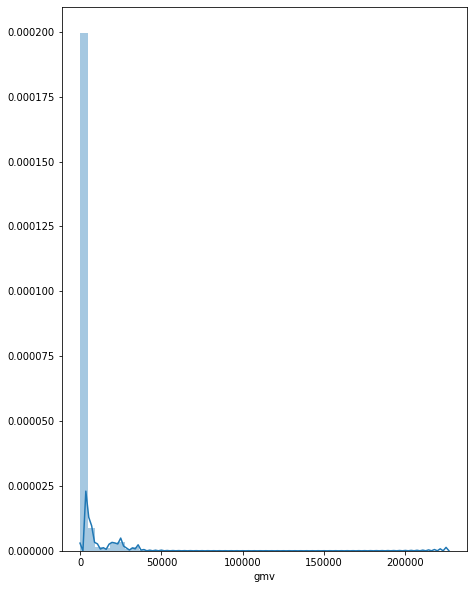

In [63]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
sns.distplot(df.gmv)

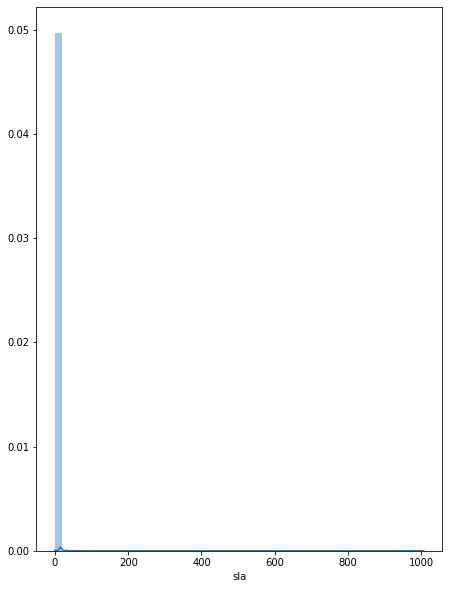

In [64]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
sns.distplot(df.sla)

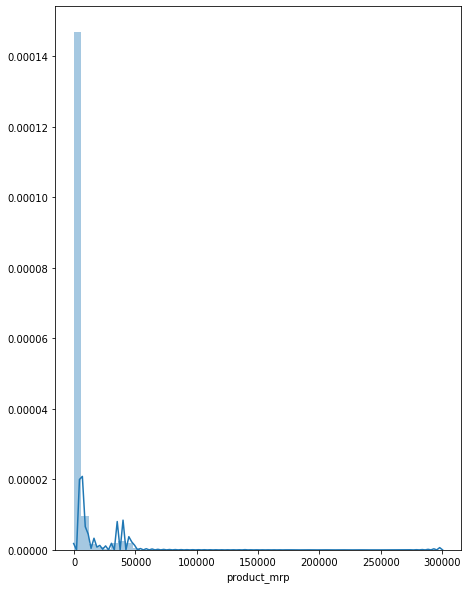

In [65]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
sns.distplot(df.product_mrp)

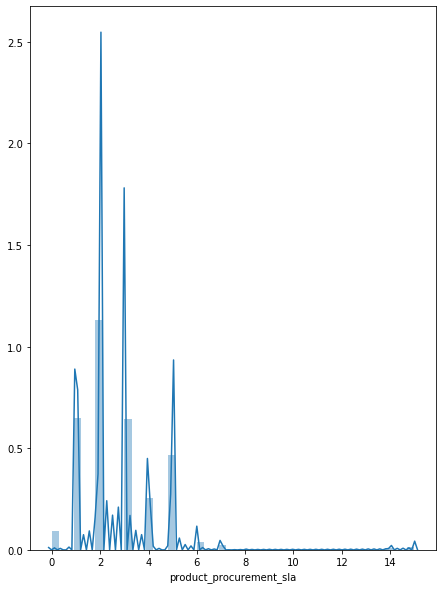

In [66]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
sns.distplot(df.product_procurement_sla)

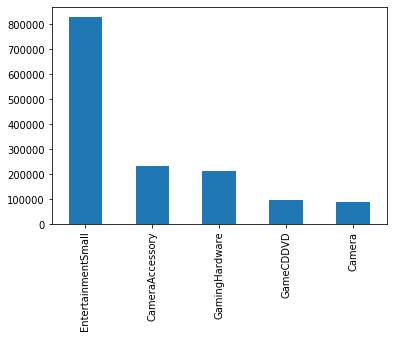

In [67]:
df['product_analytic_category'].value_counts().plot(kind='bar')

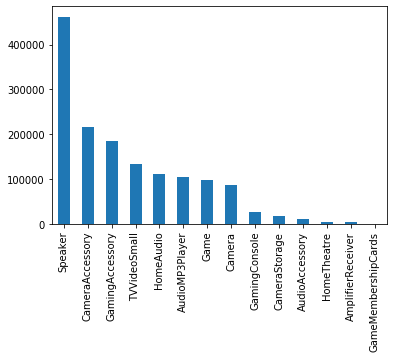

In [68]:
df['product_analytic_sub_category'].value_counts().plot(kind='bar')

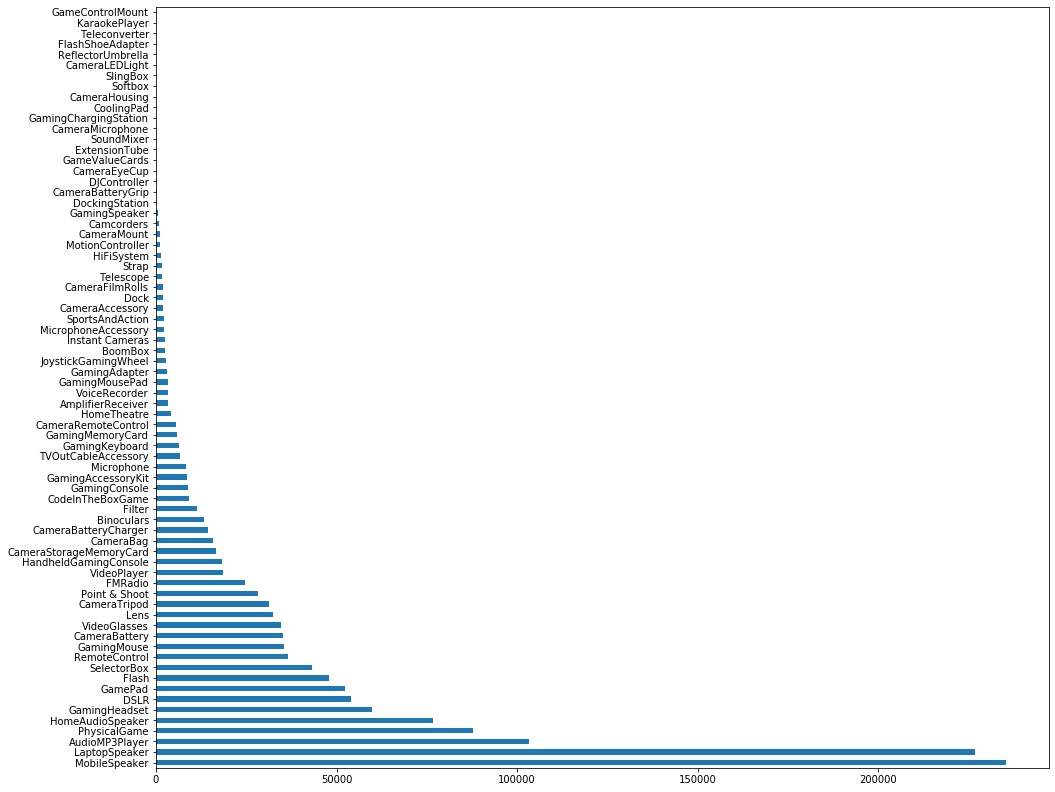

In [69]:
plt.figure(figsize=(16,14))

df['product_analytic_vertical'].value_counts().plot(kind='barh')

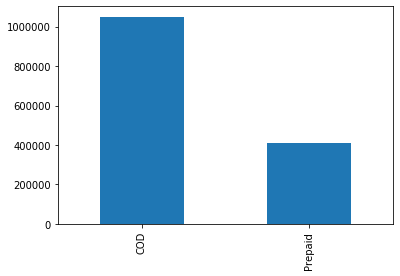

In [70]:
df['order_payment_type'].value_counts().plot(kind='bar')

## Feature Engineering

#### WEEK (Generating columns from order date)

In [71]:
# Creating a new column into a specific position in a DataFrame
loc_index = df.columns.get_loc('Month') + 1
df.insert(loc=loc_index,column='Week',value=df['order_date'].dt.strftime("%V"))

df['Year'] = df['Year'].astype('str')
df.head()

,order_date,Year,Month,Week,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,2015-10-17 15:11:54,2015,10,42,3419300926147000.00,6400.00,1,COD,5,CameraAccessory,CameraAccessory,CameraTripod,7190.00,0
1,2015-10-19 10:07:22,2015,10,43,1420830839915200.00,6900.00,1,COD,7,CameraAccessory,CameraAccessory,CameraTripod,7190.00,0
2,2015-10-20 15:45:56,2015,10,43,2421912925714800.00,1990.00,1,COD,10,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3
3,2015-10-14 12:05:15,2015,10,42,4416592101738400.00,1690.00,1,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3
4,2015-10-17 21:25:03,2015,10,42,4419525153426400.00,1618.00,1,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3


In [72]:
# Aggregating the combinations

df.groupby(['Year', 'Week']).agg({'Month':"count"}).reset_index(drop=False)

,Year,Week,Month
0,2015,21,1
1,2015,24,1
2,2015,26,4
3,2015,27,283
4,2015,28,22043
...,...,...,...
56,2016,27,285
57,2016,28,26
58,2016,29,6
59,2016,30,2


In [73]:
#

# making the year as 2015 for the week where week is 53 but belongs to 2016
df.loc[(df.Year == '2016') & (df.Week == '53'), 'Year'] = '2015'

# making the month as 12 for the above rows for consistency
df.loc[(df.Year == '2015') & (df.Week == '53'), 'Month'] = 12

# Dropping rows (less than 27 week) as it belongs to the weeks in June 2015
df.drop(df[df['Week'] == '27'].index, inplace = True)

In [74]:
df.groupby(['Year', 'Week']).agg({'Month':"count"}).reset_index(drop=False)

,Year,Week,Month
0,2015,21,1
1,2015,24,1
2,2015,26,4
3,2015,28,22043
4,2015,29,22459
5,2015,30,23458
6,2015,31,15249
7,2015,32,26
8,2015,33,11
9,2015,34,8


#### List Price (List Price = GMV*units)

In [75]:
df['list_price'] = round((df.gmv/df.units),2)

In [76]:
df.head()

,order_date,Year,Month,Week,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,list_price
0,2015-10-17 15:11:54,2015,10,42,3419300926147000.00,6400.00,1,COD,5,CameraAccessory,CameraAccessory,CameraTripod,7190.00,0,6400.00
1,2015-10-19 10:07:22,2015,10,43,1420830839915200.00,6900.00,1,COD,7,CameraAccessory,CameraAccessory,CameraTripod,7190.00,0,6900.00
2,2015-10-20 15:45:56,2015,10,43,2421912925714800.00,1990.00,1,COD,10,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1990.00
3,2015-10-14 12:05:15,2015,10,42,4416592101738400.00,1690.00,1,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1690.00
4,2015-10-17 21:25:03,2015,10,42,4419525153426400.00,1618.00,1,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1618.00


In [77]:
len(df.loc[df.list_price>df.product_mrp])

1

In [78]:
df=df[df.list_price<df.product_mrp]

In [79]:
len(df.loc[df.list_price>df.product_mrp])

0

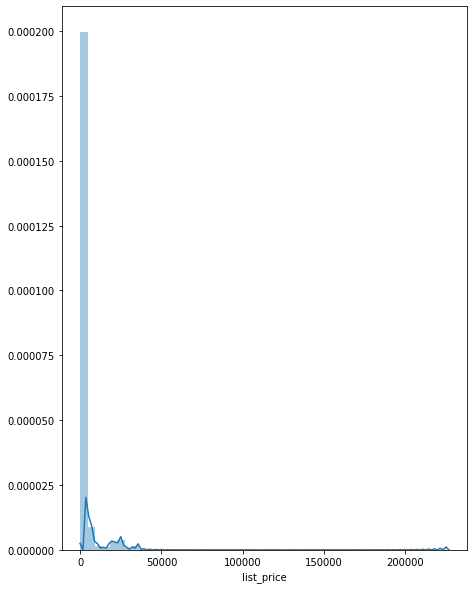

In [80]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
sns.distplot(df.list_price)

#### Payday Week

In [81]:
#
df['payday_flag'] = df['order_date'].apply(lambda x:1 if x.strftime('%d') in ('14','15','16','30','31','1','2') else 0)
df.head()

,order_date,Year,Month,Week,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,list_price,payday_flag
0,2015-10-17 15:11:54,2015,10,42,3419300926147000.00,6400.00,1,COD,5,CameraAccessory,CameraAccessory,CameraTripod,7190.00,0,6400.00,0
1,2015-10-19 10:07:22,2015,10,43,1420830839915200.00,6900.00,1,COD,7,CameraAccessory,CameraAccessory,CameraTripod,7190.00,0,6900.00,0
2,2015-10-20 15:45:56,2015,10,43,2421912925714800.00,1990.00,1,COD,10,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1990.00,0
3,2015-10-14 12:05:15,2015,10,42,4416592101738400.00,1690.00,1,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1690.00,1
4,2015-10-17 21:25:03,2015,10,42,4419525153426400.00,1618.00,1,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1618.00,0


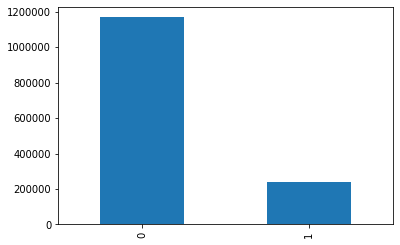

In [82]:
df['payday_flag'].value_counts().plot(kind='bar')

#### Holiday Week

In [83]:
def holidayflg(ord_date):
    if ord_date.strftime('%Y') == 2015:
        if ord_date.strftime('%m') == '07' and ord_date.strftime('%d') == '01':
            return 1
        elif ord_date.strftime('%m') == '08' and ord_date.strftime('%d') == '03':
            return 1
        elif ord_date.strftime('%m') == '09' and ord_date.strftime('%d') == '07':
            return 1
        elif ord_date.strftime('%m') == '10' and ord_date.strftime('%d') == '12':
            return 1
        elif ord_date.strftime('%m') == '10' and ord_date.strftime('%d') == '31':
            return 1
        elif ord_date.strftime('%m') == '11' and ord_date.strftime('%d') == '11':
            return 1
        elif ord_date.strftime('%m') == '12' and ord_date.strftime('%d') == '25':
            return 1
        elif ord_date.strftime('%m') == '12' and ord_date.strftime('%d') == '26':
            return 1
        else:
            return 0
    else:
        if ord_date.strftime('%m') == '01' and ord_date.strftime('%d') == '01':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') == '15':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') == '14':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') =='29':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '17':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '25':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '28':
            return 1
        elif ord_date.strftime('%m') == '05' and ord_date.strftime('%d') == '08':
            return 1
        elif ord_date.strftime('%m') == '05' and ord_date.strftime('%d') == '23':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '19':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '21':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '24':
            return 1
        else:
            return 0

In [84]:
#
df['holiday_flag'] = df['order_date'].apply(lambda x:holidayflg(x))
df.head()

,order_date,Year,Month,Week,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,list_price,payday_flag,holiday_flag
0,2015-10-17 15:11:54,2015,10,42,3419300926147000.00,6400.00,1,COD,5,CameraAccessory,CameraAccessory,CameraTripod,7190.00,0,6400.00,0,0
1,2015-10-19 10:07:22,2015,10,43,1420830839915200.00,6900.00,1,COD,7,CameraAccessory,CameraAccessory,CameraTripod,7190.00,0,6900.00,0,0
2,2015-10-20 15:45:56,2015,10,43,2421912925714800.00,1990.00,1,COD,10,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1990.00,0,0
3,2015-10-14 12:05:15,2015,10,42,4416592101738400.00,1690.00,1,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1690.00,1,0
4,2015-10-17 21:25:03,2015,10,42,4419525153426400.00,1618.00,1,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1618.00,0,0


In [85]:
df.columns

Index(['order_date', 'Year', 'Month', 'Week', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla', 'list_price', 'payday_flag',
       'holiday_flag'],
      dtype='object')

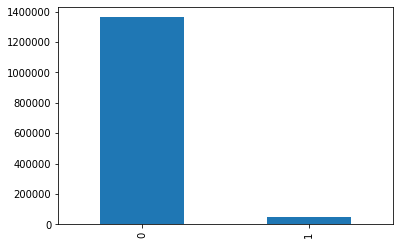

In [86]:
df['holiday_flag'].value_counts().plot(kind='bar')

#### Product Type - Luxury/Mass-market

In [87]:
pd.DataFrame(df['gmv']).describe(percentiles=[.70,.80,.90]).T

,count,mean,std,min,50%,70%,80%,90%,max
gmv,1409523.00,2486.15,5666.45,10.00,765.00,1549.00,2399.00,4385.00,226947.00


In [88]:
df['gmv'].quantile(.8)

2399.0

In [89]:
#
df['product_type'] = df['gmv'].apply(lambda x:'luxury' if x >= 2450 else 'mass_market')
df.head()

,order_date,Year,Month,Week,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,list_price,payday_flag,holiday_flag,product_type
0,2015-10-17 15:11:54,2015,10,42,3419300926147000.00,6400.00,1,COD,5,CameraAccessory,CameraAccessory,CameraTripod,7190.00,0,6400.00,0,0,luxury
1,2015-10-19 10:07:22,2015,10,43,1420830839915200.00,6900.00,1,COD,7,CameraAccessory,CameraAccessory,CameraTripod,7190.00,0,6900.00,0,0,luxury
2,2015-10-20 15:45:56,2015,10,43,2421912925714800.00,1990.00,1,COD,10,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1990.00,0,0,mass_market
3,2015-10-14 12:05:15,2015,10,42,4416592101738400.00,1690.00,1,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1690.00,1,0,mass_market
4,2015-10-17 21:25:03,2015,10,42,4419525153426400.00,1618.00,1,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1618.00,0,0,mass_market


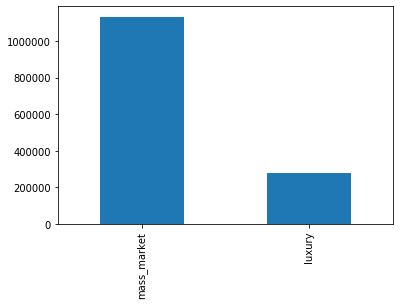

In [90]:
df['product_type'].value_counts().plot(kind='bar')

#### Discount

In [91]:
df['discount'] = round(100*((df.product_mrp - df.list_price)/(df.product_mrp)),2)

In [92]:
df.head()

,order_date,Year,Month,Week,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,list_price,payday_flag,holiday_flag,product_type,discount
0,2015-10-17 15:11:54,2015,10,42,3419300926147000.00,6400.00,1,COD,5,CameraAccessory,CameraAccessory,CameraTripod,7190.00,0,6400.00,0,0,luxury,10.99
1,2015-10-19 10:07:22,2015,10,43,1420830839915200.00,6900.00,1,COD,7,CameraAccessory,CameraAccessory,CameraTripod,7190.00,0,6900.00,0,0,luxury,4.03
2,2015-10-20 15:45:56,2015,10,43,2421912925714800.00,1990.00,1,COD,10,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1990.00,0,0,mass_market,5.19
3,2015-10-14 12:05:15,2015,10,42,4416592101738400.00,1690.00,1,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1690.00,1,0,mass_market,19.49
4,2015-10-17 21:25:03,2015,10,42,4419525153426400.00,1618.00,1,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,2099.00,3,1618.00,0,0,mass_market,22.92


## Outlier Treatment

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409523 entries, 0 to 1462717
Data columns (total 19 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   order_date                     1409523 non-null  datetime64[ns]
 1   Year                           1409523 non-null  object        
 2   Month                          1409523 non-null  int64         
 3   Week                           1409523 non-null  object        
 4   order_item_id                  1409523 non-null  float64       
 5   gmv                            1409523 non-null  float64       
 6   units                          1409523 non-null  int64         
 7   order_payment_type             1409523 non-null  object        
 8   sla                            1409523 non-null  int64         
 9   product_analytic_category      1409523 non-null  object        
 10  product_analytic_sub_category  1409523 non-null  objec

In [94]:
num=['gmv','list_price','discount','sla','product_mrp','product_procurement_sla','units']

In [95]:
def univariate_continuos(var_list):
    plt.figure(figsize=(16,8))
    for var in var_list:
        plt.subplot(2,4,var_list.index(var)+1)
        sns.boxplot(y=var,palette='cubehelix', data=df)
    plt.tight_layout()
    plt.show()

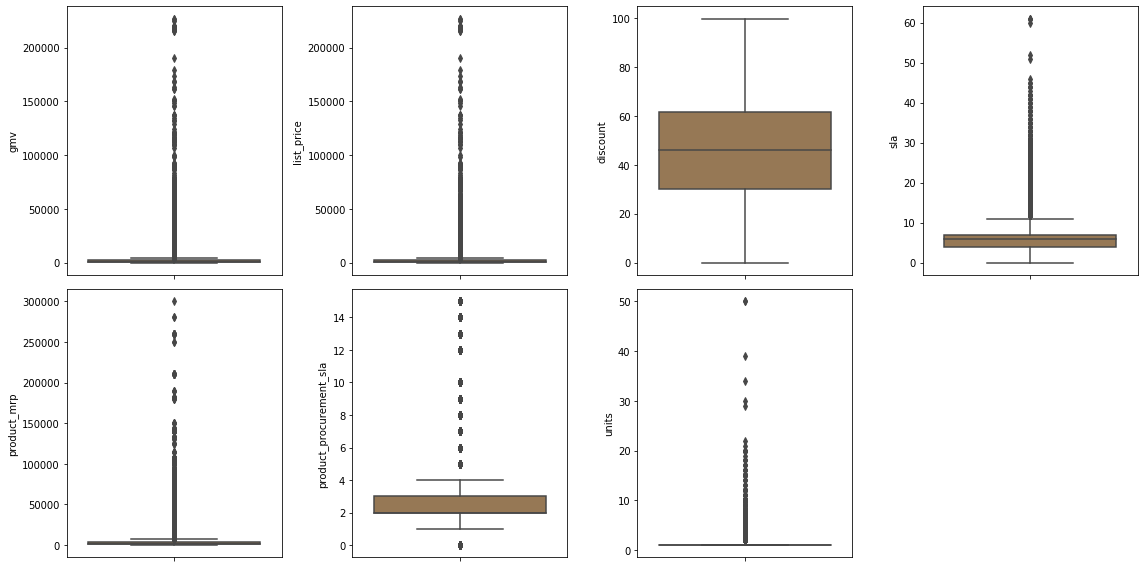

In [96]:
var = univariate_continuos(num)

In [97]:
df[num].describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
gmv,1409523.00,2486.15,5666.45,10.00,349.00,765.00,1990.00,4385.00,11801.00,30999.00,226947.00
list_price,1409523.00,2453.20,5584.42,10.00,348.00,750.00,1950.00,4299.00,11340.00,29990.00,226947.00
discount,1409523.00,45.96,21.56,0.00,30.02,45.92,61.72,75.02,81.62,90.30,99.86
sla,1409523.00,5.78,2.75,0.00,4.00,6.00,7.00,9.00,10.00,13.00,61.00
product_mrp,1409523.00,4267.77,8760.96,49.00,873.00,1699.00,3499.00,7120.00,19500.00,46950.00,299999.00
product_procurement_sla,1409523.00,2.70,1.78,0.00,2.00,2.00,3.00,5.00,5.00,7.00,15.00
units,1409523.00,1.02,0.25,1.00,1.00,1.00,1.00,1.00,1.00,2.00,50.00


In [98]:
df[['gmv','list_price','sla','product_mrp','units']].quantile([.95, .99])

,gmv,list_price,sla,product_mrp,units
0.95,11801.00,11340.00,10.00,19500.00,1.00
0.99,30999.00,29990.00,13.00,46950.00,2.00


In [99]:
# Percentage of Outliers in column sla
print(round(100*(df.loc[df['sla'] > 13.00].shape[0] / df.shape[0]),4))

0.8455


In [100]:
print(round(100*(df.loc[df['gmv'] > 30999.00].shape[0] / df.shape[0]),4))

0.9893


In [101]:
print(round(100*(df.loc[df['list_price'] > 29990.00].shape[0] / df.shape[0]),4))

0.9855


In [102]:
print(round(100*(df.loc[df['product_mrp'] > 46950.00].shape[0] / df.shape[0]),4))

0.3937


In [103]:
print(round(100*(df.loc[df['units'] > 2.00].shape[0] / df.shape[0]),4))

0.2936


In [104]:
# Capping value above or below a 99 percentile:
df['sla'][np.abs(df['sla'] > 13.0)]= 13.0
df['gmv'][np.abs(df['gmv'] > 30999.0)]= 30999.0
df['list_price'][np.abs(df['list_price'] > 29990.0)]= 29990.0
df['product_mrp'][np.abs(df['product_mrp'] > 46950.0)]= 46950.0
df['units'][np.abs(df['units'] > 2.00)]= 2.00

In [105]:
print(round(100*(df.shape[0] / shape1[0])))

85


In [106]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Month,1409523.00,6.41,3.68,1.00,3.00,6.00,10.00,12.00,12.00,12.00,12.00
order_item_id,1409523.00,9226212274239558.00,43139451126256312.00,108016495.00,1600726164911600.00,2613669307462800.00,3641478751169000.00,4550127043294180.00,4608850585092410.00,300037347713868032.00,300037347717704000.00
gmv,1409523.00,2426.53,5234.30,10.00,349.00,765.00,1990.00,4385.00,11801.00,30999.00,30999.00
units,1409523.00,1.01,0.12,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00
sla,1409523.00,5.76,2.66,0.00,4.00,6.00,7.00,9.00,10.00,13.00,13.00
product_mrp,1409523.00,4229.09,8433.54,49.00,873.00,1699.00,3499.00,7120.00,19500.00,46950.00,46950.00
product_procurement_sla,1409523.00,2.70,1.78,0.00,2.00,2.00,3.00,5.00,5.00,7.00,15.00
list_price,1409523.00,2390.64,5143.80,10.00,348.00,750.00,1950.00,4299.00,11340.00,29990.00,29990.00
payday_flag,1409523.00,0.17,0.38,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
holiday_flag,1409523.00,0.03,0.18,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00


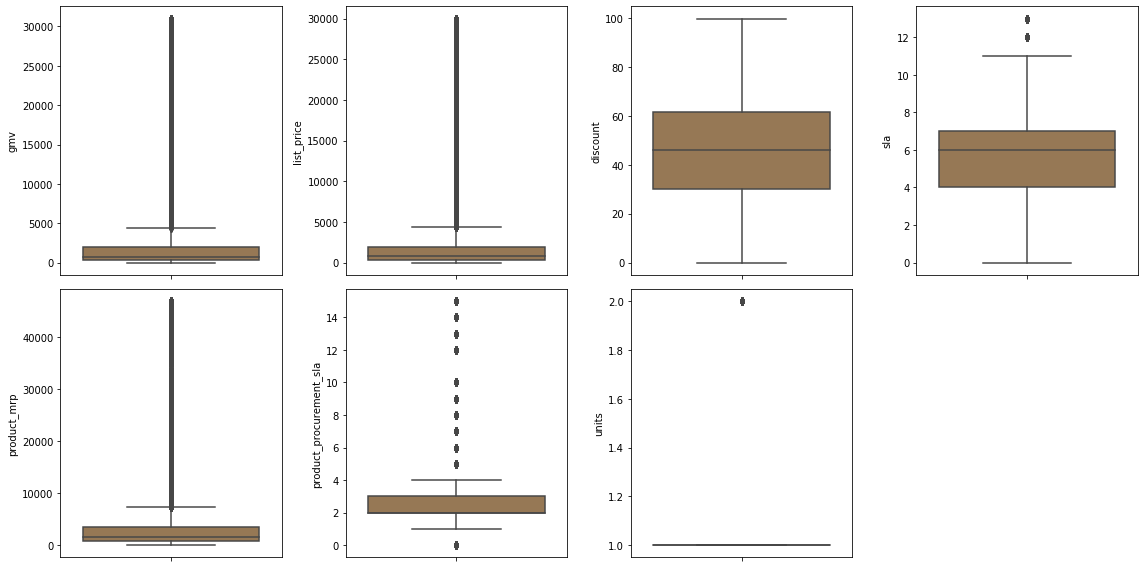

In [107]:
univariate_continuos(num)

## Converting months to number of weeks

In [108]:
import calendar

def WeekFinderFromYear(year):
        """ will return all the week from selected year """

        import datetime

        WEEK = {'MONDAY':0,'TUESDAY':1,'WEDNESDAY':2,'THURSDAY':3,'FRIDAY':4,'SATURDAY':5,'SUNDAY':6}
        MONTH = {'JANUARY':1,'FEBRUARY':2,'MARCH':3,'APRIL':4,'MAY':5,'JUNE':6,'JULY':7,'AUGUST':8,'SEPTEMBER':9,'OCTOBER':10,'NOVEMBER':11,'DECEMBER':12}

        year = int(year)
        month = MONTH['JANUARY']
        day = WEEK['MONDAY']

        dt = datetime.date(year, month, 1)
        dow_lst = []

        while dt.weekday() != day:
            dt = dt + datetime.timedelta(days = 1)

        lst_month = MONTH.values()

        for mont in lst_month:
         while dt.month == month:
            dow_lst.append(dt)
            dt = dt + datetime.timedelta(days=7)
            
        month_number_week = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}
        month_name_week = {'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[], 'Jun':[], 'Jul':[], 'Aug':[], 'Sep':[], 'Oct':[], 'Nov':[], 'Dec':[]}

        for each in dow_lst:
            month_number_week[each.month].append(each.isocalendar()[1])
            month_name_week[calendar.month_abbr[each.month]].append(each.isocalendar()[1])

        return month_number_week, month_name_week

In [109]:
dict_num_2015, dict_name_2015 = WeekFinderFromYear(2015)
print(dict_num_2015)
print()
print(dict_name_2015)

print()

dict_num_2016, dict_name_2016 = WeekFinderFromYear(2016)
print(dict_num_2016)
print()
print(dict_name_2016)

{1: [2, 3, 4, 5], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: []}

{'Jan': [2, 3, 4, 5], 'Feb': [], 'Mar': [], 'Apr': [], 'May': [], 'Jun': [], 'Jul': [], 'Aug': [], 'Sep': [], 'Oct': [], 'Nov': [], 'Dec': []}

{1: [1, 2, 3, 4], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: []}

{'Jan': [1, 2, 3, 4], 'Feb': [], 'Mar': [], 'Apr': [], 'May': [], 'Jun': [], 'Jul': [], 'Aug': [], 'Sep': [], 'Oct': [], 'Nov': [], 'Dec': []}


In [110]:
num_weeks_2015 = 0
num_weeks_2016 = 0

for i in dict_num_2015:
    if i >= 7:
        num_weeks_2015 += len(dict_num_2015[i])

for i in dict_num_2016:
    if i <= 6:
        num_weeks_2016 += len(dict_num_2016[i])

total_weeks = num_weeks_2015 + num_weeks_2016
total_weeks

4

In [111]:
# Simple Moving Average function
def SMA_variable(df,var,n):
    for i in var:
        loc_index = df.columns.get_loc(i) + 1
        df.insert(loc=loc_index,column= i+'_SMA_'+np.str(n),value=df[i].rolling(window=n).mean())
    return df

## Media Investment

In [112]:
df2 = pd.read_excel('Media data and other information.xlsx', sheet_name='Media Investment', skiprows=2)

df2.head()

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,nan,2015.00,7.00,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,nan,nan
1,nan,2015.00,8.00,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,nan,nan
2,nan,2015.00,9.00,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,nan,nan
3,nan,2015.00,10.00,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,nan,nan
4,nan,2015.00,11.00,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,nan,nan


In [113]:
df2.drop(df2.columns[0], axis=1, inplace = True)

df2.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.00,7.00,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,nan,nan
1,2015.00,8.00,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,nan,nan
2,2015.00,9.00,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,nan,nan
3,2015.00,10.00,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,nan,nan
4,2015.00,11.00,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,nan,nan


In [114]:
df2['Radio'].fillna(value=0, inplace=True)
df2['Other'].fillna(value=0, inplace=True)

In [115]:
df2.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.00,7.00,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
1,2015.00,8.00,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,0.00,0.00
2,2015.00,9.00,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,0.00,0.00
3,2015.00,10.00,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,0.00,0.00
4,2015.00,11.00,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,0.00,0.00


In [116]:
df2.isnull().sum()

Year                 4
Month                4
Total Investment     4
TV                   3
Digital              4
Sponsorship          4
Content Marketing    4
Online marketing     4
 Affiliates          4
SEM                  4
Radio                0
Other                0
dtype: int64

In [117]:
df2['Year'].fillna(value=0, inplace=True)
df2['Month'].fillna(value=0, inplace=True)
df2['Total Investment'].fillna(value=0, inplace=True)
df2['TV'].fillna(value=0, inplace=True)
df2['Digital'].fillna(value=0, inplace=True)
df2['Sponsorship'].fillna(value=0, inplace=True)
df2['Content Marketing'].fillna(value=0, inplace=True)
df2['Online marketing'].fillna(value=0, inplace=True)
df2[' Affiliates'].fillna(value=0, inplace=True)
df2['SEM'].fillna(value=0, inplace=True)

In [118]:
df2.isnull().sum()

Year                 0
Month                0
Total Investment     0
TV                   0
Digital              0
Sponsorship          0
Content Marketing    0
Online marketing     0
 Affiliates          0
SEM                  0
Radio                0
Other                0
dtype: int64

In [119]:
# checking duplicates
print(df2.duplicated().sum())
print(round(100*(df2.duplicated().value_counts()[1]/df2.shape[0]),4))

2
12.5


In [120]:
df2.drop_duplicates(keep = 'first', inplace=True)

In [121]:
# checking duplicates
print(df2.duplicated().sum())

0


In [122]:
# Creating variable
media1 = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'])

media1.head()

,Year,Month,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
i = 0

for index, row in df2.iterrows():

    if row.Year == 2015:

        num_weeks = len(dict_num_2015[row.Month])

        for week in dict_num_2015[row.Month]:
            
            media1.iloc[i].Year = row.Year
            media1.iloc[i].Month = row.Month
            media1.iloc[i]['Week'] = week
            media1.iloc[i]['Total Investment'] = round(row['Total Investment'] / num_weeks, 3)
            media1.iloc[i]['TV'] = round(row['TV'] / num_weeks, 3)
            media1.iloc[i]['Digital'] = round(row['Digital'] / num_weeks, 3)
            media1.iloc[i]['Sponsorship'] = round(row['Sponsorship'] / num_weeks, 3)
            media1.iloc[i]['Content Marketing'] = round(row['Content Marketing'] / num_weeks, 3)
            media1.iloc[i]['Online marketing'] = round(row['Online marketing'] / num_weeks, 3)
            media1.iloc[i]['Affiliates'] = round(row[' Affiliates'] / num_weeks, 3)
            media1.iloc[i]['SEM'] = round(row['SEM'] / num_weeks, 3)
            media1.iloc[i]['Radio'] = round(row['Radio'] / num_weeks, 3)
            media1.iloc[i]['Other'] = round(row['Other'] / num_weeks, 3)
            
            i+=1

    elif row.Year == 2016:
        
        num_weeks = len(dict_num_2016[row.Month])

        for week in dict_num_2016[row.Month]:
            
            media1.iloc[i].Year = row.Year
            media1.iloc[i].Month = row.Month
            media1.iloc[i]['Week'] = week
            media1.iloc[i]['Total Investment'] = round(row['Total Investment'] / num_weeks, 3)
            media1.iloc[i]['TV'] = round(row['TV'] / num_weeks, 3)
            media1.iloc[i]['Digital'] = round(row['Digital'] / num_weeks, 3)
            media1.iloc[i]['Sponsorship'] = round(row['Sponsorship'] / num_weeks, 3)
            media1.iloc[i]['Content Marketing'] = round(row['Content Marketing'] / num_weeks, 3)
            media1.iloc[i]['Online marketing'] = round(row['Online marketing'] / num_weeks, 3)
            media1.iloc[i]['Affiliates'] = round(row[' Affiliates'] / num_weeks, 3)
            media1.iloc[i]['SEM'] = round(row['SEM'] / num_weeks, 3)
            media1.iloc[i]['Radio'] = round(row['Radio'] / num_weeks, 3)
            media1.iloc[i]['Other'] = round(row['Other'] / num_weeks, 3)
            
            i+=1

media1.head()

,Year,Month,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2016.00,1.00,1,18.55,1.09,0.11,1.05,0.23,5.72,1.84,1.05,0.68,6.77
1,2016.00,1.00,2,18.55,1.09,0.11,1.05,0.23,5.72,1.84,1.05,0.68,6.77
2,2016.00,1.00,3,18.55,1.09,0.11,1.05,0.23,5.72,1.84,1.05,0.68,6.77
3,2016.00,1.00,4,18.55,1.09,0.11,1.05,0.23,5.72,1.84,1.05,0.68,6.77


In [124]:
media1['Week'] = media1['Week'].astype('str')

In [125]:
df2 = media1

df2.head()

,Year,Month,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2016.00,1.00,1,18.55,1.09,0.11,1.05,0.23,5.72,1.84,1.05,0.68,6.77
1,2016.00,1.00,2,18.55,1.09,0.11,1.05,0.23,5.72,1.84,1.05,0.68,6.77
2,2016.00,1.00,3,18.55,1.09,0.11,1.05,0.23,5.72,1.84,1.05,0.68,6.77
3,2016.00,1.00,4,18.55,1.09,0.11,1.05,0.23,5.72,1.84,1.05,0.68,6.77


In [126]:
# Dropping Year and Month 

df2 = df2.drop(['Year'], axis=1)
df2 = df2.drop(['Month'], axis=1)
df2.head()

,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,1,18.55,1.09,0.11,1.05,0.23,5.72,1.84,1.05,0.68,6.77
1,2,18.55,1.09,0.11,1.05,0.23,5.72,1.84,1.05,0.68,6.77
2,3,18.55,1.09,0.11,1.05,0.23,5.72,1.84,1.05,0.68,6.77
3,4,18.55,1.09,0.11,1.05,0.23,5.72,1.84,1.05,0.68,6.77


In [127]:
original_column = df2.columns[1:]
original_column

Index(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],
      dtype='object')

In [128]:
# 5-weeks Simple Moving Average
df2 = SMA_variable(df2,original_column,5) 
df2.head()

,Week,Total Investment,Total Investment_SMA_5,TV,TV_SMA_5,Digital,Digital_SMA_5,Sponsorship,Sponsorship_SMA_5,Content Marketing,...,Online marketing,Online marketing_SMA_5,Affiliates,Affiliates_SMA_5,SEM,SEM_SMA_5,Radio,Radio_SMA_5,Other,Other_SMA_5
0,1,18.55,nan,1.09,nan,0.11,nan,1.05,nan,0.23,...,5.72,nan,1.84,nan,1.05,nan,0.68,nan,6.77,nan
1,2,18.55,nan,1.09,nan,0.11,nan,1.05,nan,0.23,...,5.72,nan,1.84,nan,1.05,nan,0.68,nan,6.77,nan
2,3,18.55,nan,1.09,nan,0.11,nan,1.05,nan,0.23,...,5.72,nan,1.84,nan,1.05,nan,0.68,nan,6.77,nan
3,4,18.55,nan,1.09,nan,0.11,nan,1.05,nan,0.23,...,5.72,nan,1.84,nan,1.05,nan,0.68,nan,6.77,nan


In [129]:
# 3-weeks Simple Moving Average
df2 = SMA_variable(df2,original_column,3) 
df2.head()

,Week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,TV,TV_SMA_3,TV_SMA_5,Digital,Digital_SMA_3,Digital_SMA_5,...,Affiliates_SMA_5,SEM,SEM_SMA_3,SEM_SMA_5,Radio,Radio_SMA_3,Radio_SMA_5,Other,Other_SMA_3,Other_SMA_5
0,1,18.55,nan,nan,1.09,nan,nan,0.11,nan,nan,...,nan,1.05,nan,nan,0.68,nan,nan,6.77,nan,nan
1,2,18.55,nan,nan,1.09,nan,nan,0.11,nan,nan,...,nan,1.05,nan,nan,0.68,nan,nan,6.77,nan,nan
2,3,18.55,18.55,nan,1.09,1.09,nan,0.11,0.11,nan,...,nan,1.05,1.05,nan,0.68,0.68,nan,6.77,6.77,nan
3,4,18.55,18.55,nan,1.09,1.09,nan,0.11,0.11,nan,...,nan,1.05,1.05,nan,0.68,0.68,nan,6.77,6.77,nan


## Adstock Value

In [130]:
def adstocked_calc(col, adstock_rate=0.5):
    
    adstocked_list = []
    adstock_value = 0
    for i in range(len(col)):
        adstock_value = col.iloc[i] + adstock_rate * adstock_value
        adstocked_list.append(adstock_value)            
        adstock_value = col.iloc[i]
    return adstocked_list

In [131]:
adstock_val = pd.DataFrame()
adstock_val['TV_ADS'] = adstocked_calc(df2['TV'])
adstock_val['Digital_ADS'] = adstocked_calc(df2['Digital'])
adstock_val['Sponsorship_ADS'] = adstocked_calc(df2['Sponsorship'])
adstock_val['Content_Marketing_ADS'] = adstocked_calc(df2['Content Marketing'])
adstock_val['Online_Marketing_ADS'] = adstocked_calc(df2['Online marketing'])
adstock_val['Affiliates_ADS'] = adstocked_calc(df2['Affiliates'])
adstock_val['SEM_ADS'] = adstocked_calc(df2['SEM'])
adstock_val['Radio_ADS'] = adstocked_calc(df2['Radio'])
adstock_val['Other_ADS'] = adstocked_calc(df2['Other'])

In [132]:
adstock_val

,TV_ADS,Digital_ADS,Sponsorship_ADS,Content_Marketing_ADS,Online_Marketing_ADS,Affiliates_ADS,SEM_ADS,Radio_ADS,Other_ADS
0,1.09,0.11,1.05,0.23,5.72,1.84,1.05,0.68,6.77
1,1.64,0.17,1.58,0.34,8.59,2.76,1.58,1.01,10.16
2,1.64,0.17,1.58,0.34,8.59,2.76,1.58,1.01,10.16
3,1.64,0.17,1.58,0.34,8.59,2.76,1.58,1.01,10.16


In [133]:
marketing = pd.concat([df2,adstock_val] ,axis=1)

In [134]:
marketing.head()

,Week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,TV,TV_SMA_3,TV_SMA_5,Digital,Digital_SMA_3,Digital_SMA_5,...,Other_SMA_5,TV_ADS,Digital_ADS,Sponsorship_ADS,Content_Marketing_ADS,Online_Marketing_ADS,Affiliates_ADS,SEM_ADS,Radio_ADS,Other_ADS
0,1,18.55,nan,nan,1.09,nan,nan,0.11,nan,nan,...,nan,1.09,0.11,1.05,0.23,5.72,1.84,1.05,0.68,6.77
1,2,18.55,nan,nan,1.09,nan,nan,0.11,nan,nan,...,nan,1.64,0.17,1.58,0.34,8.59,2.76,1.58,1.01,10.16
2,3,18.55,18.55,nan,1.09,1.09,nan,0.11,0.11,nan,...,nan,1.64,0.17,1.58,0.34,8.59,2.76,1.58,1.01,10.16
3,4,18.55,18.55,nan,1.09,1.09,nan,0.11,0.11,nan,...,nan,1.64,0.17,1.58,0.34,8.59,2.76,1.58,1.01,10.16


## NPS Score Data

In [135]:
df4 = pd.read_excel('Media data and other information.xlsx', sheet_name='Monthly NPS Score', skiprows=0)

df4.head()

,Unnamed: 0,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.60,59.99,46.93,44.40,47.00,45.80,47.09,50.33,49.02,51.83,47.31,50.52
1,Stock Index,1177.00,1206.00,1101.00,1210.00,1233.00,1038.00,1052.00,1222.00,1015.00,1242.00,1228.00,1194.00


In [136]:
df4.columns.values[0]='score'
df4.head()

,score,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.60,59.99,46.93,44.40,47.00,45.80,47.09,50.33,49.02,51.83,47.31,50.52
1,Stock Index,1177.00,1206.00,1101.00,1210.00,1233.00,1038.00,1052.00,1222.00,1015.00,1242.00,1228.00,1194.00


In [137]:
df4.head()

,score,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.60,59.99,46.93,44.40,47.00,45.80,47.09,50.33,49.02,51.83,47.31,50.52
1,Stock Index,1177.00,1206.00,1101.00,1210.00,1233.00,1038.00,1052.00,1222.00,1015.00,1242.00,1228.00,1194.00


In [138]:
# resetting index
df4.reset_index(drop=True, inplace=True)

# Transposing
df4 = df4.T

# resetting index
df4.reset_index(drop=False, inplace=True)

# renaming columns
df4.columns = ['Month', 'NPS', 'Stock Index']
df4.drop(df4.index[0], inplace=True)
df4

,Month,NPS,Stock Index
1,July'15,54.60,1177.00
2,Aug'15,59.99,1206.00
3,Sept'15,46.93,1101.00
4,Oct'15,44.40,1210.00
5,Nov'15,47.00,1233.00
6,Dec'15,45.80,1038.00
7,Jan'16,47.09,1052.00
8,Feb'16,50.33,1222.00
9,Mar'16,49.02,1015.00
10,Apr'16,51.83,1242.00


In [139]:
#df_month=pd.DataFrame({'index':[1,2,3,4,5,6,7,8,9,10,11,12],
                            #'Year' : [2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016],
                            #'Months' :[7,8,9,10,11,12,1,2,3,4,5,6]})
#df_month

In [140]:
# colls=['NPS', 'Stock Index', 'index']
# df4.reset_index()
# df4['index']=range(1,13)
# df4[colls]=df4[colls].apply(pd.to_numeric)
# df4.info()

In [141]:
# df4nps=pd.merge(df_month,df4,how='inner', on='index')
# df4nps

In [142]:
# df4nps.drop(df4nps.columns[0], axis=1, inplace = True)
# df4nps.drop(df4nps.columns[2], axis=1, inplace = True)

# #df4nps.drop['index']
# df4nps

In [143]:
nps1 = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'NPS', 'Stock Index'])
nps1

,Year,Month,Week,NPS,Stock Index
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN


In [144]:
import re
i = 0

for index, row in df4.iterrows():

    if '15' in row['Month']:
        
        month = re.split("[']", row['Month'])[0][0:3]
    
        for week in dict_name_2015[month]:        
            
            nps1.iloc[i].Year = 2015
            nps1.iloc[i].Month = month
            nps1.iloc[i].Week = week
            nps1.iloc[i].NPS = row['NPS']
            nps1.iloc[i]['Stock Index'] = row['Stock Index']
            
            i+=1
        
    elif '16' in row['Month']:

        month = re.split("[']", row['Month'])[0][0:3]
    
        for week in dict_name_2016[month]:        
            
            nps1.iloc[i].Year = 2016
            nps1.iloc[i].Month = month
            nps1.iloc[i].Week = week
            nps1.iloc[i].NPS = row['NPS']
            nps1.iloc[i]['Stock Index'] = row['Stock Index']
            
            i+=1

nps1.head()

,Year,Month,Week,NPS,Stock Index
0,2016,Jan,1,47.09,1052.00
1,2016,Jan,2,47.09,1052.00
2,2016,Jan,3,47.09,1052.00
3,2016,Jan,4,47.09,1052.00


In [145]:
nps1['Week'] = nps1['Week'].astype('str')

In [146]:
df4 = nps1 
df4

,Year,Month,Week,NPS,Stock Index
0,2016,Jan,1,47.09,1052.00
1,2016,Jan,2,47.09,1052.00
2,2016,Jan,3,47.09,1052.00
3,2016,Jan,4,47.09,1052.00


In [147]:
# Dropping Year and Month

df4 = df4.drop(['Year'], axis=1)
df4 = df4.drop(['Month'], axis=1)
df4.head()

,Week,NPS,Stock Index
0,1,47.09,1052.00
1,2,47.09,1052.00
2,3,47.09,1052.00
3,4,47.09,1052.00


In [148]:
nps_original_col = df4.columns[1:]
nps_original_col

Index(['NPS', 'Stock Index'], dtype='object')

In [149]:
df4 = SMA_variable(df4,nps_original_col,5) 
df4.head()

,Week,NPS,NPS_SMA_5,Stock Index,Stock Index_SMA_5
0,1,47.09,nan,1052.00,nan
1,2,47.09,nan,1052.00,nan
2,3,47.09,nan,1052.00,nan
3,4,47.09,nan,1052.00,nan


In [150]:
df4 = SMA_variable(df4,nps_original_col,3) 
df4.head()

,Week,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5
0,1,47.09,nan,nan,1052.00,nan,nan
1,2,47.09,nan,nan,1052.00,nan,nan
2,3,47.09,47.09,nan,1052.00,1052.00,nan
3,4,47.09,47.09,nan,1052.00,1052.00,nan


In [151]:
df4.fillna(value=0, inplace=True)
df4.head()

,Week,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5
0,1,47.09,0.00,0.00,1052.00,0.00,0.00
1,2,47.09,0.00,0.00,1052.00,0.00,0.00
2,3,47.09,47.09,0.00,1052.00,1052.00,0.00
3,4,47.09,47.09,0.00,1052.00,1052.00,0.00


## Climate 2015

In [152]:
# Ontario Climate data of year 2015-2016 
clim_2015 = pd.read_excel('ONTARIO-2015.xlsx', skiprows=24)

clim_2015.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0.00,NaN,-8.50,NaN,-4.30,...,0.00,NaN,0.00,NaN,0.00,NaN,nan,nan,nan,nan
1,2015-01-02,2015,1,2,†,3.00,NaN,-3.00,NaN,0.00,...,0.00,NaN,0.00,NaN,0.00,NaN,nan,nan,nan,nan
2,2015-01-03,2015,1,3,†,2.50,NaN,-4.00,NaN,-0.80,...,0.00,NaN,24.00,NaN,0.00,NaN,nan,nan,nan,nan
3,2015-01-04,2015,1,4,†,2.50,NaN,0.00,NaN,1.30,...,1.00,NaN,1.00,NaN,0.00,NaN,nan,nan,nan,nan
4,2015-01-05,2015,1,5,†,-10.00,NaN,-13.50,NaN,-11.80,...,3.00,NaN,3.00,NaN,1.00,NaN,nan,nan,nan,nan


In [153]:
# shape of data
clim_2015.shape

(365, 27)

In [154]:
# Dropping null values
clim_2015.dropna(axis=1, thresh=1, inplace=True)

clim_2015.reset_index(drop=True, inplace=True)

clim_2015.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag
0,2015-01-01,2015,1,1,†,0.00,NaN,-8.50,NaN,-4.30,...,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN
1,2015-01-02,2015,1,2,†,3.00,NaN,-3.00,NaN,0.00,...,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN
2,2015-01-03,2015,1,3,†,2.50,NaN,-4.00,NaN,-0.80,...,0.00,NaN,24.00,NaN,0.00,NaN,24.00,NaN,0.00,NaN
3,2015-01-04,2015,1,4,†,2.50,NaN,0.00,NaN,1.30,...,0.00,NaN,0.00,NaN,1.00,NaN,1.00,NaN,0.00,NaN
4,2015-01-05,2015,1,5,†,-10.00,NaN,-13.50,NaN,-11.80,...,0.00,NaN,0.00,NaN,3.00,NaN,3.00,NaN,1.00,NaN


In [155]:
# shape of data
clim_2015.shape

(365, 23)

In [156]:
#
# Dropping columns with only one distinct value

drop_cols = []

for col in clim_2015.columns:
    if 'Flag' in col:
        print(clim_2015[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

clim_2015.drop(drop_cols, axis=1, inplace=True)

print(clim_2015.columns)

M    13
Name: Max Temp Flag, dtype: int64

M    39
Name: Min Temp Flag, dtype: int64

M    39
Name: Mean Temp Flag, dtype: int64

M    39
Name: Heat Deg Days Flag, dtype: int64

M    39
Name: Cool Deg Days Flag, dtype: int64

T    7
Name: Total Rain Flag, dtype: int64

T    9
Name: Total Snow Flag, dtype: int64

T    12
Name: Total Precip Flag, dtype: int64

T    2
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [157]:
#
# Formatting column names

clim_2015.columns = [col.replace(' (°C)','').strip() for col in clim_2015.columns]

clim_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [158]:
clim_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          365 non-null    datetime64[ns]
 1   Year               365 non-null    int64         
 2   Month              365 non-null    int64         
 3   Day                365 non-null    int64         
 4   Max Temp           216 non-null    float64       
 5   Min Temp           190 non-null    float64       
 6   Mean Temp          190 non-null    float64       
 7   Heat Deg Days      190 non-null    float64       
 8   Cool Deg Days      190 non-null    float64       
 9   Total Rain (mm)    229 non-null    float64       
 10  Total Snow (cm)    229 non-null    float64       
 11  Total Precip (mm)  229 non-null    float64       
 12  Snow on Grnd (cm)  229 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 37.2 KB


In [159]:
#

clm = ['Max Temp',
 'Min Temp',
 'Mean Temp',
 'Heat Deg Days',
 'Cool Deg Days',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)']


clim_2015.dropna(subset=clm, inplace=True)

clim_2015.reset_index(drop=True, inplace=True)

clim_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          190 non-null    datetime64[ns]
 1   Year               190 non-null    int64         
 2   Month              190 non-null    int64         
 3   Day                190 non-null    int64         
 4   Max Temp           190 non-null    float64       
 5   Min Temp           190 non-null    float64       
 6   Mean Temp          190 non-null    float64       
 7   Heat Deg Days      190 non-null    float64       
 8   Cool Deg Days      190 non-null    float64       
 9   Total Rain (mm)    190 non-null    float64       
 10  Total Snow (cm)    190 non-null    float64       
 11  Total Precip (mm)  190 non-null    float64       
 12  Snow on Grnd (cm)  190 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 19.4 KB


In [160]:
clim_2015['Week'] = clim_2015['Date/Time'].dt.week

In [161]:
from datetime import date

clim_2015['Week'] = clim_2015['Week'].apply(lambda x: str(x).lstrip('0'))

clim_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
0,2015-01-01,2015,1,1,0.00,-8.50,-4.30,22.30,0.00,0.00,0.00,0.00,0.00,1
1,2015-01-02,2015,1,2,3.00,-3.00,0.00,18.00,0.00,0.00,0.00,0.00,0.00,1
2,2015-01-03,2015,1,3,2.50,-4.00,-0.80,18.80,0.00,24.00,0.00,24.00,0.00,1
3,2015-01-04,2015,1,4,2.50,0.00,1.30,16.70,0.00,0.00,1.00,1.00,0.00,1
4,2015-01-05,2015,1,5,-10.00,-13.50,-11.80,29.80,0.00,0.00,3.00,3.00,1.00,2


In [162]:
clim_2015 = clim_2015[clim_2015['Month'] >= 7]
clim_2015.reset_index(drop=True, inplace=True)

In [163]:
clim_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
0,2015-07-01,2015,7,1,24.50,17.00,20.80,0.00,2.80,0.00,0.00,0.00,0.00,27
1,2015-07-02,2015,7,2,24.00,14.00,19.00,0.00,1.00,0.00,0.00,0.00,0.00,27
2,2015-07-03,2015,7,3,25.00,10.00,17.50,0.50,0.00,0.00,0.00,0.00,0.00,27
3,2015-07-04,2015,7,4,26.00,11.00,18.50,0.00,0.50,0.00,0.00,0.00,0.00,27
4,2015-07-05,2015,7,5,28.00,14.00,21.00,0.00,3.00,0.00,0.00,0.00,0.00,27


In [164]:
clim_2015.sort_values(by=['Week'], ascending = True, inplace = True)

In [165]:
clim_2015 = clim_2015.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

clim_2015.head()

,Week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,27,28.00,10.00,19.36,0.10,1.46,0.00,0.00,0.00,0.00
1,28,28.00,12.50,20.10,0.28,2.38,4.42,0.00,4.42,0.00
2,29,33.00,11.00,23.18,0.00,5.18,1.40,0.00,1.40,0.00
3,30,31.50,14.50,23.06,0.00,5.06,1.08,0.00,1.08,0.00
4,31,33.50,16.00,24.57,0.00,6.57,4.63,0.00,4.63,0.00


In [166]:
clim_2015.drop(clim_2015[clim_2015['Week'] == '27'].index, inplace = True)

## Climate 2016

In [167]:
clim_2016 = pd.read_excel('ONTARIO-2016.xlsx', skiprows=24)
clim_2016.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2016-01-01,2016,1,1,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
1,2016-01-02,2016,1,2,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
2,2016-01-03,2016,1,3,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
3,2016-01-04,2016,1,4,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
4,2016-01-05,2016,1,5,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan


In [168]:
clim_2016.shape

(366, 27)

In [169]:
clim_2016.dropna(axis=1, thresh=1, inplace=True)

clim_2016.reset_index(drop=True, inplace=True)

clim_2016.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag
0,2016-01-01,2016,1,1,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN
1,2016-01-02,2016,1,2,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN
2,2016-01-03,2016,1,3,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN
3,2016-01-04,2016,1,4,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN
4,2016-01-05,2016,1,5,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN


In [170]:
clim_2016.shape

(366, 23)

In [171]:
drop_cols = []

for col in clim_2016.columns:
    if 'Flag' in col:
        print(clim_2016[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

clim_2016.drop(drop_cols, axis=1, inplace=True)

print(clim_2016.columns)

M    1
Name: Max Temp Flag, dtype: int64

M    8
Name: Min Temp Flag, dtype: int64

M    8
Name: Mean Temp Flag, dtype: int64

M    8
Name: Heat Deg Days Flag, dtype: int64

M    8
Name: Cool Deg Days Flag, dtype: int64

T    3
Name: Total Rain Flag, dtype: int64

T    7
Name: Total Snow Flag, dtype: int64

T    7
Name: Total Precip Flag, dtype: int64

T    6
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [172]:
clim_2016.columns = [col.replace(' (°C)','').strip() for col in clim_2016.columns]
clim_2016.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [173]:
clim_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          366 non-null    datetime64[ns]
 1   Year               366 non-null    int64         
 2   Month              366 non-null    int64         
 3   Day                366 non-null    int64         
 4   Max Temp           226 non-null    float64       
 5   Min Temp           219 non-null    float64       
 6   Mean Temp          219 non-null    float64       
 7   Heat Deg Days      219 non-null    float64       
 8   Cool Deg Days      219 non-null    float64       
 9   Total Rain (mm)    227 non-null    float64       
 10  Total Snow (cm)    227 non-null    float64       
 11  Total Precip (mm)  227 non-null    float64       
 12  Snow on Grnd (cm)  227 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 37.3 KB


In [174]:
cols = ['Max Temp',
 'Min Temp',
 'Mean Temp',
 'Heat Deg Days',
 'Cool Deg Days',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)']

clim_2016.dropna(subset=cols, inplace=True)

clim_2016.reset_index(drop=True, inplace=True)

clim_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          219 non-null    datetime64[ns]
 1   Year               219 non-null    int64         
 2   Month              219 non-null    int64         
 3   Day                219 non-null    int64         
 4   Max Temp           219 non-null    float64       
 5   Min Temp           219 non-null    float64       
 6   Mean Temp          219 non-null    float64       
 7   Heat Deg Days      219 non-null    float64       
 8   Cool Deg Days      219 non-null    float64       
 9   Total Rain (mm)    219 non-null    float64       
 10  Total Snow (cm)    219 non-null    float64       
 11  Total Precip (mm)  219 non-null    float64       
 12  Snow on Grnd (cm)  219 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 22.4 KB


In [175]:
clim_2016['Week'] = clim_2016['Date/Time'].dt.week

In [176]:
clim_2016['Week'] = clim_2016['Week'].apply(lambda x: str(x).lstrip('0'))

clim_2016.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
0,2016-01-08,2016,1,8,7.00,-14.00,-3.50,21.50,0.00,9.00,0.00,9.00,0.00,1
1,2016-01-09,2016,1,9,11.00,3.00,7.00,11.00,0.00,14.60,0.00,14.60,0.00,1
2,2016-01-10,2016,1,10,-1.50,-5.00,-3.30,21.30,0.00,0.00,7.00,7.00,0.00,1
3,2016-01-12,2016,1,12,-5.00,-12.00,-8.50,26.50,0.00,0.00,0.00,0.00,12.00,2
4,2016-01-14,2016,1,14,2.50,-10.50,-4.00,22.00,0.00,0.00,0.00,0.00,11.00,2


In [177]:
clim_2016 = clim_2016[clim_2016['Month'] <= 6]
clim_2016.reset_index(drop=True, inplace=True)

In [178]:
clim_2016.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
0,2016-01-08,2016,1,8,7.00,-14.00,-3.50,21.50,0.00,9.00,0.00,9.00,0.00,1
1,2016-01-09,2016,1,9,11.00,3.00,7.00,11.00,0.00,14.60,0.00,14.60,0.00,1
2,2016-01-10,2016,1,10,-1.50,-5.00,-3.30,21.30,0.00,0.00,7.00,7.00,0.00,1
3,2016-01-12,2016,1,12,-5.00,-12.00,-8.50,26.50,0.00,0.00,0.00,0.00,12.00,2
4,2016-01-14,2016,1,14,2.50,-10.50,-4.00,22.00,0.00,0.00,0.00,0.00,11.00,2


In [179]:
clim_2016.sort_values(by=['Week'], ascending = True, inplace = True)

In [180]:
clim_2016 = clim_2016.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

clim_2016.head()

,Week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,1,11.00,-14.00,0.07,17.93,0.00,7.87,2.33,10.20,0.00
1,10,20.00,-2.00,10.17,7.83,0.00,9.00,0.00,9.00,0.00
2,11,16.00,-2.50,8.90,9.10,0.00,0.50,0.00,0.50,0.00
3,12,20.50,-3.50,5.72,12.28,0.00,12.80,0.00,12.80,0.00
4,13,16.00,-5.00,6.87,11.13,0.00,2.83,0.54,3.37,0.00


## Merging 2015 and 2016 Climate data

In [181]:
clim_df = pd.concat([clim_2015, clim_2016], axis = 0)

In [182]:
clim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 24
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Week               51 non-null     object 
 1   Max Temp           51 non-null     float64
 2   Min Temp           51 non-null     float64
 3   Mean Temp          51 non-null     float64
 4   Heat Deg Days      51 non-null     float64
 5   Cool Deg Days      51 non-null     float64
 6   Total Rain (mm)    51 non-null     float64
 7   Total Snow (cm)    51 non-null     float64
 8   Total Precip (mm)  51 non-null     float64
 9   Snow on Grnd (cm)  51 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.4+ KB


In [183]:
clim_df.head()

,Week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
1,28,28.00,12.50,20.10,0.28,2.38,4.42,0.00,4.42,0.00
2,29,33.00,11.00,23.18,0.00,5.18,1.40,0.00,1.40,0.00
3,30,31.50,14.50,23.06,0.00,5.06,1.08,0.00,1.08,0.00
4,31,33.50,16.00,24.57,0.00,6.57,4.63,0.00,4.63,0.00
5,32,28.50,15.00,21.65,0.00,3.65,0.35,0.00,0.35,0.00


In [184]:
clim_df.shape

(51, 10)

## Creating 3 categories

In [185]:
# Filtering data with 3 categories

camera_acc = df[df.product_analytic_sub_category=='CameraAccessory']
gaming_acc = df[df.product_analytic_sub_category=='GamingAccessory']
home_aud = df[df.product_analytic_sub_category=='HomeAudio']

In [186]:
camera_acc.shape[0]

210433

In [187]:
gaming_acc.shape[0]

180713

In [188]:
home_aud.shape[0]

105310

## Creating Dummy Variables

In [189]:
dum_a = pd.get_dummies(camera_acc[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dum_b = pd.get_dummies(gaming_acc[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dum_c = pd.get_dummies(home_aud[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)

In [190]:
list(dum_a.columns)

['product_vertical_CameraAccessory',
 'product_vertical_CameraBag',
 'product_vertical_CameraBattery',
 'product_vertical_CameraBatteryCharger',
 'product_vertical_CameraBatteryGrip',
 'product_vertical_CameraEyeCup',
 'product_vertical_CameraFilmRolls',
 'product_vertical_CameraHousing',
 'product_vertical_CameraMicrophone',
 'product_vertical_CameraMount',
 'product_vertical_CameraRemoteControl',
 'product_vertical_CameraTripod',
 'product_vertical_ExtensionTube',
 'product_vertical_Filter',
 'product_vertical_Flash',
 'product_vertical_FlashShoeAdapter',
 'product_vertical_Lens',
 'product_vertical_ReflectorUmbrella',
 'product_vertical_Softbox',
 'product_vertical_Strap',
 'product_vertical_Teleconverter',
 'product_vertical_Telescope']

In [191]:
list(dum_b.columns)

['product_vertical_GameControlMount',
 'product_vertical_GamePad',
 'product_vertical_GamingAccessoryKit',
 'product_vertical_GamingAdapter',
 'product_vertical_GamingChargingStation',
 'product_vertical_GamingHeadset',
 'product_vertical_GamingKeyboard',
 'product_vertical_GamingMemoryCard',
 'product_vertical_GamingMouse',
 'product_vertical_GamingMousePad',
 'product_vertical_GamingSpeaker',
 'product_vertical_JoystickGamingWheel',
 'product_vertical_MotionController',
 'product_vertical_TVOutCableAccessory']

In [192]:
list(dum_c.columns)

['product_vertical_DJController',
 'product_vertical_Dock',
 'product_vertical_DockingStation',
 'product_vertical_FMRadio',
 'product_vertical_HiFiSystem',
 'product_vertical_HomeAudioSpeaker',
 'product_vertical_SlingBox',
 'product_vertical_SoundMixer',
 'product_vertical_VoiceRecorder']

In [193]:
camera_acc = pd.concat([camera_acc,dum_a], axis=1)
gaming_acc = pd.concat([gaming_acc,dum_b], axis=1)
home_aud = pd.concat([home_aud,dum_c], axis=1)

In [194]:
camera_acc = camera_acc.drop('product_analytic_vertical', axis=1)
camera_acc.columns

Index(['order_date', 'Year', 'Month', 'Week', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'list_price', 'payday_flag', 'holiday_flag',
       'product_type', 'discount', 'product_vertical_CameraAccessory',
       'product_vertical_CameraBag', 'product_vertical_CameraBattery',
       'product_vertical_CameraBatteryCharger',
       'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup',
       'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing',
       'product_vertical_CameraMicrophone', 'product_vertical_CameraMount',
       'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod',
       'product_vertical_ExtensionTube', 'product_vertical_Filter',
       'product_vertical_Flash', 'product_vertical_FlashShoeAdapter',
       'product_vertical_Lens', 'product_vertical_ReflectorUmbrella',
       'produ

In [195]:
gaming_acc = gaming_acc.drop('product_analytic_vertical',axis=1)
gaming_acc.columns

Index(['order_date', 'Year', 'Month', 'Week', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'list_price', 'payday_flag', 'holiday_flag',
       'product_type', 'discount', 'product_vertical_GameControlMount',
       'product_vertical_GamePad', 'product_vertical_GamingAccessoryKit',
       'product_vertical_GamingAdapter',
       'product_vertical_GamingChargingStation',
       'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard',
       'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse',
       'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker',
       'product_vertical_JoystickGamingWheel',
       'product_vertical_MotionController',
       'product_vertical_TVOutCableAccessory'],
      dtype='object')

In [196]:
home_aud = home_aud.drop('product_analytic_vertical',axis=1)
home_aud.columns

Index(['order_date', 'Year', 'Month', 'Week', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'list_price', 'payday_flag', 'holiday_flag',
       'product_type', 'discount', 'product_vertical_DJController',
       'product_vertical_Dock', 'product_vertical_DockingStation',
       'product_vertical_FMRadio', 'product_vertical_HiFiSystem',
       'product_vertical_HomeAudioSpeaker', 'product_vertical_SlingBox',
       'product_vertical_SoundMixer', 'product_vertical_VoiceRecorder'],
      dtype='object')

In [197]:
camera_acc.head()

,order_date,Year,Month,Week,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,...,product_vertical_ExtensionTube,product_vertical_Filter,product_vertical_Flash,product_vertical_FlashShoeAdapter,product_vertical_Lens,product_vertical_ReflectorUmbrella,product_vertical_Softbox,product_vertical_Strap,product_vertical_Teleconverter,product_vertical_Telescope
0,2015-10-17 15:11:54,2015,10,42,3419300926147000.00,6400.00,1,COD,5,CameraAccessory,...,0,0,0,0,0,0,0,0,0,0
1,2015-10-19 10:07:22,2015,10,43,1420830839915200.00,6900.00,1,COD,7,CameraAccessory,...,0,0,0,0,0,0,0,0,0,0
2,2015-10-20 15:45:56,2015,10,43,2421912925714800.00,1990.00,1,COD,10,CameraAccessory,...,0,0,0,0,0,0,0,0,0,0
3,2015-10-14 12:05:15,2015,10,42,4416592101738400.00,1690.00,1,Prepaid,4,CameraAccessory,...,0,0,0,0,0,0,0,0,0,0
4,2015-10-17 21:25:03,2015,10,42,4419525153426400.00,1618.00,1,Prepaid,6,CameraAccessory,...,0,0,0,0,0,0,0,0,0,0


In [198]:
gaming_acc.head()

,order_date,Year,Month,Week,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,...,product_vertical_GamingChargingStation,product_vertical_GamingHeadset,product_vertical_GamingKeyboard,product_vertical_GamingMemoryCard,product_vertical_GamingMouse,product_vertical_GamingMousePad,product_vertical_GamingSpeaker,product_vertical_JoystickGamingWheel,product_vertical_MotionController,product_vertical_TVOutCableAccessory
1560,2015-10-04 19:24:36,2015,10,40,1408216975064600.00,3075.00,1,COD,9,GamingHardware,...,0,0,0,0,0,0,0,0,0,0
1561,2015-10-14 22:54:54,2015,10,42,1416985339691600.00,2750.00,1,COD,7,GamingHardware,...,0,0,0,0,0,0,0,0,0,0
1562,2015-10-15 20:19:38,2015,10,42,1417669228375400.00,2899.00,1,Prepaid,5,GamingHardware,...,0,0,0,0,0,0,0,0,0,0
1563,2015-10-17 18:21:43,2015,10,42,1419414998353400.00,2609.00,1,Prepaid,5,GamingHardware,...,0,0,0,0,0,0,0,0,0,0
1564,2015-10-26 17:49:39,2015,10,44,1427167582532600.00,2772.00,1,Prepaid,5,GamingHardware,...,0,0,0,0,0,0,0,0,0,0


In [199]:
home_aud.head()

,order_date,Year,Month,Week,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,...,discount,product_vertical_DJController,product_vertical_Dock,product_vertical_DockingStation,product_vertical_FMRadio,product_vertical_HiFiSystem,product_vertical_HomeAudioSpeaker,product_vertical_SlingBox,product_vertical_SoundMixer,product_vertical_VoiceRecorder
2757,2015-10-03 20:35:30,2015,10,40,1407395732747800.00,7049.00,1,Prepaid,5,EntertainmentSmall,...,6.00,0,0,0,0,0,1,0,0,0
2758,2015-10-16 09:03:09,2015,10,42,2418213882235600.00,5489.00,1,Prepaid,2,EntertainmentSmall,...,26.80,0,0,0,0,0,1,0,0,0
2759,2015-10-16 21:55:31,2015,10,42,2418675653264600.00,6255.00,1,Prepaid,9,EntertainmentSmall,...,16.59,0,0,0,0,0,1,0,0,0
2760,2015-10-16 23:25:07,2015,10,42,1418727172944200.00,6099.00,1,Prepaid,3,EntertainmentSmall,...,18.67,0,0,0,0,0,1,0,0,0
2761,2015-10-20 17:42:59,2015,10,43,2421983590777500.00,6850.00,1,COD,9,EntertainmentSmall,...,8.65,0,0,0,0,0,1,0,0,0


In [200]:
# checking null values
camera_acc.isnull().values.any()

False

In [201]:
# checking null values
gaming_acc.isnull().values.any()

False

In [202]:
# checking null values
home_aud.isnull().values.any()

False

In [203]:
unique_values1 = pd.DataFrame(camera_acc.nunique().sort_values(ascending=True),columns=["Unique value count"])
unique_values1['dtype'] = camera_acc.dtypes

unique_values1.head(10)

,Unique value count,dtype
product_analytic_category,1,object
product_analytic_sub_category,1,object
product_vertical_CameraEyeCup,2,uint8
product_vertical_CameraFilmRolls,2,uint8
product_vertical_CameraHousing,2,uint8
product_vertical_CameraMicrophone,2,uint8
product_vertical_CameraMount,2,uint8
product_vertical_CameraRemoteControl,2,uint8
product_vertical_CameraTripod,2,uint8
product_vertical_CameraBag,2,uint8


In [204]:
unique_values2 = pd.DataFrame(gaming_acc.nunique().sort_values(ascending=True),columns=["Unique value count"])
unique_values2['dtype'] = gaming_acc.dtypes

unique_values2.head(10)

,Unique value count,dtype
product_analytic_category,1,object
product_analytic_sub_category,1,object
holiday_flag,2,int64
product_vertical_JoystickGamingWheel,2,uint8
product_vertical_GamingSpeaker,2,uint8
product_vertical_GamingMousePad,2,uint8
product_vertical_GamingMouse,2,uint8
product_vertical_GamingMemoryCard,2,uint8
product_vertical_GamingKeyboard,2,uint8
product_vertical_GamingHeadset,2,uint8


In [205]:
unique_values2 = pd.DataFrame(home_aud.nunique().sort_values(ascending=True),columns=["Unique value count"])
unique_values2['dtype'] = home_aud.dtypes

unique_values2.head(10)

,Unique value count,dtype
product_analytic_sub_category,1,object
product_analytic_category,1,object
product_vertical_Dock,2,uint8
product_vertical_DJController,2,uint8
product_vertical_HiFiSystem,2,uint8
product_type,2,object
holiday_flag,2,int64
payday_flag,2,int64
product_vertical_SoundMixer,2,uint8
product_vertical_DockingStation,2,uint8


In [206]:
drop_columns = ['product_analytic_category', 'product_analytic_sub_category']

camera_acc.drop(drop_columns, axis=1, inplace=True)
gaming_acc.drop(drop_columns, axis=1, inplace=True)
home_aud.drop(drop_columns, axis=1, inplace=True)

In [207]:
camera_acc['mass_market_true'] = camera_acc['product_type'].apply(lambda x:1 if x=='mass_market' else 0)
gaming_acc['mass_market_true'] = gaming_acc['product_type'].apply(lambda x:1 if x=='mass_market' else 0)
home_aud['mass_market_true'] = home_aud['product_type'].apply(lambda x:1 if x=='mass_market' else 0)

In [208]:
home_aud.head()

,order_date,Year,Month,Week,order_item_id,gmv,units,order_payment_type,sla,product_mrp,...,product_vertical_DJController,product_vertical_Dock,product_vertical_DockingStation,product_vertical_FMRadio,product_vertical_HiFiSystem,product_vertical_HomeAudioSpeaker,product_vertical_SlingBox,product_vertical_SoundMixer,product_vertical_VoiceRecorder,mass_market_true
2757,2015-10-03 20:35:30,2015,10,40,1407395732747800.00,7049.00,1,Prepaid,5,7499.00,...,0,0,0,0,0,1,0,0,0,0
2758,2015-10-16 09:03:09,2015,10,42,2418213882235600.00,5489.00,1,Prepaid,2,7499.00,...,0,0,0,0,0,1,0,0,0,0
2759,2015-10-16 21:55:31,2015,10,42,2418675653264600.00,6255.00,1,Prepaid,9,7499.00,...,0,0,0,0,0,1,0,0,0,0
2760,2015-10-16 23:25:07,2015,10,42,1418727172944200.00,6099.00,1,Prepaid,3,7499.00,...,0,0,0,0,0,1,0,0,0,0
2761,2015-10-20 17:42:59,2015,10,43,2421983590777500.00,6850.00,1,COD,9,7499.00,...,0,0,0,0,0,1,0,0,0,0


In [209]:
camera_acc.columns

Index(['order_date', 'Year', 'Month', 'Week', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_mrp', 'product_procurement_sla',
       'list_price', 'payday_flag', 'holiday_flag', 'product_type', 'discount',
       'product_vertical_CameraAccessory', 'product_vertical_CameraBag',
       'product_vertical_CameraBattery',
       'product_vertical_CameraBatteryCharger',
       'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup',
       'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing',
       'product_vertical_CameraMicrophone', 'product_vertical_CameraMount',
       'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod',
       'product_vertical_ExtensionTube', 'product_vertical_Filter',
       'product_vertical_Flash', 'product_vertical_FlashShoeAdapter',
       'product_vertical_Lens', 'product_vertical_ReflectorUmbrella',
       'product_vertical_Softbox', 'product_vertical_Strap',
       'product_verti

In [210]:
camera_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210433 entries, 0 to 1458978
Data columns (total 39 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   order_date                             210433 non-null  datetime64[ns]
 1   Year                                   210433 non-null  object        
 2   Month                                  210433 non-null  int64         
 3   Week                                   210433 non-null  object        
 4   order_item_id                          210433 non-null  float64       
 5   gmv                                    210433 non-null  float64       
 6   units                                  210433 non-null  int64         
 7   order_payment_type                     210433 non-null  object        
 8   sla                                    210433 non-null  int64         
 9   product_mrp                            210433 n

### Week Level Aggregation

In [211]:
camera_acc_week = pd.DataFrame(camera_acc.groupby(['Week']).agg({'gmv':"sum",'discount':"mean",'sla':"mean", 'product_procurement_sla':"mean",
                                          'payday_flag':"sum",'product_mrp':"mean", 'holiday_flag':'sum',
                                          'product_vertical_CameraAccessory':"sum", 'product_vertical_CameraBag':'sum', 'product_vertical_CameraBattery':'sum', 
                                          'product_vertical_CameraBatteryCharger':"sum", 'product_vertical_CameraBatteryGrip':'sum','product_vertical_CameraEyeCup':'sum','product_vertical_CameraFilmRolls':'sum', 
                                          'product_vertical_CameraHousing':"sum",'product_vertical_CameraMicrophone':'sum','product_vertical_CameraMount':'sum', 
                                          'product_vertical_CameraRemoteControl':"sum", 'product_vertical_CameraTripod':"sum",'product_vertical_ExtensionTube':"sum", 'product_vertical_Filter':"sum", 
                                          'product_vertical_Flash':"sum",'product_vertical_FlashShoeAdapter':"sum",'product_vertical_Lens':"sum",'product_vertical_ReflectorUmbrella':"sum", 
                                          'product_vertical_Softbox':"sum",'product_vertical_Strap':"sum", 'product_vertical_Teleconverter':'sum','product_vertical_Telescope':"sum", 'mass_market_true':'sum'}))


In [212]:
camera_acc_week.reset_index(drop=False)

,Week,gmv,discount,sla,product_procurement_sla,payday_flag,product_mrp,holiday_flag,product_vertical_CameraAccessory,product_vertical_CameraBag,...,product_vertical_Filter,product_vertical_Flash,product_vertical_FlashShoeAdapter,product_vertical_Lens,product_vertical_ReflectorUmbrella,product_vertical_Softbox,product_vertical_Strap,product_vertical_Teleconverter,product_vertical_Telescope,mass_market_true
0,01,4829518.00,50.44,5.87,2.88,0,1761.39,0,43,276.00,...,210.00,2019.00,0,615.00,0,0,20,0,31,4837
1,02,4113751.00,49.85,6.56,2.67,1428,2018.44,0,43,261.00,...,214.00,1097.00,0,490.00,0,0,34,0,27,3418
2,03,6755971.00,49.04,6.36,2.69,0,2322.26,0,39,292.00,...,264.00,1863.00,0,801.00,0,0,40,0,37,4440
3,04,4799158.00,45.45,6.67,2.64,1016,2388.23,0,50,320.00,...,203.00,630.00,0,595.00,0,0,27,0,38,3039
4,05,4935053.00,52.37,6.34,2.73,0,1825.99,0,36,340.00,...,247.00,1900.00,0,566.00,0,0,32,0,43,4994
5,06,4383275.00,46.61,6.31,2.62,553,2113.98,553,45,296.00,...,236.00,709.00,0,529.00,0,0,40,0,39,3423
6,07,6299436.00,48.46,6.15,2.72,1182,1875.74,584,61,318.00,...,225.00,1572.00,0,630.00,0,0,32,0,29,5775
7,08,5165568.00,53.75,6.27,2.36,0,1869.60,0,55,325.00,...,205.00,1994.00,0,550.00,0,1,39,0,45,5196
8,09,4751906.00,49.09,6.11,2.57,0,1720.68,778,46,285.00,...,260.00,1402.00,1,539.00,0,0,44,0,44,4772
9,10,7612667.00,50.76,6.06,2.58,0,2427.56,0,40,350.00,...,311.00,1510.00,0,866.00,1,0,43,1,44,5124


In [213]:
gaming_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180713 entries, 1560 to 1428918
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   order_date                              180713 non-null  datetime64[ns]
 1   Year                                    180713 non-null  object        
 2   Month                                   180713 non-null  int64         
 3   Week                                    180713 non-null  object        
 4   order_item_id                           180713 non-null  float64       
 5   gmv                                     180713 non-null  float64       
 6   units                                   180713 non-null  int64         
 7   order_payment_type                      180713 non-null  object        
 8   sla                                     180713 non-null  int64         
 9   product_mrp                      

In [214]:
gaming_acc_week=pd.DataFrame(gaming_acc.groupby(['Week']).agg({'gmv':"sum", 'discount':"mean", 'sla':"mean",'product_procurement_sla':"mean",
                                                               'payday_flag':"sum", 'product_vertical_GameControlMount':"sum", 'mass_market_true':'sum'
                                                               ,'product_mrp':"mean", 'product_vertical_GamePad':"sum",
                                                               'product_vertical_GamingAccessoryKit':"sum",
                                                               'product_vertical_GamingAdapter':"sum",'holiday_flag':'sum',
                                                               'product_vertical_GamingChargingStation':"sum", 
                                                               'product_vertical_GamingHeadset':"sum", 
                                                               'product_vertical_GamingKeyboard':"sum", 
                                                               'product_vertical_GamingMemoryCard':"sum", 
                                                               'product_vertical_GamingMouse':"sum", 
                                                               'product_vertical_GamingMousePad':"sum", 
                                                               'product_vertical_GamingSpeaker':"sum",  
                                                               'product_vertical_JoystickGamingWheel':"sum", 
                                                               'product_vertical_MotionController':"sum", 
                                                               'product_vertical_TVOutCableAccessory':"sum"}))


In [215]:
gaming_acc_week.reset_index(drop=False)

,Week,gmv,discount,sla,product_procurement_sla,payday_flag,product_vertical_GameControlMount,mass_market_true,product_mrp,product_vertical_GamePad,...,product_vertical_GamingChargingStation,product_vertical_GamingHeadset,product_vertical_GamingKeyboard,product_vertical_GamingMemoryCard,product_vertical_GamingMouse,product_vertical_GamingMousePad,product_vertical_GamingSpeaker,product_vertical_JoystickGamingWheel,product_vertical_MotionController,product_vertical_TVOutCableAccessory
0,01,3348573.00,48.18,5.87,2.69,0,0,3986,2569.33,1038.00,...,1,1655.00,103.00,312.00,684.00,60,28,32,22,140
1,02,2973828.00,45.88,5.87,2.61,1585,0,3570,2322.13,764.00,...,4,1520.00,103.00,357.00,645.00,71,9,32,13,84
2,03,4649133.30,46.47,5.90,2.71,0,0,4905,2392.87,1428.00,...,4,1796.00,168.00,453.00,933.00,97,11,28,31,118
3,04,2933929.50,44.66,6.03,2.66,1015,0,3166,1720.27,951.00,...,3,1157.00,116.00,272.00,540.00,74,14,23,16,113
4,05,3067975.85,45.64,5.89,2.55,0,0,3845,1451.32,882.00,...,2,1589.00,127.00,258.00,715.00,88,21,15,17,151
5,06,2918364.80,48.26,5.63,2.58,665,0,3787,1717.23,807.00,...,4,1917.00,107.00,192.00,561.00,69,8,5,19,128
6,07,3716547.83,51.14,5.43,2.75,1304,0,5411,1818.93,894.00,...,4,2465.00,152.00,303.00,1364.00,112,5,10,10,130
7,08,3228314.10,50.68,5.99,2.52,0,0,4708,1436.75,889.00,...,1,2600.00,129.00,152.00,652.00,75,3,16,22,161
8,09,3474296.25,48.80,5.80,2.43,0,0,4591,1310.55,971.00,...,2,2528.00,136.00,70.00,679.00,71,6,19,14,160
9,10,4509637.14,48.17,5.31,2.60,0,0,5080,1469.34,1394.00,...,1,2216.00,186.00,40.00,1006.00,99,6,25,30,168


In [216]:
Home_audio_week = pd.DataFrame(home_aud.groupby(['Week']).agg({'gmv':"sum",'discount':'mean','holiday_flag':'sum',
                                                   'sla':'mean','mass_market_true':'sum','payday_flag':"sum",
                                                   'product_vertical_Dock':'sum', 'product_vertical_DockingStation':'sum', 
                                                   'product_vertical_FMRadio':'sum', 'product_vertical_HiFiSystem':'sum', 
                                                   'product_vertical_HomeAudioSpeaker':'sum', 'product_mrp':"mean", 
                                                   'product_vertical_SoundMixer':'sum','product_vertical_VoiceRecorder':'sum'})).reset_index(drop=False)

In [217]:
Home_audio_week.reset_index(drop=False)

,index,Week,gmv,discount,holiday_flag,sla,mass_market_true,payday_flag,product_vertical_Dock,product_vertical_DockingStation,product_vertical_FMRadio,product_vertical_HiFiSystem,product_vertical_HomeAudioSpeaker,product_mrp,product_vertical_SoundMixer,product_vertical_VoiceRecorder
0,0,01,6946758.00,45.97,0,4.76,2469,0,30,1,366.00,24,2705.00,4526.84,0,78
1,1,02,4787069.00,41.10,0,5.38,1471,853,27,4,322.00,17,1693.00,4216.65,0,65
2,2,03,5442552.34,41.72,0,5.71,1882,0,48,9,384.00,21,1992.00,3988.64,1,91
3,3,04,4676755.00,39.60,0,5.64,1204,674,21,11,403.00,30,1561.00,3997.83,0,75
4,4,05,6860067.00,43.76,0,4.85,1779,0,24,4,470.00,21,2527.00,4315.15,0,83
5,5,06,4654016.00,40.51,269,5.27,1266,269,31,8,426.00,25,1612.00,3873.35,3,67
6,6,07,6509334.36,43.81,298,5.03,1812,579,40,4,431.00,21,2391.00,4198.18,0,81
7,7,08,5119184.00,38.63,0,5.64,1485,0,29,10,398.00,41,1796.00,3779.00,0,85
8,8,09,4698923.00,36.59,315,5.72,1473,0,41,5,462.00,50,1564.00,3529.52,0,79
9,9,10,6581717.00,41.84,0,5.23,1878,0,35,12,499.00,44,2258.00,4074.83,2,90


### Merge dataset

In [218]:
#
#
camera_acc_week['pay_week'] = camera_acc_week['payday_flag'].apply(lambda x:1 if x > 0 else 0)
gaming_acc_week['payd_week'] = gaming_acc_week['payday_flag'].apply(lambda x:1 if x > 0 else 0)
Home_audio_week['pay_week'] = Home_audio_week['payday_flag'].apply(lambda x:1 if x > 0 else 0)

camera_acc_week['holiday_week'] = camera_acc_week['holiday_flag'].apply(lambda x:1 if x > 0 else 0)
gaming_acc_week['holiday_week'] = gaming_acc_week['holiday_flag'].apply(lambda x:1 if x > 0 else 0)
Home_audio_week['holiday_week'] = Home_audio_week['holiday_flag'].apply(lambda x:1 if x > 0 else 0)

camera_acc_week.head()

,gmv,discount,sla,product_procurement_sla,payday_flag,product_mrp,holiday_flag,product_vertical_CameraAccessory,product_vertical_CameraBag,product_vertical_CameraBattery,...,product_vertical_FlashShoeAdapter,product_vertical_Lens,product_vertical_ReflectorUmbrella,product_vertical_Softbox,product_vertical_Strap,product_vertical_Teleconverter,product_vertical_Telescope,mass_market_true,pay_week,holiday_week
Week,,,,,,,,,,,,,,,,,,,,,
01,4829518.00,50.44,5.87,2.88,0,1761.39,0,43,276.00,523.00,...,0,615.00,0,0,20,0,31,4837,0,0
02,4113751.00,49.85,6.56,2.67,1428,2018.44,0,43,261.00,425.00,...,0,490.00,0,0,34,0,27,3418,1,0
03,6755971.00,49.04,6.36,2.69,0,2322.26,0,39,292.00,549.00,...,0,801.00,0,0,40,0,37,4440,0,0
04,4799158.00,45.45,6.67,2.64,1016,2388.23,0,50,320.00,577.00,...,0,595.00,0,0,27,0,38,3039,1,0
05,4935053.00,52.37,6.34,2.73,0,1825.99,0,36,340.00,909.00,...,0,566.00,0,0,32,0,43,4994,0,0


In [219]:
camera_acc_week = pd.merge(camera_acc_week, marketing, how='left', on='Week')
gaming_acc_week = pd.merge(gaming_acc_week, marketing, how='left', on='Week')
Home_audio_week  = pd.merge(Home_audio_week, marketing, how='left', on='Week')

In [220]:
camera_acc_week.isnull().sum()

Week                        0
gmv                         0
discount                    0
sla                         0
product_procurement_sla     0
                           ..
Online_Marketing_ADS       51
Affiliates_ADS             51
SEM_ADS                    51
Radio_ADS                  51
Other_ADS                  51
Length: 72, dtype: int64

In [221]:
gaming_acc_week.isnull().sum()

Week                        0
gmv                         0
discount                    0
sla                         0
product_procurement_sla     0
                           ..
Online_Marketing_ADS       52
Affiliates_ADS             52
SEM_ADS                    52
Radio_ADS                  52
Other_ADS                  52
Length: 64, dtype: int64

In [222]:
Home_audio_week.isnull().sum()

Week                                  0
gmv                                   0
discount                              0
holiday_flag                          0
sla                                   0
mass_market_true                      0
payday_flag                           0
product_vertical_Dock                 0
product_vertical_DockingStation       0
product_vertical_FMRadio              0
product_vertical_HiFiSystem           0
product_vertical_HomeAudioSpeaker     0
product_mrp                           0
product_vertical_SoundMixer           0
product_vertical_VoiceRecorder        0
pay_week                              0
holiday_week                          0
Total Investment                     49
Total Investment_SMA_3               49
Total Investment_SMA_5               49
TV                                   49
TV_SMA_3                             49
TV_SMA_5                             49
Digital                              49
Digital_SMA_3                        49


In [223]:
camera_acc_week = camera_acc_week.fillna(value=0)

In [224]:
camera_acc_week.isnull().sum()

Week                       0
gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
                          ..
Online_Marketing_ADS       0
Affiliates_ADS             0
SEM_ADS                    0
Radio_ADS                  0
Other_ADS                  0
Length: 72, dtype: int64

In [225]:
gaming_acc_week = gaming_acc_week.fillna(value=0)

In [226]:
gaming_acc_week.isnull().sum()

Week                       0
gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
                          ..
Online_Marketing_ADS       0
Affiliates_ADS             0
SEM_ADS                    0
Radio_ADS                  0
Other_ADS                  0
Length: 64, dtype: int64

In [227]:
Home_audio_week = Home_audio_week.fillna(value=0)

In [228]:
Home_audio_week.isnull().sum()

Week                                 0
gmv                                  0
discount                             0
holiday_flag                         0
sla                                  0
mass_market_true                     0
payday_flag                          0
product_vertical_Dock                0
product_vertical_DockingStation      0
product_vertical_FMRadio             0
product_vertical_HiFiSystem          0
product_vertical_HomeAudioSpeaker    0
product_mrp                          0
product_vertical_SoundMixer          0
product_vertical_VoiceRecorder       0
pay_week                             0
holiday_week                         0
Total Investment                     0
Total Investment_SMA_3               0
Total Investment_SMA_5               0
TV                                   0
TV_SMA_3                             0
TV_SMA_5                             0
Digital                              0
Digital_SMA_3                        0
Digital_SMA_5            

In [229]:
# NPS score merge
camera_acc_week = pd.merge(camera_acc_week, df4, how='left', on='Week')
gaming_acc_week = pd.merge(gaming_acc_week, df4, how='left', on='Week')
Home_audio_week = pd.merge(Home_audio_week, df4, how='left', on='Week')

In [230]:
camera_acc_week.isnull().sum()

Week                        0
gmv                         0
discount                    0
sla                         0
product_procurement_sla     0
                           ..
NPS_SMA_3                  51
NPS_SMA_5                  51
Stock Index                51
Stock Index_SMA_3          51
Stock Index_SMA_5          51
Length: 78, dtype: int64

In [231]:
gaming_acc_week.isnull().sum()

Week                        0
gmv                         0
discount                    0
sla                         0
product_procurement_sla     0
                           ..
NPS_SMA_3                  52
NPS_SMA_5                  52
Stock Index                52
Stock Index_SMA_3          52
Stock Index_SMA_5          52
Length: 70, dtype: int64

In [232]:
Home_audio_week.isnull().sum()

Week                  0
gmv                   0
discount              0
holiday_flag          0
sla                   0
                     ..
NPS_SMA_3            49
NPS_SMA_5            49
Stock Index          49
Stock Index_SMA_3    49
Stock Index_SMA_5    49
Length: 62, dtype: int64

In [233]:
camera_acc_week = camera_acc_week.fillna(value=0)
gaming_acc_week = gaming_acc_week.fillna(value=0)
Home_audio_week = Home_audio_week.fillna(value=0)

In [234]:
camera_acc_week.isnull().sum()

Week                       0
gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
                          ..
NPS_SMA_3                  0
NPS_SMA_5                  0
Stock Index                0
Stock Index_SMA_3          0
Stock Index_SMA_5          0
Length: 78, dtype: int64

In [235]:
gaming_acc_week.isnull().sum()

Week                       0
gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
                          ..
NPS_SMA_3                  0
NPS_SMA_5                  0
Stock Index                0
Stock Index_SMA_3          0
Stock Index_SMA_5          0
Length: 70, dtype: int64

In [236]:
Home_audio_week.isnull().sum()

Week                 0
gmv                  0
discount             0
holiday_flag         0
sla                  0
                    ..
NPS_SMA_3            0
NPS_SMA_5            0
Stock Index          0
Stock Index_SMA_3    0
Stock Index_SMA_5    0
Length: 62, dtype: int64

In [237]:
camera_acc_week = pd.merge(camera_acc_week, clim_df, how='left', on='Week')
gaming_acc_week = pd.merge(gaming_acc_week, clim_df, how='left', on='Week')
Home_audio_week = pd.merge(Home_audio_week, clim_df, how='left', on='Week')

In [238]:
camera_acc_week.isnull().sum()

Week                       0
gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
                          ..
Cool Deg Days              9
Total Rain (mm)            9
Total Snow (cm)            9
Total Precip (mm)          9
Snow on Grnd (cm)          9
Length: 87, dtype: int64

In [239]:
gaming_acc_week.isnull().sum()

Week                       0
gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
                          ..
Cool Deg Days              9
Total Rain (mm)            9
Total Snow (cm)            9
Total Precip (mm)          9
Snow on Grnd (cm)          9
Length: 79, dtype: int64

In [240]:
Home_audio_week.isnull().sum()

Week                 0
gmv                  0
discount             0
holiday_flag         0
sla                  0
                    ..
Cool Deg Days        9
Total Rain (mm)      9
Total Snow (cm)      9
Total Precip (mm)    9
Snow on Grnd (cm)    9
Length: 71, dtype: int64

In [241]:
camera_acc_week = camera_acc_week.fillna(value=0)
gaming_acc_week = gaming_acc_week.fillna(value=0)
Home_audio_week = Home_audio_week.fillna(value=0)

In [242]:
camera_acc_week.isnull().sum()

Week                       0
gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
                          ..
Cool Deg Days              0
Total Rain (mm)            0
Total Snow (cm)            0
Total Precip (mm)          0
Snow on Grnd (cm)          0
Length: 87, dtype: int64

In [243]:
gaming_acc_week.isnull().sum()

Week                       0
gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
                          ..
Cool Deg Days              0
Total Rain (mm)            0
Total Snow (cm)            0
Total Precip (mm)          0
Snow on Grnd (cm)          0
Length: 79, dtype: int64

In [244]:
Home_audio_week.isnull().sum()

Week                 0
gmv                  0
discount             0
holiday_flag         0
sla                  0
                    ..
Cool Deg Days        0
Total Rain (mm)      0
Total Snow (cm)      0
Total Precip (mm)    0
Snow on Grnd (cm)    0
Length: 71, dtype: int64

In [245]:
camera_acc_week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 87 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Week                                   51 non-null     object 
 1   gmv                                    51 non-null     float64
 2   discount                               51 non-null     float64
 3   sla                                    51 non-null     float64
 4   product_procurement_sla                51 non-null     float64
 5   payday_flag                            51 non-null     int64  
 6   product_mrp                            51 non-null     float64
 7   holiday_flag                           51 non-null     int64  
 8   product_vertical_CameraAccessory       51 non-null     uint8  
 9   product_vertical_CameraBag             51 non-null     float64
 10  product_vertical_CameraBattery         51 non-null     float64
 11  product_

In [246]:
gaming_acc_week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 79 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Week                                    52 non-null     object 
 1   gmv                                     52 non-null     float64
 2   discount                                52 non-null     float64
 3   sla                                     52 non-null     float64
 4   product_procurement_sla                 52 non-null     float64
 5   payday_flag                             52 non-null     int64  
 6   product_vertical_GameControlMount       52 non-null     uint8  
 7   mass_market_true                        52 non-null     int64  
 8   product_mrp                             52 non-null     float64
 9   product_vertical_GamePad                52 non-null     float64
 10  product_vertical_GamingAccessoryKit     52 non-null     float64


In [247]:
Home_audio_week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 71 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Week                               49 non-null     object 
 1   gmv                                49 non-null     float64
 2   discount                           49 non-null     float64
 3   holiday_flag                       49 non-null     int64  
 4   sla                                49 non-null     float64
 5   mass_market_true                   49 non-null     int64  
 6   payday_flag                        49 non-null     int64  
 7   product_vertical_Dock              49 non-null     uint8  
 8   product_vertical_DockingStation    49 non-null     uint8  
 9   product_vertical_FMRadio           49 non-null     float64
 10  product_vertical_HiFiSystem        49 non-null     uint8  
 11  product_vertical_HomeAudioSpeaker  49 non-null     float64
 

In [248]:
# converting week column's datatype to int

camera_acc_week['Week'] = camera_acc_week['Week'].astype('int64')
gaming_acc_week['Week'] = gaming_acc_week['Week'].astype('int64')
Home_audio_week['Week'] = Home_audio_week['Week'].astype('int64')

In [249]:
def sortweek(x):
    df1 = x.loc[x['Week'] >= 28]
    df2 = x.loc[x['Week'] < 28]
    
    return df1.append(df2)

In [250]:
camera_acc_week1 = sortweek(camera_acc_week)
camera_acc_week1.head()

,Week,gmv,discount,sla,product_procurement_sla,payday_flag,product_mrp,holiday_flag,product_vertical_CameraAccessory,product_vertical_CameraBag,...,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
26,28,3714313.00,45.46,6.94,2.78,2,2444.74,0,42,324.00,...,0.00,28.00,12.50,20.10,0.28,2.38,4.42,0.00,4.42,0.00
27,29,4209375.00,45.81,6.36,2.81,1325,2501.28,0,30,343.00,...,0.00,33.00,11.00,23.18,0.00,5.18,1.40,0.00,1.40,0.00
28,30,4154406.00,45.14,6.40,2.87,0,2522.22,0,41,281.00,...,0.00,31.50,14.50,23.06,0.00,5.06,1.08,0.00,1.08,0.00
29,31,2694778.00,44.53,6.36,2.83,758,2396.75,0,40,182.00,...,0.00,33.50,16.00,24.57,0.00,6.57,4.63,0.00,4.63,0.00
30,32,699.00,51.79,5.00,4.00,0,1450.00,0,0,0.00,...,0.00,28.50,15.00,21.65,0.00,3.65,0.35,0.00,0.35,0.00


In [251]:
gaming_acc_week1 = sortweek(gaming_acc_week)
gaming_acc_week1.head()

,Week,gmv,discount,sla,product_procurement_sla,payday_flag,product_vertical_GameControlMount,mass_market_true,product_mrp,product_vertical_GamePad,...,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
26,28,2636778.00,41.00,5.38,3.24,1,0,2574,1877.52,888.00,...,0.00,28.00,12.50,20.10,0.28,2.38,4.42,0.00,4.42,0.00
27,29,2212047.36,44.11,5.29,2.72,893,0,2377,1832.76,1491.00,...,0.00,33.00,11.00,23.18,0.00,5.18,1.40,0.00,1.40,0.00
28,30,2528361.50,38.73,5.42,2.62,0,0,2069,2379.34,959.00,...,0.00,31.50,14.50,23.06,0.00,5.06,1.08,0.00,1.08,0.00
29,31,1806580.00,44.96,5.68,3.22,701,0,1493,5102.44,621.00,...,0.00,33.50,16.00,24.57,0.00,6.57,4.63,0.00,4.63,0.00
30,32,2295.00,62.94,7.25,2.25,0,0,4,1918.50,2.00,...,0.00,28.50,15.00,21.65,0.00,3.65,0.35,0.00,0.35,0.00


In [252]:
Home_audio_week1 = sortweek(Home_audio_week)
Home_audio_week1.head()

,Week,gmv,discount,holiday_flag,sla,mass_market_true,payday_flag,product_vertical_Dock,product_vertical_DockingStation,product_vertical_FMRadio,...,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
26,28,4458663.13,32.57,0,7.32,1307,0,29,1,471.00,...,0.00,28.00,12.50,20.10,0.28,2.38,4.42,0.00,4.42,0.00
27,29,5280211.00,33.92,0,6.96,1545,1032,42,1,526.00,...,0.00,33.00,11.00,23.18,0.00,5.18,1.40,0.00,1.40,0.00
28,30,4536733.00,34.04,0,7.02,1466,0,46,0,501.00,...,0.00,31.50,14.50,23.06,0.00,5.06,1.08,0.00,1.08,0.00
29,31,3350126.00,33.75,0,7.16,1006,633,36,0,369.00,...,0.00,33.50,16.00,24.57,0.00,6.57,4.63,0.00,4.63,0.00
30,32,2599.00,16.13,0,9.00,0,0,0,0,0.00,...,0.00,28.50,15.00,21.65,0.00,3.65,0.35,0.00,0.35,0.00


In [253]:
camera_acc_week1.fillna(value=0, inplace=True)
gaming_acc_week1.fillna(value=0, inplace=True)
Home_audio_week1.fillna(value=0, inplace=True)

In [254]:
camera_acc_week1.drop(['Week'], axis = 1, inplace = True)
gaming_acc_week1.drop(['Week'], axis = 1, inplace = True)
Home_audio_week1.drop(['Week'], axis = 1, inplace = True)

In [255]:
#

camera_acc_week2 = camera_acc_week1.copy()
gaming_acc_week2 = gaming_acc_week1.copy()
Home_audio_week2 = Home_audio_week1.copy()

## Model Building

### 1) Linear Regression Model

#### Camera accessory 

In [256]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split

In [257]:
np.random.seed(0)
df_train, df_test = train_test_split(camera_acc_week2, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Scaling

In [258]:
from sklearn.preprocessing import MinMaxScaler

In [259]:
scaler = MinMaxScaler()

In [260]:
camera_acc_week2.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla', 'payday_flag',
       'product_mrp', 'holiday_flag', 'product_vertical_CameraAccessory',
       'product_vertical_CameraBag', 'product_vertical_CameraBattery',
       'product_vertical_CameraBatteryCharger',
       'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup',
       'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing',
       'product_vertical_CameraMicrophone', 'product_vertical_CameraMount',
       'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod',
       'product_vertical_ExtensionTube', 'product_vertical_Filter',
       'product_vertical_Flash', 'product_vertical_FlashShoeAdapter',
       'product_vertical_Lens', 'product_vertical_ReflectorUmbrella',
       'product_vertical_Softbox', 'product_vertical_Strap',
       'product_vertical_Teleconverter', 'product_vertical_Telescope',
       'mass_market_true', 'pay_week', 'holiday_week', 'Total Investment',
      

In [261]:
num_vars = ['gmv', 'discount', 'sla', 'product_procurement_sla', 'payday_flag',
       'product_mrp', 'holiday_flag', 'product_vertical_CameraAccessory',
       'product_vertical_CameraBag', 'product_vertical_CameraBattery',
       'product_vertical_CameraBatteryCharger',
       'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup',
       'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing',
       'product_vertical_CameraMicrophone', 'product_vertical_CameraMount',
       'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod',
       'product_vertical_ExtensionTube', 'product_vertical_Filter',
       'product_vertical_Flash', 'product_vertical_FlashShoeAdapter',
       'product_vertical_Lens', 'product_vertical_ReflectorUmbrella',
       'product_vertical_Softbox', 'product_vertical_Strap',
       'product_vertical_Teleconverter', 'product_vertical_Telescope',
       'mass_market_true', 'pay_week', 'holiday_week', 'Total Investment',
       'Total Investment_SMA_3', 'Total Investment_SMA_5', 'TV', 'TV_SMA_3',
       'TV_SMA_5', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Sponsorship',
       'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Content Marketing',
       'Content Marketing_SMA_3', 'Content Marketing_SMA_5',
       'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5',
       'Affiliates', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 'SEM',
       'SEM_SMA_3', 'SEM_SMA_5', 'Radio', 'Radio_SMA_3', 'Radio_SMA_5',
       'Other', 'Other_SMA_3', 'Other_SMA_5', 'TV_ADS', 'Digital_ADS',
       'Sponsorship_ADS', 'Content_Marketing_ADS', 'Online_Marketing_ADS',
       'Affiliates_ADS', 'SEM_ADS', 'Radio_ADS', 'Other_ADS', 'NPS',
       'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index', 'Stock Index_SMA_3',
       'Stock Index_SMA_5', 'Max Temp', 'Min Temp', 'Mean Temp',
       'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)']

In [262]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [263]:
df_train.describe()

,gmv,discount,sla,product_procurement_sla,payday_flag,product_mrp,holiday_flag,product_vertical_CameraAccessory,product_vertical_CameraBag,product_vertical_CameraBattery,...,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
count,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,...,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00
mean,0.40,0.42,0.63,0.24,0.10,0.61,0.14,0.60,0.37,0.51,...,0.00,0.61,0.47,0.55,0.23,0.24,0.20,0.00,0.20,0.00
std,0.16,0.30,0.21,0.19,0.18,0.25,0.29,0.19,0.16,0.18,...,0.00,0.31,0.29,0.33,0.28,0.35,0.29,0.00,0.29,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.33,0.14,0.48,0.12,0.00,0.41,0.00,0.51,0.31,0.44,...,0.00,0.46,0.22,0.34,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.37,0.37,0.70,0.25,0.00,0.68,0.00,0.62,0.34,0.49,...,0.00,0.66,0.40,0.52,0.08,0.00,0.07,0.00,0.07,0.00
75%,0.43,0.70,0.75,0.31,0.16,0.81,0.00,0.69,0.39,0.54,...,0.00,0.87,0.69,0.86,0.43,0.51,0.33,0.00,0.33,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00


In [264]:
y_train = df_train.pop('gmv')
X_train = df_train

In [265]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [266]:
# Instantiate
lm = LinearRegression()

In [267]:
# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [268]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-3.87391541e-01  1.38173938e-01  3.15890163e-01  1.98661740e-02
  2.04706662e-01 -7.83932686e-02 -2.93527231e-01  5.88961596e-01
 -2.29659899e-01  1.82669887e-01  4.96612530e-02 -1.49610942e-01
  2.85862778e-01 -3.36881594e-01 -7.84434426e-02 -1.18198261e-01
 -6.11008356e-01  8.87162759e-01  1.06195460e-01 -2.58051409e-02
  4.34420231e-01  2.22884634e-01  2.09763594e-03  5.00475730e-02
 -1.48026397e-01  3.95398335e-02  5.00475730e-02  4.17678618e-01
 -1.19126912e-03 -2.17009661e-02  1.50149708e-01 -1.11022302e-15
 -2.22044605e-16 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [269]:
# Import RFE
from sklearn.feature_selection import RFE


lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)


# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_)

[ True  True  True False  True False  True  True False False  True  True
  True  True False False  True  True False False  True  True False False
  True False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True  True False False False False
 False]
[ 1  1  1 17  1  6  1  1  7  9  1  1  1  1 11  2  1  1  5 14  1  1 18  4
  1 12  1  1 19 16  3 22 25 29 51 53 55 57 59 61 63 65 66 64 62 60 58 56
 54 52 50 24 21 34 35 33 32 38 41 40 44 46 48 47 45 39 42 43 20 23 26 27
 31 28 36 37 10  1  1  1  8 13 30 15 49]


In [270]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', True, 1),
 ('sla', True, 1),
 ('product_procurement_sla', True, 1),
 ('payday_flag', False, 17),
 ('product_mrp', True, 1),
 ('holiday_flag', False, 6),
 ('product_vertical_CameraAccessory', True, 1),
 ('product_vertical_CameraBag', True, 1),
 ('product_vertical_CameraBattery', False, 7),
 ('product_vertical_CameraBatteryCharger', False, 9),
 ('product_vertical_CameraBatteryGrip', True, 1),
 ('product_vertical_CameraEyeCup', True, 1),
 ('product_vertical_CameraFilmRolls', True, 1),
 ('product_vertical_CameraHousing', True, 1),
 ('product_vertical_CameraMicrophone', False, 11),
 ('product_vertical_CameraMount', False, 2),
 ('product_vertical_CameraRemoteControl', True, 1),
 ('product_vertical_CameraTripod', True, 1),
 ('product_vertical_ExtensionTube', False, 5),
 ('product_vertical_Filter', False, 14),
 ('product_vertical_Flash', True, 1),
 ('product_vertical_FlashShoeAdapter', True, 1),
 ('product_vertical_Lens', False, 18),
 ('product_vertical_ReflectorUmbrella', False,

In [271]:
col = X_train.columns[rfe.support_]
col

Index(['discount', 'sla', 'product_procurement_sla', 'product_mrp',
       'product_vertical_CameraAccessory', 'product_vertical_CameraBag',
       'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup',
       'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing',
       'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod',
       'product_vertical_Flash', 'product_vertical_FlashShoeAdapter',
       'product_vertical_Softbox', 'product_vertical_Teleconverter',
       'product_vertical_Telescope', 'Min Temp', 'Mean Temp', 'Heat Deg Days'],
      dtype='object')

In [272]:
X_train.columns[~rfe.support_]

Index(['payday_flag', 'holiday_flag', 'product_vertical_CameraBattery',
       'product_vertical_CameraBatteryCharger',
       'product_vertical_CameraMicrophone', 'product_vertical_CameraMount',
       'product_vertical_ExtensionTube', 'product_vertical_Filter',
       'product_vertical_Lens', 'product_vertical_ReflectorUmbrella',
       'product_vertical_Strap', 'mass_market_true', 'pay_week',
       'holiday_week', 'Total Investment', 'Total Investment_SMA_3',
       'Total Investment_SMA_5', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'Digital',
       'Digital_SMA_3', 'Digital_SMA_5', 'Sponsorship', 'Sponsorship_SMA_3',
       'Sponsorship_SMA_5', 'Content Marketing', 'Content Marketing_SMA_3',
       'Content Marketing_SMA_5', 'Online marketing', 'Online marketing_SMA_3',
       'Online marketing_SMA_5', 'Affiliates', 'Affiliates_SMA_3',
       'Affiliates_SMA_5', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'Radio',
       'Radio_SMA_3', 'Radio_SMA_5', 'Other', 'Other_SMA_3', 'Other_SMA_5',
       'TV_AD

In [273]:
# Import statsmodels
import statsmodels.api as sm 

In [274]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [275]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [276]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [277]:
lm.params

const                                  -0.00
discount                               -0.26
sla                                    -0.12
product_procurement_sla                 0.22
product_mrp                             0.19
product_vertical_CameraAccessory       -0.07
product_vertical_CameraBag              0.55
product_vertical_CameraBatteryGrip      0.06
product_vertical_CameraEyeCup          -0.06
product_vertical_CameraFilmRolls        0.21
product_vertical_CameraHousing         -0.12
product_vertical_CameraRemoteControl   -0.13
product_vertical_CameraTripod           0.37
product_vertical_Flash                  0.26
product_vertical_FlashShoeAdapter       0.05
product_vertical_Softbox               -0.01
product_vertical_Teleconverter          0.11
product_vertical_Telescope              0.17
Min Temp                               -0.24
Mean Temp                               0.17
Heat Deg Days                          -0.12
dtype: float64

In [278]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     47.38
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.41e-09
Time:                        21:09:41   Log-Likelihood:                 88.845
No. Observations:                  35   AIC:                            -135.7
Df Residuals:                      14   BIC:                            -103.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [279]:
# Checking VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [280]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,188.00
19,Mean Temp,56.02
18,Min Temp,45.50
1,discount,40.25
13,product_vertical_Flash,25.48
9,product_vertical_CameraFilmRolls,24.26
11,product_vertical_CameraRemoteControl,23.97
12,product_vertical_CameraTripod,22.86
17,product_vertical_Telescope,22.34
10,product_vertical_CameraHousing,14.69


In [281]:
# Dropping due to high p value
X_train_rfe.drop('product_vertical_Softbox', axis = 1, inplace = True)

In [282]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                  -0.00
discount                               -0.28
sla                                    -0.12
product_procurement_sla                 0.22
product_mrp                             0.19
product_vertical_CameraAccessory       -0.07
product_vertical_CameraBag              0.55
product_vertical_CameraBatteryGrip      0.06
product_vertical_CameraEyeCup          -0.06
product_vertical_CameraFilmRolls        0.23
product_vertical_CameraHousing         -0.12
product_vertical_CameraRemoteControl   -0.15
product_vertical_CameraTripod           0.38
product_vertical_Flash                  0.26
product_vertical_FlashShoeAdapter       0.06
product_vertical_Teleconverter          0.11
product_vertical_Telescope              0.18
Min Temp                               -0.25
Mean Temp                               0.18
Heat Deg Days                          -0.13
dtype: float64
                            OLS Regression Results                            
Dep. V

In [283]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,187.91
18,Mean Temp,46.75
17,Min Temp,36.07
1,discount,30.03
13,product_vertical_Flash,25.47
11,product_vertical_CameraRemoteControl,22.27
16,product_vertical_Telescope,22.17
12,product_vertical_CameraTripod,22.04
9,product_vertical_CameraFilmRolls,16.65
10,product_vertical_CameraHousing,13.71


In [284]:
# Dropping due to high p value
X_train_rfe.drop('product_vertical_FlashShoeAdapter', axis = 1, inplace = True)

In [285]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                   0.03
discount                               -0.25
sla                                    -0.15
product_procurement_sla                 0.18
product_mrp                             0.20
product_vertical_CameraAccessory       -0.06
product_vertical_CameraBag              0.55
product_vertical_CameraBatteryGrip      0.04
product_vertical_CameraEyeCup          -0.04
product_vertical_CameraFilmRolls        0.19
product_vertical_CameraHousing         -0.11
product_vertical_CameraRemoteControl   -0.08
product_vertical_CameraTripod           0.35
product_vertical_Flash                  0.27
product_vertical_Teleconverter          0.10
product_vertical_Telescope              0.12
Min Temp                               -0.19
Mean Temp                               0.13
Heat Deg Days                          -0.11
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared: 

In [286]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,137.81
17,Mean Temp,28.27
1,discount,27.44
13,product_vertical_Flash,25.41
16,Min Temp,21.73
12,product_vertical_CameraTripod,20.67
11,product_vertical_CameraRemoteControl,17.41
15,product_vertical_Telescope,14.38
10,product_vertical_CameraHousing,13.11
9,product_vertical_CameraFilmRolls,12.65


In [287]:
X_train_rfe.drop('product_vertical_CameraBatteryGrip', axis = 1, inplace = True)

In [288]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                   0.02
discount                               -0.27
sla                                    -0.15
product_procurement_sla                 0.19
product_mrp                             0.22
product_vertical_CameraAccessory       -0.05
product_vertical_CameraBag              0.54
product_vertical_CameraEyeCup          -0.04
product_vertical_CameraFilmRolls        0.19
product_vertical_CameraHousing         -0.11
product_vertical_CameraRemoteControl   -0.08
product_vertical_CameraTripod           0.38
product_vertical_Flash                  0.32
product_vertical_Teleconverter          0.08
product_vertical_Telescope              0.08
Min Temp                               -0.19
Mean Temp                               0.13
Heat Deg Days                          -0.10
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:           

In [289]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,135.02
16,Mean Temp,28.16
1,discount,25.17
15,Min Temp,21.46
11,product_vertical_CameraTripod,19.54
10,product_vertical_CameraRemoteControl,17.41
9,product_vertical_CameraHousing,12.96
8,product_vertical_CameraFilmRolls,12.64
12,product_vertical_Flash,11.91
6,product_vertical_CameraBag,11.47


In [290]:
X_train_rfe.drop('product_vertical_CameraAccessory', axis = 1, inplace = True)

In [291]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                   0.00
discount                               -0.24
sla                                    -0.15
product_procurement_sla                 0.19
product_mrp                             0.22
product_vertical_CameraBag              0.54
product_vertical_CameraEyeCup          -0.04
product_vertical_CameraFilmRolls        0.17
product_vertical_CameraHousing         -0.09
product_vertical_CameraRemoteControl   -0.04
product_vertical_CameraTripod           0.31
product_vertical_Flash                  0.31
product_vertical_Teleconverter          0.08
product_vertical_Telescope              0.05
Min Temp                               -0.17
Mean Temp                               0.11
Heat Deg Days                          -0.08
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:       

In [292]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,107.49
15,Mean Temp,24.83
14,Min Temp,19.78
1,discount,17.54
9,product_vertical_CameraRemoteControl,14.22
11,product_vertical_Flash,11.61
5,product_vertical_CameraBag,11.47
10,product_vertical_CameraTripod,11.30
8,product_vertical_CameraHousing,10.31
7,product_vertical_CameraFilmRolls,9.74


In [293]:
X_train_rfe.drop('product_vertical_CameraRemoteControl', axis = 1, inplace = True)

In [294]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                               0.01
discount                           -0.23
sla                                -0.15
product_procurement_sla             0.19
product_mrp                         0.22
product_vertical_CameraBag          0.53
product_vertical_CameraEyeCup      -0.03
product_vertical_CameraFilmRolls    0.16
product_vertical_CameraHousing     -0.08
product_vertical_CameraTripod       0.29
product_vertical_Flash              0.30
product_vertical_Teleconverter      0.08
product_vertical_Telescope          0.05
Min Temp                           -0.16
Mean Temp                           0.09
Heat Deg Days                      -0.08
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     74.40
Date:        

In [295]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,101.51
13,Min Temp,16.71
1,discount,15.55
14,Mean Temp,14.70
10,product_vertical_Flash,10.47
8,product_vertical_CameraHousing,9.32
5,product_vertical_CameraBag,9.21
7,product_vertical_CameraFilmRolls,8.86
9,product_vertical_CameraTripod,7.78
12,product_vertical_Telescope,7.02


In [296]:
X_train_rfe.drop('product_vertical_Telescope', axis = 1, inplace = True)

In [297]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                               0.01
discount                           -0.21
sla                                -0.13
product_procurement_sla             0.17
product_mrp                         0.21
product_vertical_CameraBag          0.54
product_vertical_CameraEyeCup      -0.03
product_vertical_CameraFilmRolls    0.14
product_vertical_CameraHousing     -0.05
product_vertical_CameraTripod       0.29
product_vertical_Flash              0.31
product_vertical_Teleconverter      0.09
Min Temp                           -0.14
Mean Temp                           0.08
Heat Deg Days                      -0.07
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     80.31
Date:                Mon, 16 Aug 2021   Prob (F-statis

In [298]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,100.47
12,Min Temp,15.33
1,discount,14.02
13,Mean Temp,13.01
10,product_vertical_Flash,10.46
5,product_vertical_CameraBag,8.79
7,product_vertical_CameraFilmRolls,8.05
9,product_vertical_CameraTripod,7.77
8,product_vertical_CameraHousing,7.55
2,sla,5.16


In [299]:
X_train_rfe.drop('product_vertical_CameraEyeCup', axis = 1, inplace = True)

In [300]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                               0.02
discount                           -0.21
sla                                -0.13
product_procurement_sla             0.17
product_mrp                         0.21
product_vertical_CameraBag          0.53
product_vertical_CameraFilmRolls    0.14
product_vertical_CameraHousing     -0.05
product_vertical_CameraTripod       0.31
product_vertical_Flash              0.30
product_vertical_Teleconverter      0.09
Min Temp                           -0.14
Mean Temp                           0.07
Heat Deg Days                      -0.07
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     87.78
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.78e-15
Time:           

In [301]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,99.20
11,Min Temp,15.25
1,discount,14.01
12,Mean Temp,12.60
9,product_vertical_Flash,10.17
5,product_vertical_CameraBag,8.31
6,product_vertical_CameraFilmRolls,7.89
7,product_vertical_CameraHousing,7.55
8,product_vertical_CameraTripod,7.08
2,sla,5.13


In [302]:
X_train_rfe.drop('product_vertical_CameraHousing', axis = 1, inplace = True)

In [303]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                               0.02
discount                           -0.20
sla                                -0.11
product_procurement_sla             0.16
product_mrp                         0.20
product_vertical_CameraBag          0.49
product_vertical_CameraFilmRolls    0.11
product_vertical_CameraTripod       0.34
product_vertical_Flash              0.29
product_vertical_Teleconverter      0.10
Min Temp                           -0.13
Mean Temp                           0.05
Heat Deg Days                      -0.07
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     96.61
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           3.75e-16
Time:                        21:09:42   Log-Likelihood:  

In [304]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,92.85
10,Min Temp,14.73
1,discount,12.18
11,Mean Temp,10.44
8,product_vertical_Flash,9.16
5,product_vertical_CameraBag,6.18
7,product_vertical_CameraTripod,5.62
6,product_vertical_CameraFilmRolls,4.63
2,sla,4.17
4,product_mrp,3.08


In [305]:
X_train_rfe.drop('Mean Temp', axis = 1, inplace = True)

In [306]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                               0.02
discount                           -0.18
sla                                -0.11
product_procurement_sla             0.14
product_mrp                         0.20
product_vertical_CameraBag          0.51
product_vertical_CameraFilmRolls    0.10
product_vertical_CameraTripod       0.33
product_vertical_Flash              0.27
product_vertical_Teleconverter      0.11
Min Temp                           -0.07
Heat Deg Days                      -0.06
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     103.9
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           6.64e-17
Time:                        21:09:42   Log-Likelihood:                 83.531
No. Observations:  

In [307]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,91.90
1,discount,10.89
8,product_vertical_Flash,8.27
5,product_vertical_CameraBag,5.81
7,product_vertical_CameraTripod,5.50
6,product_vertical_CameraFilmRolls,4.54
2,sla,4.13
10,Min Temp,3.25
4,product_mrp,3.04
3,product_procurement_sla,2.51


In [308]:
X_train_rfe.drop('Heat Deg Days', axis = 1, inplace = True)

In [309]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                              -0.02
discount                           -0.17
sla                                -0.10
product_procurement_sla             0.13
product_mrp                         0.20
product_vertical_CameraBag          0.51
product_vertical_CameraFilmRolls    0.08
product_vertical_CameraTripod       0.31
product_vertical_Flash              0.28
product_vertical_Teleconverter      0.11
Min Temp                           -0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     100.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           4.43e-17
Time:                        21:09:42   Log-Likelihood:                 80.561
No. Observations:                  35   AIC:                

In [310]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.29
1,discount,10.75
8,product_vertical_Flash,8.06
5,product_vertical_CameraBag,5.80
7,product_vertical_CameraTripod,5.45
6,product_vertical_CameraFilmRolls,4.32
2,sla,4.04
4,product_mrp,3.04
3,product_procurement_sla,2.49
10,Min Temp,1.64


In [311]:
X_train_rfe.drop('Min Temp', axis = 1, inplace = True)

In [312]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                              -0.02
discount                           -0.18
sla                                -0.11
product_procurement_sla             0.12
product_mrp                         0.20
product_vertical_CameraBag          0.49
product_vertical_CameraFilmRolls    0.08
product_vertical_CameraTripod       0.35
product_vertical_Flash              0.31
product_vertical_Teleconverter      0.11
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     110.4
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           7.27e-18
Time:                        21:09:42   Log-Likelihood:                 79.705
No. Observations:                  35   AIC:                            -139.4
Df Residuals:         

In [313]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.28
1,discount,9.65
8,product_vertical_Flash,6.49
5,product_vertical_CameraBag,5.26
7,product_vertical_CameraTripod,4.44
6,product_vertical_CameraFilmRolls,4.31
2,sla,3.90
4,product_mrp,3.03
3,product_procurement_sla,2.31
9,product_vertical_Teleconverter,1.18


In [314]:
X_train_rfe.drop('product_vertical_CameraFilmRolls', axis = 1, inplace = True)

In [315]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                            -0.02
discount                         -0.15
sla                              -0.09
product_procurement_sla           0.10
product_mrp                       0.21
product_vertical_CameraBag        0.52
product_vertical_CameraTripod     0.30
product_vertical_Flash            0.32
product_vertical_Teleconverter    0.10
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     113.4
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           3.15e-18
Time:                        21:09:42   Log-Likelihood:                 77.491
No. Observations:                  35   AIC:                            -137.0
Df Residuals:                      26   BIC:                            -123.0
Df

In [316]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.11
1,discount,8.09
7,product_vertical_Flash,6.38
5,product_vertical_CameraBag,4.94
2,sla,3.79
6,product_vertical_CameraTripod,3.79
4,product_mrp,2.98
3,product_procurement_sla,2.13
8,product_vertical_Teleconverter,1.14


In [317]:
X_train_rfe.drop('sla', axis = 1, inplace = True)

In [318]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                            -0.08
discount                         -0.07
product_procurement_sla           0.10
product_mrp                       0.20
product_vertical_CameraBag        0.49
product_vertical_CameraTripod     0.28
product_vertical_Flash            0.28
product_vertical_Teleconverter    0.11
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     116.6
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.68e-18
Time:                        21:09:42   Log-Likelihood:                 75.057
No. Observations:                  35   AIC:                            -134.1
Df Residuals:                      27   BIC:                            -121.7
Df Model:                           7    

In [319]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,43.88
6,product_vertical_Flash,5.39
4,product_vertical_CameraBag,4.77
5,product_vertical_CameraTripod,3.69
1,discount,3.50
3,product_mrp,2.91
2,product_procurement_sla,2.13
7,product_vertical_Teleconverter,1.12


In [320]:
X_train_rfe.drop('discount', axis = 1, inplace = True)

In [321]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                            -0.11
product_procurement_sla           0.11
product_mrp                       0.24
product_vertical_CameraBag        0.49
product_vertical_CameraTripod     0.26
product_vertical_Flash            0.24
product_vertical_Teleconverter    0.11
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     120.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.15e-18
Time:                        21:09:42   Log-Likelihood:                 72.362
No. Observations:                  35   AIC:                            -130.7
Df Residuals:                      28   BIC:                            -119.8
Df Model:                           6                                         
C

In [322]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.48
3,product_vertical_CameraBag,4.77
5,product_vertical_Flash,4.38
4,product_vertical_CameraTripod,3.56
2,product_mrp,2.33
1,product_procurement_sla,2.12
6,product_vertical_Teleconverter,1.12


#### Model Evaluation

In [323]:
X_train_rfe.columns

Index(['const', 'product_procurement_sla', 'product_mrp',
       'product_vertical_CameraBag', 'product_vertical_CameraTripod',
       'product_vertical_Flash', 'product_vertical_Teleconverter'],
      dtype='object')

In [324]:
drop_columns_list = list(set(num_vars) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['gmv', 'product_vertical_ReflectorUmbrella', 'Digital_SMA_5', 'SEM_SMA_3', 'product_vertical_Filter', 'Sponsorship_SMA_3', 'product_vertical_CameraEyeCup', 'SEM', 'payday_flag', 'Sponsorship', 'Radio_ADS', 'Stock Index', 'product_vertical_Lens', 'holiday_week', 'Sponsorship_ADS', 'product_vertical_CameraBatteryCharger', 'Content Marketing_SMA_3', 'Affiliates_SMA_5', 'Online marketing_SMA_3', 'TV_SMA_5', 'Other_SMA_5', 'Content Marketing', 'Min Temp', 'product_vertical_CameraFilmRolls', 'Max Temp', 'Other_ADS', 'Online marketing_SMA_5', 'NPS_SMA_5', 'SEM_ADS', 'Stock Index_SMA_3', 'SEM_SMA_5', 'NPS', 'Total Precip (mm)', 'holiday_flag', 'Content Marketing_SMA_5', 'Affiliates_SMA_3', 'sla', 'product_vertical_FlashShoeAdapter', 'product_vertical_CameraBattery', 'product_vertical_Telescope', 'product_vertical_CameraAccessory', 'product_vertical_CameraRemoteControl', 'Other', 'Digital_ADS', 'NPS_SMA_3', 'Radio', 'Online_Marketing_ADS', 'Online marketing', 'Heat Deg Days', 'Snow on Grnd (cm

In [325]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([-0.26693001,  0.7461185 ,  0.55500412,  0.9500391 ,  0.33214967,
        0.63793389, -4.88408344,  0.84073144,  0.95416208, -0.5517031 ])

In [326]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [327]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0029534330351889968
r_square_value : 0.882296739754928


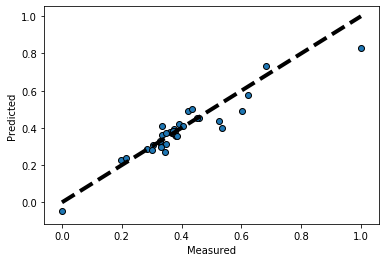

In [328]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Gaming Accessory

In [329]:
np.random.seed(0)
df_train, df_test = train_test_split(gaming_acc_week2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [330]:
gaming_acc_week2.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla', 'payday_flag',
       'product_vertical_GameControlMount', 'mass_market_true', 'product_mrp',
       'product_vertical_GamePad', 'product_vertical_GamingAccessoryKit',
       'product_vertical_GamingAdapter', 'holiday_flag',
       'product_vertical_GamingChargingStation',
       'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard',
       'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse',
       'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker',
       'product_vertical_JoystickGamingWheel',
       'product_vertical_MotionController',
       'product_vertical_TVOutCableAccessory', 'payd_week', 'holiday_week',
       'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5',
       'TV', 'TV_SMA_3', 'TV_SMA_5', 'Digital', 'Digital_SMA_3',
       'Digital_SMA_5', 'Sponsorship', 'Sponsorship_SMA_3',
       'Sponsorship_SMA_5', 'Content Marketing', 'Content Marketing

In [331]:
num_vars1 = ['gmv', 'discount', 'sla', 'product_procurement_sla', 'payday_flag',
       'product_vertical_GameControlMount', 'mass_market_true', 'product_mrp',
       'product_vertical_GamePad', 'product_vertical_GamingAccessoryKit',
       'product_vertical_GamingAdapter', 'holiday_flag',
       'product_vertical_GamingChargingStation',
       'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard',
       'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse',
       'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker',
       'product_vertical_JoystickGamingWheel',
       'product_vertical_MotionController',
       'product_vertical_TVOutCableAccessory', 'payd_week', 'holiday_week',
       'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5',
       'TV', 'TV_SMA_3', 'TV_SMA_5', 'Digital', 'Digital_SMA_3',
       'Digital_SMA_5', 'Sponsorship', 'Sponsorship_SMA_3',
       'Sponsorship_SMA_5', 'Content Marketing', 'Content Marketing_SMA_3',
       'Content Marketing_SMA_5', 'Online marketing', 'Online marketing_SMA_3',
       'Online marketing_SMA_5', 'Affiliates', 'Affiliates_SMA_3',
       'Affiliates_SMA_5', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'Radio',
       'Radio_SMA_3', 'Radio_SMA_5', 'Other', 'Other_SMA_3', 'Other_SMA_5',
       'TV_ADS', 'Digital_ADS', 'Sponsorship_ADS', 'Content_Marketing_ADS',
       'Online_Marketing_ADS', 'Affiliates_ADS', 'SEM_ADS', 'Radio_ADS',
       'Other_ADS', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index',
       'Stock Index_SMA_3', 'Stock Index_SMA_5', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']

In [332]:
df_train[num_vars1] = scaler.fit_transform(df_train[num_vars1])
df_test[num_vars1] = scaler.fit_transform(df_test[num_vars1])

In [333]:
df_train.describe()

,gmv,discount,sla,product_procurement_sla,payday_flag,product_vertical_GameControlMount,mass_market_true,product_mrp,product_vertical_GamePad,product_vertical_GamingAccessoryKit,...,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
count,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,...,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00
mean,0.42,0.27,0.43,0.37,0.09,0.03,0.31,0.23,0.51,0.55,...,0.00,0.60,0.52,0.52,0.24,0.23,0.17,0.03,0.17,0.03
std,0.19,0.19,0.17,0.20,0.17,0.17,0.17,0.19,0.20,0.21,...,0.00,0.32,0.27,0.35,0.30,0.34,0.24,0.17,0.24,0.17
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.33,0.15,0.34,0.25,0.00,0.00,0.22,0.15,0.45,0.46,...,0.00,0.46,0.33,0.25,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.41,0.27,0.45,0.37,0.00,0.00,0.29,0.17,0.51,0.57,...,0.00,0.67,0.48,0.52,0.09,0.00,0.08,0.00,0.08,0.00
75%,0.49,0.32,0.50,0.46,0.13,0.00,0.37,0.22,0.61,0.65,...,0.00,0.85,0.72,0.84,0.43,0.47,0.26,0.00,0.28,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [334]:
y_train = df_train.pop('gmv')
X_train = df_train

In [335]:
lm = LinearRegression()

In [336]:
lm.fit(X_train, y_train)

LinearRegression()

In [337]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-7.45470176e-02  6.66684637e-02 -7.09693373e-02 -1.08648226e-01
 -3.77043638e-02 -3.37553274e+00  9.85121640e-02  8.35089366e-01
  1.52269535e-01 -3.88623673e-02  4.28163831e-02  1.79369372e-02
  1.22215267e+00  2.42668898e-01  2.18989361e-01  1.73748912e+00
  1.09585389e-01  8.86090982e-02  8.13557359e-02  1.24515838e-01
  9.11954021e-02  2.06149315e-02 -7.51398579e-03  1.34336986e-14
 -1.76664239e-14  1.02140518e-14 -1.07136522e-14 -7.04991621e-15
 -3.10862447e-15 -1.02140518e-14 -8.54871729e-15 -5.75928194e-15
 -1.57772181e-30  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [338]:
from sklearn.feature_selection import RFE

In [339]:
lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [340]:
print(rfe.support_)           
print(rfe.ranking_) 

[ True  True False  True  True  True  True  True  True False False False
  True  True  True  True  True False  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False  True False  True]
[ 1  1  4  1  1  1  1  1  1  8  9 11  1  1  1  1  1  2  1  1  1 10 12 20
 14 18 16 17 15 19 21 23 22 49 50 53 55 57 58 56 54 52 48 26 28 30 32 34
 36 38 40 42 44 45 46 47 51 43 41 39 37 35 33 31 29 27 24 25  1  5  3  1
  7  6  1 13  1]


In [341]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', True, 1),
 ('sla', True, 1),
 ('product_procurement_sla', False, 4),
 ('payday_flag', True, 1),
 ('product_vertical_GameControlMount', True, 1),
 ('mass_market_true', True, 1),
 ('product_mrp', True, 1),
 ('product_vertical_GamePad', True, 1),
 ('product_vertical_GamingAccessoryKit', True, 1),
 ('product_vertical_GamingAdapter', False, 8),
 ('holiday_flag', False, 9),
 ('product_vertical_GamingChargingStation', False, 11),
 ('product_vertical_GamingHeadset', True, 1),
 ('product_vertical_GamingKeyboard', True, 1),
 ('product_vertical_GamingMemoryCard', True, 1),
 ('product_vertical_GamingMouse', True, 1),
 ('product_vertical_GamingMousePad', True, 1),
 ('product_vertical_GamingSpeaker', False, 2),
 ('product_vertical_JoystickGamingWheel', True, 1),
 ('product_vertical_MotionController', True, 1),
 ('product_vertical_TVOutCableAccessory', True, 1),
 ('payd_week', False, 10),
 ('holiday_week', False, 12),
 ('Total Investment', False, 20),
 ('Total Investment_SMA_3', False, 

In [342]:
col = X_train.columns[rfe.support_]
col

Index(['discount', 'sla', 'payday_flag', 'product_vertical_GameControlMount',
       'mass_market_true', 'product_mrp', 'product_vertical_GamePad',
       'product_vertical_GamingAccessoryKit', 'product_vertical_GamingHeadset',
       'product_vertical_GamingKeyboard', 'product_vertical_GamingMemoryCard',
       'product_vertical_GamingMouse', 'product_vertical_GamingMousePad',
       'product_vertical_JoystickGamingWheel',
       'product_vertical_MotionController',
       'product_vertical_TVOutCableAccessory', 'Max Temp', 'Heat Deg Days',
       'Total Snow (cm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [343]:
X_train.columns[~rfe.support_]

Index(['product_procurement_sla', 'product_vertical_GamingAdapter',
       'holiday_flag', 'product_vertical_GamingChargingStation',
       'product_vertical_GamingSpeaker', 'payd_week', 'holiday_week',
       'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5',
       'TV', 'TV_SMA_3', 'TV_SMA_5', 'Digital', 'Digital_SMA_3',
       'Digital_SMA_5', 'Sponsorship', 'Sponsorship_SMA_3',
       'Sponsorship_SMA_5', 'Content Marketing', 'Content Marketing_SMA_3',
       'Content Marketing_SMA_5', 'Online marketing', 'Online marketing_SMA_3',
       'Online marketing_SMA_5', 'Affiliates', 'Affiliates_SMA_3',
       'Affiliates_SMA_5', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'Radio',
       'Radio_SMA_3', 'Radio_SMA_5', 'Other', 'Other_SMA_3', 'Other_SMA_5',
       'TV_ADS', 'Digital_ADS', 'Sponsorship_ADS', 'Content_Marketing_ADS',
       'Online_Marketing_ADS', 'Affiliates_ADS', 'SEM_ADS', 'Radio_ADS',
       'Other_ADS', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index',
       '

In [344]:
X_train_rfe = X_train[col]

In [345]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                   0.02
discount                               -0.02
sla                                     0.03
payday_flag                            -0.12
product_vertical_GameControlMount      -0.03
mass_market_true                       -3.78
product_mrp                             0.05
product_vertical_GamePad                0.85
product_vertical_GamingAccessoryKit     0.17
product_vertical_GamingHeadset          1.33
product_vertical_GamingKeyboard         0.35
product_vertical_GamingMemoryCard       0.28
product_vertical_GamingMouse            1.88
product_vertical_GamingMousePad         0.03
product_vertical_JoystickGamingWheel    0.20
product_vertical_MotionController       0.07
product_vertical_TVOutCableAccessory    0.15
Max Temp                               -0.05
Heat Deg Days                           0.03
Total Snow (cm)                        -0.05
Snow on Grnd (cm)                       0.05
dtype: float64
                            OLS Regressi

In [346]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,mass_market_true,6964.74
9,product_vertical_GamingHeadset,1193.95
12,product_vertical_GamingMouse,1009.83
7,product_vertical_GamePad,306.59
0,const,56.41
20,Snow on Grnd (cm),44.03
19,Total Snow (cm),43.88
11,product_vertical_GamingMemoryCard,32.57
13,product_vertical_GamingMousePad,15.84
8,product_vertical_GamingAccessoryKit,15.00


In [347]:
X_train_rfe.drop('product_vertical_GamingMousePad', axis = 1, inplace = True)

In [348]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                   0.02
discount                               -0.02
sla                                     0.03
payday_flag                            -0.12
product_vertical_GameControlMount      -0.03
mass_market_true                       -3.48
product_mrp                             0.06
product_vertical_GamePad                0.79
product_vertical_GamingAccessoryKit     0.16
product_vertical_GamingHeadset          1.24
product_vertical_GamingKeyboard         0.35
product_vertical_GamingMemoryCard       0.27
product_vertical_GamingMouse            1.75
product_vertical_JoystickGamingWheel    0.20
product_vertical_MotionController       0.07
product_vertical_TVOutCableAccessory    0.14
Max Temp                               -0.05
Heat Deg Days                           0.03
Total Snow (cm)                        -0.04
Snow on Grnd (cm)                       0.05
dtype: float64
                            OLS Regression Results                            
Dep. V

In [349]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,mass_market_true,4689.65
9,product_vertical_GamingHeadset,840.03
12,product_vertical_GamingMouse,672.59
7,product_vertical_GamePad,214.42
0,const,56.40
18,Total Snow (cm),42.79
19,Snow on Grnd (cm),42.40
11,product_vertical_GamingMemoryCard,26.94
10,product_vertical_GamingKeyboard,13.44
8,product_vertical_GamingAccessoryKit,12.86


In [350]:
X_train_rfe.drop('Total Snow (cm)', axis = 1, inplace = True)

In [351]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                   0.01
discount                               -0.02
sla                                     0.03
payday_flag                            -0.12
product_vertical_GameControlMount      -0.02
mass_market_true                       -3.32
product_mrp                             0.06
product_vertical_GamePad                0.76
product_vertical_GamingAccessoryKit     0.16
product_vertical_GamingHeadset          1.19
product_vertical_GamingKeyboard         0.34
product_vertical_GamingMemoryCard       0.27
product_vertical_GamingMouse            1.69
product_vertical_JoystickGamingWheel    0.19
product_vertical_MotionController       0.07
product_vertical_TVOutCableAccessory    0.14
Max Temp                               -0.05
Heat Deg Days                           0.02
Snow on Grnd (cm)                       0.00
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared: 

In [352]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,mass_market_true,4147.31
9,product_vertical_GamingHeadset,753.39
12,product_vertical_GamingMouse,588.76
7,product_vertical_GamePad,187.58
0,const,56.30
11,product_vertical_GamingMemoryCard,24.54
8,product_vertical_GamingAccessoryKit,12.81
10,product_vertical_GamingKeyboard,11.47
3,payday_flag,8.93
13,product_vertical_JoystickGamingWheel,6.23


In [353]:
X_train_rfe.drop('Snow on Grnd (cm)', axis = 1, inplace = True)

In [354]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                   0.02
discount                               -0.02
sla                                     0.03
payday_flag                            -0.12
product_vertical_GameControlMount      -0.02
mass_market_true                       -3.29
product_mrp                             0.06
product_vertical_GamePad                0.76
product_vertical_GamingAccessoryKit     0.16
product_vertical_GamingHeadset          1.18
product_vertical_GamingKeyboard         0.34
product_vertical_GamingMemoryCard       0.26
product_vertical_GamingMouse            1.67
product_vertical_JoystickGamingWheel    0.19
product_vertical_MotionController       0.07
product_vertical_TVOutCableAccessory    0.14
Max Temp                               -0.05
Heat Deg Days                           0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:           

In [355]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,mass_market_true,3857.85
9,product_vertical_GamingHeadset,702.46
12,product_vertical_GamingMouse,543.19
7,product_vertical_GamePad,173.28
0,const,55.00
11,product_vertical_GamingMemoryCard,22.60
8,product_vertical_GamingAccessoryKit,12.79
10,product_vertical_GamingKeyboard,10.79
3,payday_flag,8.93
13,product_vertical_JoystickGamingWheel,5.90


In [356]:
X_train_rfe.drop('discount', axis = 1, inplace = True)

In [357]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                   0.02
sla                                     0.02
payday_flag                            -0.12
product_vertical_GameControlMount      -0.02
mass_market_true                       -3.32
product_mrp                             0.06
product_vertical_GamePad                0.76
product_vertical_GamingAccessoryKit     0.17
product_vertical_GamingHeadset          1.18
product_vertical_GamingKeyboard         0.34
product_vertical_GamingMemoryCard       0.26
product_vertical_GamingMouse            1.68
product_vertical_JoystickGamingWheel    0.19
product_vertical_MotionController       0.07
product_vertical_TVOutCableAccessory    0.14
Max Temp                               -0.05
Heat Deg Days                           0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:       

In [358]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,mass_market_true,3847.48
8,product_vertical_GamingHeadset,702.38
11,product_vertical_GamingMouse,543.17
6,product_vertical_GamePad,173.23
0,const,54.98
10,product_vertical_GamingMemoryCard,22.60
7,product_vertical_GamingAccessoryKit,10.79
9,product_vertical_GamingKeyboard,10.48
2,payday_flag,8.90
12,product_vertical_JoystickGamingWheel,5.85


In [359]:
X_train_rfe.drop('product_vertical_GameControlMount', axis = 1, inplace = True)

In [360]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                   0.02
sla                                     0.02
payday_flag                            -0.13
mass_market_true                       -3.19
product_mrp                             0.06
product_vertical_GamePad                0.73
product_vertical_GamingAccessoryKit     0.17
product_vertical_GamingHeadset          1.14
product_vertical_GamingKeyboard         0.34
product_vertical_GamingMemoryCard       0.25
product_vertical_GamingMouse            1.63
product_vertical_JoystickGamingWheel    0.19
product_vertical_MotionController       0.08
product_vertical_TVOutCableAccessory    0.14
Max Temp                               -0.05
Heat Deg Days                           0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Leas

In [361]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mass_market_true,3769.39
7,product_vertical_GamingHeadset,689.01
10,product_vertical_GamingMouse,532.84
5,product_vertical_GamePad,165.32
0,const,54.96
9,product_vertical_GamingMemoryCard,21.99
6,product_vertical_GamingAccessoryKit,10.62
8,product_vertical_GamingKeyboard,10.47
2,payday_flag,8.57
11,product_vertical_JoystickGamingWheel,5.42


In [362]:
X_train_rfe.drop('sla', axis = 1, inplace = True)

In [363]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                   0.03
payday_flag                            -0.12
mass_market_true                       -3.25
product_mrp                             0.06
product_vertical_GamePad                0.73
product_vertical_GamingAccessoryKit     0.17
product_vertical_GamingHeadset          1.17
product_vertical_GamingKeyboard         0.34
product_vertical_GamingMemoryCard       0.26
product_vertical_GamingMouse            1.64
product_vertical_JoystickGamingWheel    0.19
product_vertical_MotionController       0.08
product_vertical_TVOutCableAccessory    0.15
Max Temp                               -0.05
Heat Deg Days                           0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     

In [364]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,mass_market_true,3753.70
6,product_vertical_GamingHeadset,684.38
9,product_vertical_GamingMouse,532.40
4,product_vertical_GamePad,165.15
0,const,33.91
8,product_vertical_GamingMemoryCard,21.95
5,product_vertical_GamingAccessoryKit,10.61
7,product_vertical_GamingKeyboard,10.44
1,payday_flag,8.11
10,product_vertical_JoystickGamingWheel,5.41


In [365]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                   0.03
payday_flag                            -0.12
mass_market_true                       -3.25
product_mrp                             0.06
product_vertical_GamePad                0.73
product_vertical_GamingAccessoryKit     0.17
product_vertical_GamingHeadset          1.17
product_vertical_GamingKeyboard         0.34
product_vertical_GamingMemoryCard       0.26
product_vertical_GamingMouse            1.64
product_vertical_JoystickGamingWheel    0.19
product_vertical_MotionController       0.08
product_vertical_TVOutCableAccessory    0.15
Max Temp                               -0.05
Heat Deg Days                           0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     

In [366]:
X_train_rfe.drop('mass_market_true', axis = 1, inplace = True)

In [367]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.19
8,product_vertical_GamingMouse,6.83
5,product_vertical_GamingHeadset,6.80
6,product_vertical_GamingKeyboard,6.64
1,payday_flag,5.75
3,product_vertical_GamePad,5.46
4,product_vertical_GamingAccessoryKit,5.23
10,product_vertical_MotionController,4.94
9,product_vertical_JoystickGamingWheel,4.68
12,Max Temp,4.12


In [368]:
X_train_rfe.drop('Heat Deg Days', axis = 1, inplace = True)

In [369]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                   0.04
payday_flag                            -0.19
product_mrp                             0.08
product_vertical_GamePad                0.16
product_vertical_GamingAccessoryKit     0.09
product_vertical_GamingHeadset          0.12
product_vertical_GamingKeyboard         0.23
product_vertical_GamingMemoryCard       0.08
product_vertical_GamingMouse            0.35
product_vertical_JoystickGamingWheel    0.16
product_vertical_MotionController       0.08
product_vertical_TVOutCableAccessory    0.09
Max Temp                               -0.07
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     452.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.51e-24
Time:

In [370]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.37
8,product_vertical_GamingMouse,6.82
6,product_vertical_GamingKeyboard,6.62
5,product_vertical_GamingHeadset,6.47
1,payday_flag,5.52
3,product_vertical_GamePad,5.37
10,product_vertical_MotionController,4.85
9,product_vertical_JoystickGamingWheel,4.60
4,product_vertical_GamingAccessoryKit,4.02
12,Max Temp,3.87


In [371]:
X_train_rfe.drop('product_vertical_GamingMouse', axis = 1, inplace = True)

In [372]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.01
payday_flag                            -0.09
product_mrp                             0.08
product_vertical_GamePad                0.20
product_vertical_GamingAccessoryKit     0.14
product_vertical_GamingHeadset          0.24
product_vertical_GamingKeyboard         0.32
product_vertical_GamingMemoryCard       0.09
product_vertical_JoystickGamingWheel    0.13
product_vertical_MotionController       0.03
product_vertical_TVOutCableAccessory    0.05
Max Temp                               -0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     125.0
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.07e-18
Time:                        21:09:44   Log-Likeli

In [373]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.58
6,product_vertical_GamingKeyboard,6.20
3,product_vertical_GamePad,5.21
5,product_vertical_GamingHeadset,4.92
1,payday_flag,4.88
9,product_vertical_MotionController,4.62
8,product_vertical_JoystickGamingWheel,4.40
4,product_vertical_GamingAccessoryKit,3.78
11,Max Temp,3.43
7,product_vertical_GamingMemoryCard,2.65


In [374]:
X_train_rfe.drop('product_vertical_MotionController', axis = 1, inplace = True)

In [375]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.01
payday_flag                            -0.11
product_mrp                             0.08
product_vertical_GamePad                0.21
product_vertical_GamingAccessoryKit     0.13
product_vertical_GamingHeadset          0.24
product_vertical_GamingKeyboard         0.34
product_vertical_GamingMemoryCard       0.10
product_vertical_JoystickGamingWheel    0.14
product_vertical_TVOutCableAccessory    0.06
Max Temp                               -0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     140.6
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.09e-19
Time:                        21:09:45   Log-Likelihood:                 82.588
No. Observations

In [376]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,25.78
3,product_vertical_GamePad,5.20
5,product_vertical_GamingHeadset,4.91
6,product_vertical_GamingKeyboard,4.91
4,product_vertical_GamingAccessoryKit,3.76
10,Max Temp,3.38
1,payday_flag,3.26
8,product_vertical_JoystickGamingWheel,2.48
9,product_vertical_TVOutCableAccessory,2.41
7,product_vertical_GamingMemoryCard,2.29


In [377]:
X_train_rfe.drop('Max Temp', axis = 1, inplace = True)

In [378]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.02
payday_flag                            -0.12
product_mrp                             0.07
product_vertical_GamePad                0.19
product_vertical_GamingAccessoryKit     0.14
product_vertical_GamingHeadset          0.26
product_vertical_GamingKeyboard         0.35
product_vertical_GamingMemoryCard       0.11
product_vertical_JoystickGamingWheel    0.13
product_vertical_TVOutCableAccessory    0.06
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     159.6
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.98e-20
Time:                        21:09:45   Log-Likelihood:                 82.274
No. Observations:                  36   AIC:                 

In [379]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,12.05
6,product_vertical_GamingKeyboard,4.84
3,product_vertical_GamePad,4.67
4,product_vertical_GamingAccessoryKit,3.74
5,product_vertical_GamingHeadset,3.59
1,payday_flag,3.18
9,product_vertical_TVOutCableAccessory,2.35
7,product_vertical_GamingMemoryCard,1.90
8,product_vertical_JoystickGamingWheel,1.79
2,product_mrp,1.55


In [380]:
X_train_rfe.drop('product_vertical_TVOutCableAccessory', axis = 1, inplace = True)

In [381]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.02
payday_flag                            -0.11
product_mrp                             0.07
product_vertical_GamePad                0.23
product_vertical_GamingAccessoryKit     0.16
product_vertical_GamingHeadset          0.26
product_vertical_GamingKeyboard         0.33
product_vertical_GamingMemoryCard       0.10
product_vertical_JoystickGamingWheel    0.12
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     166.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           6.36e-21
Time:                        21:09:45   Log-Likelihood:                 80.238
No. Observations:                  36   AIC:                            -142.5
Df Residuals:              

In [382]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.47
6,product_vertical_GamingKeyboard,4.77
3,product_vertical_GamePad,4.03
5,product_vertical_GamingHeadset,3.59
4,product_vertical_GamingAccessoryKit,3.28
1,payday_flag,3.10
7,product_vertical_GamingMemoryCard,1.85
8,product_vertical_JoystickGamingWheel,1.73
2,product_mrp,1.54


In [383]:
X_train_rfe.drop('payday_flag', axis = 1, inplace = True)

In [384]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.01
product_mrp                             0.04
product_vertical_GamePad                0.25
product_vertical_GamingAccessoryKit     0.16
product_vertical_GamingHeadset          0.24
product_vertical_GamingKeyboard         0.26
product_vertical_GamingMemoryCard       0.11
product_vertical_JoystickGamingWheel    0.13
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     169.8
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           3.27e-21
Time:                        21:09:45   Log-Likelihood:                 77.628
No. Observations:                  36   AIC:                            -139.3
Df Residuals:                      28   BIC:                            

In [385]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.66
2,product_vertical_GamePad,3.87
5,product_vertical_GamingKeyboard,3.40
4,product_vertical_GamingHeadset,3.39
3,product_vertical_GamingAccessoryKit,3.28
6,product_vertical_GamingMemoryCard,1.82
7,product_vertical_JoystickGamingWheel,1.71
1,product_mrp,1.29


In [386]:
X_train_rfe.drop('product_mrp', axis = 1, inplace = True)

In [387]:
X_train_rfe= sm.add_constant(X_train_rfe)

# Fitting the model 
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)

print(lm.summary())

const                                  -0.00
product_vertical_GamePad                0.24
product_vertical_GamingAccessoryKit     0.16
product_vertical_GamingHeadset          0.23
product_vertical_GamingKeyboard         0.29
product_vertical_GamingMemoryCard       0.11
product_vertical_JoystickGamingWheel    0.12
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           5.46e-22
Time:                        21:09:45   Log-Likelihood:                 76.480
No. Observations:                  36   AIC:                            -139.0
Df Residuals:                      29   BIC:                            -127.9
Df Model:                           6 

In [388]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.62
1,product_vertical_GamePad,3.85
3,product_vertical_GamingHeadset,3.37
2,product_vertical_GamingAccessoryKit,3.28
4,product_vertical_GamingKeyboard,2.88
5,product_vertical_GamingMemoryCard,1.82
6,product_vertical_JoystickGamingWheel,1.68


In [389]:
X_train_rfe.columns

Index(['const', 'product_vertical_GamePad',
       'product_vertical_GamingAccessoryKit', 'product_vertical_GamingHeadset',
       'product_vertical_GamingKeyboard', 'product_vertical_GamingMemoryCard',
       'product_vertical_JoystickGamingWheel'],
      dtype='object')

In [390]:
drop_columns_list = list(set(num_vars1) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['gmv', 'Digital_SMA_5', 'SEM_SMA_3', 'product_vertical_GamingAdapter', 'Sponsorship_SMA_3', 'SEM', 'payday_flag', 'Sponsorship', 'Radio_ADS', 'Stock Index', 'product_vertical_GamingChargingStation', 'holiday_week', 'Sponsorship_ADS', 'product_vertical_GameControlMount', 'product_vertical_GamingSpeaker', 'Content Marketing_SMA_3', 'Affiliates_SMA_5', 'product_vertical_GamingMouse', 'product_procurement_sla', 'Online marketing_SMA_3', 'TV_SMA_5', 'Other_SMA_5', 'Content Marketing', 'Min Temp', 'product_vertical_GamingMousePad', 'Max Temp', 'Other_ADS', 'Online marketing_SMA_5', 'NPS_SMA_5', 'SEM_ADS', 'Stock Index_SMA_3', 'SEM_SMA_5', 'NPS', 'Total Precip (mm)', 'holiday_flag', 'Content Marketing_SMA_5', 'Affiliates_SMA_3', 'sla', 'Other', 'Digital_ADS', 'NPS_SMA_3', 'Radio', 'Online_Marketing_ADS', 'Online marketing', 'Heat Deg Days', 'product_vertical_MotionController', 'Snow on Grnd (cm)', 'Cool Deg Days', 'Digital', 'Total Snow (cm)', 'Total Investment_SMA_3', 'TV_SMA_3', 'Total Inv

In [391]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([0.68972542, 0.96612475, 0.46014099, 0.96002254, 0.86243481,
       0.93219086, 0.79326316, 0.93032428, 0.99468631, 0.97907844])

In [392]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [393]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.001626289185455829
r_square_value : 0.9522856716235782


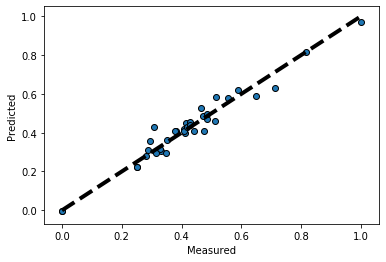

In [394]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Home Audio

In [395]:
from sklearn.model_selection import train_test_split

In [396]:
np.random.seed(0)
df_train, df_test = train_test_split(Home_audio_week2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [397]:
Home_audio_week2.columns

Index(['gmv', 'discount', 'holiday_flag', 'sla', 'mass_market_true',
       'payday_flag', 'product_vertical_Dock',
       'product_vertical_DockingStation', 'product_vertical_FMRadio',
       'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker',
       'product_mrp', 'product_vertical_SoundMixer',
       'product_vertical_VoiceRecorder', 'pay_week', 'holiday_week',
       'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5',
       'TV', 'TV_SMA_3', 'TV_SMA_5', 'Digital', 'Digital_SMA_3',
       'Digital_SMA_5', 'Sponsorship', 'Sponsorship_SMA_3',
       'Sponsorship_SMA_5', 'Content Marketing', 'Content Marketing_SMA_3',
       'Content Marketing_SMA_5', 'Online marketing', 'Online marketing_SMA_3',
       'Online marketing_SMA_5', 'Affiliates', 'Affiliates_SMA_3',
       'Affiliates_SMA_5', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'Radio',
       'Radio_SMA_3', 'Radio_SMA_5', 'Other', 'Other_SMA_3', 'Other_SMA_5',
       'TV_ADS', 'Digital_ADS', 'Sponsorship_

In [398]:
num_vars3 = ['gmv', 'discount', 'holiday_flag', 'sla', 'mass_market_true',
       'payday_flag', 'product_vertical_Dock',
       'product_vertical_DockingStation', 'product_vertical_FMRadio',
       'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker',
       'product_mrp', 'product_vertical_SoundMixer',
       'product_vertical_VoiceRecorder', 'pay_week', 'holiday_week',
       'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5',
       'TV', 'TV_SMA_3', 'TV_SMA_5', 'Digital', 'Digital_SMA_3',
       'Digital_SMA_5', 'Sponsorship', 'Sponsorship_SMA_3',
       'Sponsorship_SMA_5', 'Content Marketing', 'Content Marketing_SMA_3',
       'Content Marketing_SMA_5', 'Online marketing', 'Online marketing_SMA_3',
       'Online marketing_SMA_5', 'Affiliates', 'Affiliates_SMA_3',
       'Affiliates_SMA_5', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'Radio',
       'Radio_SMA_3', 'Radio_SMA_5', 'Other', 'Other_SMA_3', 'Other_SMA_5',
       'TV_ADS', 'Digital_ADS', 'Sponsorship_ADS', 'Content_Marketing_ADS',
       'Online_Marketing_ADS', 'Affiliates_ADS', 'SEM_ADS', 'Radio_ADS',
       'Other_ADS', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index',
       'Stock Index_SMA_3', 'Stock Index_SMA_5', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']

In [399]:
df_train[num_vars3] = scaler.fit_transform(df_train[num_vars3])

df_test[num_vars3] = scaler.fit_transform(df_test[num_vars3])

In [400]:
df_train.describe()

,gmv,discount,holiday_flag,sla,mass_market_true,payday_flag,product_vertical_Dock,product_vertical_DockingStation,product_vertical_FMRadio,product_vertical_HiFiSystem,...,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
count,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,...,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00
mean,0.62,0.67,0.15,0.33,0.56,0.23,0.42,0.26,0.61,0.47,...,0.00,0.54,0.55,0.48,0.23,0.22,0.16,0.04,0.16,0.03
std,0.22,0.17,0.31,0.20,0.20,0.32,0.21,0.25,0.22,0.20,...,0.00,0.34,0.27,0.36,0.31,0.33,0.24,0.17,0.25,0.17
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.48,0.60,0.00,0.18,0.43,0.00,0.27,0.12,0.53,0.36,...,0.00,0.33,0.35,0.13,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.59,0.66,0.00,0.31,0.57,0.00,0.39,0.15,0.61,0.47,...,0.00,0.64,0.50,0.46,0.03,0.00,0.07,0.00,0.07,0.00
75%,0.77,0.74,0.00,0.44,0.66,0.54,0.59,0.45,0.76,0.56,...,0.00,0.81,0.75,0.84,0.44,0.47,0.19,0.00,0.22,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [401]:
y_train = df_train.pop('gmv')
X_train = df_train

In [402]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [403]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [404]:
print(lm.coef_)
print(lm.intercept_)

[-1.79620737e-01  1.06732907e-01 -6.32736199e-02 -1.33495390e-01
  6.01342096e-02  8.91907732e-02  2.69295996e-02  2.45885549e-01
  7.05793723e-02  8.72490624e-01  1.79820321e-01  6.97236442e-02
 -6.40174216e-02 -3.62250034e-02 -7.83706695e-02  8.32667268e-17
  1.11022302e-16  2.15105711e-16  0.00000000e+00 -1.94289029e-16
  5.55111512e-17 -8.32667268e-17 -2.77555756e-17  2.10165713e-16
 -1.02936580e-17 -2.99813262e-16  1.74317302e-16 -1.23352684e-16
 -1.02651230e-16 -6.50081841e-17 -4.70312499e-16  9.56013475e-17
 -4.93038066e-32  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.69059626e-03 -2.78221

In [405]:
# Import RFE
from sklearn.feature_selection import RFE


lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)


# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_)

[ True  True  True  True  True  True False  True  True  True  True  True
  True False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True False False  True  True  True]
[ 1  1  1  1  1  1  3  1  1  1  1  1  1  2  1  7 21 10 44 25  9 11 23 27
 29 31 33 34 32 30 28 26 46 49 50 48 22 42 43 41  6 36 45 38 39 40 37 47
 12  8 35 13 24 14 15 16 17 18 19 20  1  1  1  1  4  5  1  1  1]


In [406]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', True, 1),
 ('holiday_flag', True, 1),
 ('sla', True, 1),
 ('mass_market_true', True, 1),
 ('payday_flag', True, 1),
 ('product_vertical_Dock', True, 1),
 ('product_vertical_DockingStation', False, 3),
 ('product_vertical_FMRadio', True, 1),
 ('product_vertical_HiFiSystem', True, 1),
 ('product_vertical_HomeAudioSpeaker', True, 1),
 ('product_mrp', True, 1),
 ('product_vertical_SoundMixer', True, 1),
 ('product_vertical_VoiceRecorder', True, 1),
 ('pay_week', False, 2),
 ('holiday_week', True, 1),
 ('Total Investment', False, 7),
 ('Total Investment_SMA_3', False, 21),
 ('Total Investment_SMA_5', False, 10),
 ('TV', False, 44),
 ('TV_SMA_3', False, 25),
 ('TV_SMA_5', False, 9),
 ('Digital', False, 11),
 ('Digital_SMA_3', False, 23),
 ('Digital_SMA_5', False, 27),
 ('Sponsorship', False, 29),
 ('Sponsorship_SMA_3', False, 31),
 ('Sponsorship_SMA_5', False, 33),
 ('Content Marketing', False, 34),
 ('Content Marketing_SMA_3', False, 32),
 ('Content Marketing_SMA_5', False, 30

In [407]:
col = X_train.columns[rfe.support_]
col

Index(['discount', 'holiday_flag', 'sla', 'mass_market_true', 'payday_flag',
       'product_vertical_Dock', 'product_vertical_FMRadio',
       'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker',
       'product_mrp', 'product_vertical_SoundMixer',
       'product_vertical_VoiceRecorder', 'holiday_week', 'Max Temp',
       'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [408]:
X_train.columns[~rfe.support_]

Index(['product_vertical_DockingStation', 'pay_week', 'Total Investment',
       'Total Investment_SMA_3', 'Total Investment_SMA_5', 'TV', 'TV_SMA_3',
       'TV_SMA_5', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Sponsorship',
       'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Content Marketing',
       'Content Marketing_SMA_3', 'Content Marketing_SMA_5',
       'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5',
       'Affiliates', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 'SEM',
       'SEM_SMA_3', 'SEM_SMA_5', 'Radio', 'Radio_SMA_3', 'Radio_SMA_5',
       'Other', 'Other_SMA_3', 'Other_SMA_5', 'TV_ADS', 'Digital_ADS',
       'Sponsorship_ADS', 'Content_Marketing_ADS', 'Online_Marketing_ADS',
       'Affiliates_ADS', 'SEM_ADS', 'Radio_ADS', 'Other_ADS', 'NPS',
       'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index', 'Stock Index_SMA_3',
       'Stock Index_SMA_5', 'Cool Deg Days', 'Total Rain (mm)'],
      dtype='object')

In [409]:
import statsmodels.api as sm 
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [410]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [411]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.params
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     516.5
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.06e-15
Time:                        21:09:46   Log-Likelihood:                 117.86
No. Observations:                  34   AIC:                            -193.7
Df Residuals:                      13   BIC:                            -161.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [412]:
len(y_train),len(X_train_rfe)

(34, 34)

In [413]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,374.74
16,Mean Temp,287.44
14,Max Temp,179.30
13,holiday_week,70.05
2,holiday_flag,63.73
9,product_vertical_HomeAudioSpeaker,58.88
18,Total Snow (cm),51.74
20,Snow on Grnd (cm),47.80
15,Min Temp,45.54
4,mass_market_true,26.39


In [414]:
X_train_rfe.drop('product_vertical_VoiceRecorder', axis = 1, inplace = True)

In [415]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                0.06
discount                            -0.17
holiday_flag                         0.11
sla                                 -0.05
mass_market_true                    -0.09
payday_flag                          0.01
product_vertical_Dock                0.05
product_vertical_FMRadio             0.25
product_vertical_HiFiSystem          0.09
product_vertical_HomeAudioSpeaker    0.79
product_mrp                          0.22
product_vertical_SoundMixer          0.07
holiday_week                        -0.07
Max Temp                            -0.12
Min Temp                            -0.05
Mean Temp                            0.16
Heat Deg Days                       -0.03
Total Snow (cm)                      0.19
Total Precip (mm)                    0.04
Snow on Grnd (cm)                   -0.21
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                

In [416]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,361.94
15,Mean Temp,209.68
13,Max Temp,128.49
2,holiday_flag,49.36
12,holiday_week,48.72
14,Min Temp,44.96
9,product_vertical_HomeAudioSpeaker,44.21
17,Total Snow (cm),43.06
19,Snow on Grnd (cm),38.81
4,mass_market_true,22.53


In [417]:
X_train_rfe.drop('payday_flag', axis = 1, inplace = True)

In [418]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                0.07
discount                            -0.17
holiday_flag                         0.12
sla                                 -0.04
mass_market_true                    -0.09
product_vertical_Dock                0.05
product_vertical_FMRadio             0.25
product_vertical_HiFiSystem          0.10
product_vertical_HomeAudioSpeaker    0.79
product_mrp                          0.22
product_vertical_SoundMixer          0.07
holiday_week                        -0.08
Max Temp                            -0.14
Min Temp                            -0.07
Mean Temp                            0.18
Heat Deg Days                       -0.03
Total Snow (cm)                      0.18
Total Precip (mm)                    0.04
Snow on Grnd (cm)                   -0.20
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                       

In [419]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,359.48
14,Mean Temp,181.63
12,Max Temp,113.85
11,holiday_week,47.18
2,holiday_flag,46.64
8,product_vertical_HomeAudioSpeaker,43.38
16,Total Snow (cm),42.54
13,Min Temp,39.39
18,Snow on Grnd (cm),38.44
4,mass_market_true,22.50


In [420]:
X_train_rfe.drop('sla', axis = 1, inplace = True)

In [421]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                0.03
discount                            -0.11
holiday_flag                         0.14
mass_market_true                    -0.09
product_vertical_Dock                0.04
product_vertical_FMRadio             0.25
product_vertical_HiFiSystem          0.10
product_vertical_HomeAudioSpeaker    0.77
product_mrp                          0.23
product_vertical_SoundMixer          0.08
holiday_week                        -0.09
Max Temp                            -0.16
Min Temp                            -0.08
Mean Temp                            0.20
Heat Deg Days                       -0.04
Total Snow (cm)                      0.17
Total Precip (mm)                    0.05
Snow on Grnd (cm)                   -0.19
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                

In [422]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Mean Temp,173.87
0,const,154.57
11,Max Temp,110.04
10,holiday_week,42.85
15,Total Snow (cm),42.33
7,product_vertical_HomeAudioSpeaker,39.38
2,holiday_flag,39.26
12,Min Temp,38.60
17,Snow on Grnd (cm),38.21
3,mass_market_true,22.16


In [423]:
X_train_rfe.drop('Min Temp', axis = 1, inplace = True)

In [424]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                               -0.00
discount                            -0.12
holiday_flag                         0.11
mass_market_true                    -0.09
product_vertical_Dock                0.03
product_vertical_FMRadio             0.26
product_vertical_HiFiSystem          0.10
product_vertical_HomeAudioSpeaker    0.78
product_mrp                          0.23
product_vertical_SoundMixer          0.07
holiday_week                        -0.06
Max Temp                            -0.10
Mean Temp                            0.11
Heat Deg Days                       -0.02
Total Snow (cm)                      0.20
Total Precip (mm)                    0.04
Snow on Grnd (cm)                   -0.22
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squa

In [425]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Max Temp,77.23
12,Mean Temp,71.91
0,const,48.25
14,Total Snow (cm),39.86
7,product_vertical_HomeAudioSpeaker,38.72
16,Snow on Grnd (cm),36.67
10,holiday_week,31.31
2,holiday_flag,29.57
3,mass_market_true,22.09
8,product_mrp,14.75


In [426]:
X_train_rfe.drop('product_vertical_Dock', axis = 1, inplace = True)

In [427]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                               -0.00
discount                            -0.11
holiday_flag                         0.13
mass_market_true                    -0.07
product_vertical_FMRadio             0.27
product_vertical_HiFiSystem          0.11
product_vertical_HomeAudioSpeaker    0.75
product_mrp                          0.23
product_vertical_SoundMixer          0.08
holiday_week                        -0.08
Max Temp                            -0.12
Mean Temp                            0.13
Heat Deg Days                       -0.02
Total Snow (cm)                      0.18
Total Precip (mm)                    0.04
Snow on Grnd (cm)                   -0.20
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     631

In [428]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Max Temp,69.94
11,Mean Temp,65.71
0,const,48.25
13,Total Snow (cm),38.19
15,Snow on Grnd (cm),35.51
6,product_vertical_HomeAudioSpeaker,34.88
9,holiday_week,26.79
2,holiday_flag,25.71
3,mass_market_true,19.75
7,product_mrp,14.62


In [429]:
X_train_rfe.drop('mass_market_true', axis = 1, inplace = True)

In [430]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                0.00
discount                            -0.13
holiday_flag                         0.13
product_vertical_FMRadio             0.26
product_vertical_HiFiSystem          0.11
product_vertical_HomeAudioSpeaker    0.69
product_mrp                          0.25
product_vertical_SoundMixer          0.08
holiday_week                        -0.08
Max Temp                            -0.14
Mean Temp                            0.14
Heat Deg Days                       -0.02
Total Snow (cm)                      0.18
Total Precip (mm)                    0.04
Snow on Grnd (cm)                   -0.20
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     642.5
Date:                Mon, 16 Aug 2021  

In [431]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Max Temp,66.08
10,Mean Temp,63.13
0,const,47.64
12,Total Snow (cm),38.19
14,Snow on Grnd (cm),35.51
8,holiday_week,26.73
2,holiday_flag,25.25
5,product_vertical_HomeAudioSpeaker,13.34
6,product_mrp,12.14
1,discount,6.56


In [432]:
X_train_rfe.drop('Heat Deg Days', axis = 1, inplace = True)

In [433]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                               -0.00
discount                            -0.12
holiday_flag                         0.13
product_vertical_FMRadio             0.26
product_vertical_HiFiSystem          0.11
product_vertical_HomeAudioSpeaker    0.69
product_mrp                          0.25
product_vertical_SoundMixer          0.08
holiday_week                        -0.08
Max Temp                            -0.17
Mean Temp                            0.17
Total Snow (cm)                      0.14
Total Precip (mm)                    0.03
Snow on Grnd (cm)                   -0.16
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     673.6
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.85e-23
Ti

In [434]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Max Temp,56.50
10,Mean Temp,50.85
0,const,46.37
11,Total Snow (cm),32.90
13,Snow on Grnd (cm),31.04
8,holiday_week,26.70
2,holiday_flag,25.00
5,product_vertical_HomeAudioSpeaker,13.33
6,product_mrp,11.89
1,discount,6.17


In [435]:
X_train_rfe.drop('Total Snow (cm)', axis = 1, inplace = True)

In [436]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                0.00
discount                            -0.11
holiday_flag                         0.12
product_vertical_FMRadio             0.25
product_vertical_HiFiSystem          0.11
product_vertical_HomeAudioSpeaker    0.68
product_mrp                          0.24
product_vertical_SoundMixer          0.08
holiday_week                        -0.07
Max Temp                            -0.14
Mean Temp                            0.14
Total Precip (mm)                    0.03
Snow on Grnd (cm)                   -0.03
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     649.7
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           3.64e-24
Time:                        21:09:47   Log-

In [437]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Max Temp,50.76
0,const,44.79
10,Mean Temp,43.49
8,holiday_week,26.61
2,holiday_flag,24.70
5,product_vertical_HomeAudioSpeaker,13.30
6,product_mrp,11.56
1,discount,6.06
3,product_vertical_FMRadio,5.25
7,product_vertical_SoundMixer,3.39


In [438]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                0.00
discount                            -0.11
holiday_flag                         0.12
product_vertical_FMRadio             0.25
product_vertical_HiFiSystem          0.11
product_vertical_HomeAudioSpeaker    0.68
product_mrp                          0.24
product_vertical_SoundMixer          0.08
holiday_week                        -0.07
Max Temp                            -0.14
Mean Temp                            0.14
Total Precip (mm)                    0.03
Snow on Grnd (cm)                   -0.03
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     649.7
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           3.64e-24
Time:                        21:09:47   Log-

In [439]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Max Temp,50.76
0,const,44.79
10,Mean Temp,43.49
8,holiday_week,26.61
2,holiday_flag,24.70
5,product_vertical_HomeAudioSpeaker,13.30
6,product_mrp,11.56
1,discount,6.06
3,product_vertical_FMRadio,5.25
7,product_vertical_SoundMixer,3.39


In [440]:
X_train_rfe.drop('Snow on Grnd (cm)', axis = 1, inplace = True)

In [441]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                               -0.00
discount                            -0.10
holiday_flag                         0.13
product_vertical_FMRadio             0.24
product_vertical_HiFiSystem          0.11
product_vertical_HomeAudioSpeaker    0.70
product_mrp                          0.22
product_vertical_SoundMixer          0.08
holiday_week                        -0.08
Max Temp                            -0.14
Mean Temp                            0.14
Total Precip (mm)                    0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     664.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           4.38e-25
Time:                        21:09:47   Log-Likelihood:                 103.05
No. Obs

In [442]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Max Temp,50.76
0,const,43.70
10,Mean Temp,43.27
8,holiday_week,26.24
2,holiday_flag,24.52
5,product_vertical_HomeAudioSpeaker,11.88
6,product_mrp,10.37
1,discount,5.94
3,product_vertical_FMRadio,4.64
7,product_vertical_SoundMixer,3.37


In [443]:
X_train_rfe.drop('Total Precip (mm)', axis = 1, inplace = True)

In [444]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                0.00
discount                            -0.09
holiday_flag                         0.11
product_vertical_FMRadio             0.22
product_vertical_HiFiSystem          0.11
product_vertical_HomeAudioSpeaker    0.72
product_mrp                          0.20
product_vertical_SoundMixer          0.07
holiday_week                        -0.07
Max Temp                            -0.08
Mean Temp                            0.10
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     695.4
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           4.48e-26
Time:                        21:09:47   Log-Likelihood:                 101.46
No. Observations:                  34   AIC:     

In [445]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,43.51
9,Max Temp,27.71
8,holiday_week,23.77
10,Mean Temp,23.38
2,holiday_flag,21.50
5,product_vertical_HomeAudioSpeaker,10.27
6,product_mrp,8.13
1,discount,5.87
3,product_vertical_FMRadio,4.23
4,product_vertical_HiFiSystem,2.54


In [446]:
X_train_rfe.drop('holiday_week', axis = 1, inplace = True)

In [447]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                0.00
discount                            -0.10
holiday_flag                         0.03
product_vertical_FMRadio             0.23
product_vertical_HiFiSystem          0.11
product_vertical_HomeAudioSpeaker    0.72
product_mrp                          0.21
product_vertical_SoundMixer          0.05
Max Temp                            -0.07
Mean Temp                            0.08
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     671.8
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.34e-26
Time:                        21:09:47   Log-Likelihood:                 98.373
No. Observations:                  34   AIC:                            -176.7
Df Residuals

In [448]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.97
8,Max Temp,27.13
9,Mean Temp,22.58
5,product_vertical_HomeAudioSpeaker,10.25
6,product_mrp,8.01
1,discount,5.75
3,product_vertical_FMRadio,4.15
4,product_vertical_HiFiSystem,2.53
7,product_vertical_SoundMixer,1.72
2,holiday_flag,1.56


In [449]:
X_train_rfe.drop('Max Temp', axis = 1, inplace = True)

In [450]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                0.00
discount                            -0.11
holiday_flag                         0.02
product_vertical_FMRadio             0.22
product_vertical_HiFiSystem          0.09
product_vertical_HomeAudioSpeaker    0.76
product_mrp                          0.18
product_vertical_SoundMixer          0.04
Mean Temp                            0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     702.6
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.89e-27
Time:                        21:09:48   Log-Likelihood:                 96.447
No. Observations:                  34   AIC:                            -174.9
Df Residuals:                      25   BIC:          

In [451]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.54
6,product_mrp,6.62
5,product_vertical_HomeAudioSpeaker,6.41
1,discount,5.74
3,product_vertical_FMRadio,3.77
4,product_vertical_HiFiSystem,2.07
8,Mean Temp,1.79
2,holiday_flag,1.39
7,product_vertical_SoundMixer,1.30


In [452]:
X_train_rfe.drop('holiday_flag', axis = 1, inplace = True)

In [453]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                                0.00
discount                            -0.09
product_vertical_FMRadio             0.20
product_vertical_HiFiSystem          0.08
product_vertical_HomeAudioSpeaker    0.78
product_mrp                          0.16
product_vertical_SoundMixer          0.04
Mean Temp                            0.02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     737.5
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           3.12e-28
Time:                        21:09:48   Log-Likelihood:                 94.343
No. Observations:                  34   AIC:                            -172.7
Df Residuals:                      26   BIC:                            -160.5
Df Model:        

In [454]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.41
4,product_vertical_HomeAudioSpeaker,5.89
5,product_mrp,5.55
1,discount,5.38
2,product_vertical_FMRadio,3.22
3,product_vertical_HiFiSystem,2.03
7,Mean Temp,1.78
6,product_vertical_SoundMixer,1.28


In [455]:
X_train_rfe.drop('discount', axis = 1, inplace = True)

In [456]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                               -0.03
product_vertical_FMRadio             0.18
product_vertical_HiFiSystem          0.08
product_vertical_HomeAudioSpeaker    0.76
product_mrp                          0.13
product_vertical_SoundMixer          0.03
Mean Temp                            0.03
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     755.4
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           9.43e-29
Time:                        21:09:48   Log-Likelihood:                 91.504
No. Observations:                  34   AIC:                            -169.0
Df Residuals:                      27   BIC:                            -158.3
Df Model:                           6                      

In [457]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.42
3,product_vertical_HomeAudioSpeaker,5.61
4,product_mrp,3.87
1,product_vertical_FMRadio,2.93
2,product_vertical_HiFiSystem,2.00
6,Mean Temp,1.58
5,product_vertical_SoundMixer,1.12


In [458]:
X_train_rfe.drop('product_vertical_SoundMixer', axis = 1, inplace = True)

In [459]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const                               -0.02
product_vertical_FMRadio             0.17
product_vertical_HiFiSystem          0.09
product_vertical_HomeAudioSpeaker    0.77
product_mrp                          0.12
Mean Temp                            0.04
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     773.0
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           4.39e-29
Time:                        21:09:48   Log-Likelihood:                 88.201
No. Observations:                  34   AIC:                            -164.4
Df Residuals:                      28   BIC:                            -155.2
Df Model:                           5                                         
Covariance Type:      

In [460]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.38
3,product_vertical_HomeAudioSpeaker,5.59
4,product_mrp,3.81
1,product_vertical_FMRadio,2.82
2,product_vertical_HiFiSystem,1.98
5,Mean Temp,1.55


In [461]:
X_train_rfe.drop('product_vertical_HomeAudioSpeaker', axis = 1, inplace = True)

In [462]:
X_train_rfe.columns

Index(['const', 'product_vertical_FMRadio', 'product_vertical_HiFiSystem',
       'product_mrp', 'Mean Temp'],
      dtype='object')

In [463]:
drop_columns_list = list(set(num_vars3) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['gmv', 'Digital_SMA_5', 'product_vertical_HomeAudioSpeaker', 'SEM_SMA_3', 'Sponsorship_SMA_3', 'SEM', 'payday_flag', 'Sponsorship', 'Radio_ADS', 'Stock Index', 'holiday_week', 'Sponsorship_ADS', 'product_vertical_SoundMixer', 'Content Marketing_SMA_3', 'Affiliates_SMA_5', 'Online marketing_SMA_3', 'TV_SMA_5', 'Other_SMA_5', 'Content Marketing', 'Max Temp', 'Min Temp', 'Other_ADS', 'Online marketing_SMA_5', 'NPS_SMA_5', 'SEM_ADS', 'Stock Index_SMA_3', 'SEM_SMA_5', 'NPS', 'Total Precip (mm)', 'holiday_flag', 'Content Marketing_SMA_5', 'sla', 'Affiliates_SMA_3', 'Other', 'Digital_ADS', 'NPS_SMA_3', 'Radio', 'Online_Marketing_ADS', 'Online marketing', 'Heat Deg Days', 'Snow on Grnd (cm)', 'Cool Deg Days', 'product_vertical_Dock', 'Digital', 'Total Snow (cm)', 'Total Investment_SMA_3', 'TV_SMA_3', 'Total Investment', 'TV_ADS', 'discount', 'product_vertical_VoiceRecorder', 'Stock Index_SMA_5', 'pay_week', 'TV', 'mass_market_true', 'Affiliates', 'Sponsorship_SMA_5', 'product_vertical_Docking

In [464]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([0.92736704, 0.59879311, 0.55179115, 0.95079075, 0.8889681 ,
       0.92211975, 0.06955755, 0.81368873, 0.78124719, 0.96547845])

In [465]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [466]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0075942507523438585
r_square_value : 0.8328678502077569


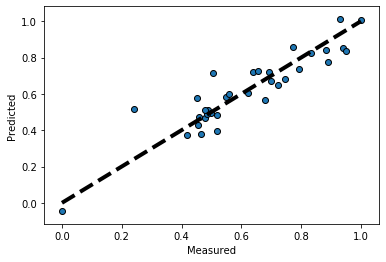

In [467]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### 2) Multiplicative model

In [468]:
camera_acc_week3 = camera_acc_week1.copy()
gaming_acc_week3 = gaming_acc_week1.copy()
Home_audio_week3 = Home_audio_week1.copy()

In [469]:
camera_acc_week3.shape

(51, 86)

In [470]:
camera_acc_week1.shape

(51, 86)

In [471]:
camera_acc_week3 = camera_acc_week3.applymap(lambda x: np.log(x))
camera_acc_week3 = camera_acc_week3.replace([np.inf, -np.inf], 0)
camera_acc_week3 = camera_acc_week3.replace(np.nan, 0)

gaming_acc_week3 = gaming_acc_week3.applymap(lambda x: np.log(x))
gaming_acc_week3 = gaming_acc_week3.replace([np.inf, -np.inf], 0)
camera_acc_week3 = camera_acc_week3.replace(np.nan, 0)

Home_audio_week3 = Home_audio_week3.applymap(lambda x: np.log(x))
Home_audio_week3 = Home_audio_week3.replace([np.inf, -np.inf], 0)
Home_audio_week3 = Home_audio_week3.replace(np.nan, 0)

#### Camera Accessory (Multiplicative model)

In [472]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(camera_acc_week3, train_size = 0.7, test_size = 0.3, random_state = 100)

In [473]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [474]:
camera_acc_week3.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla', 'payday_flag',
       'product_mrp', 'holiday_flag', 'product_vertical_CameraAccessory',
       'product_vertical_CameraBag', 'product_vertical_CameraBattery',
       'product_vertical_CameraBatteryCharger',
       'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup',
       'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing',
       'product_vertical_CameraMicrophone', 'product_vertical_CameraMount',
       'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod',
       'product_vertical_ExtensionTube', 'product_vertical_Filter',
       'product_vertical_Flash', 'product_vertical_FlashShoeAdapter',
       'product_vertical_Lens', 'product_vertical_ReflectorUmbrella',
       'product_vertical_Softbox', 'product_vertical_Strap',
       'product_vertical_Teleconverter', 'product_vertical_Telescope',
       'mass_market_true', 'pay_week', 'holiday_week', 'Total Investment',
      

In [475]:
num_vars5=['gmv', 'discount', 'sla', 'product_procurement_sla', 'payday_flag',
       'product_mrp', 'holiday_flag', 'product_vertical_CameraAccessory',
       'product_vertical_CameraBag', 'product_vertical_CameraBattery',
       'product_vertical_CameraBatteryCharger',
       'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup',
       'product_vertical_CameraFilmRolls', 'product_vertical_CameraHousing',
       'product_vertical_CameraMicrophone', 'product_vertical_CameraMount',
       'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod',
       'product_vertical_ExtensionTube', 'product_vertical_Filter',
       'product_vertical_Flash', 'product_vertical_FlashShoeAdapter',
       'product_vertical_Lens', 'product_vertical_ReflectorUmbrella',
       'product_vertical_Softbox', 'product_vertical_Strap',
       'product_vertical_Teleconverter', 'product_vertical_Telescope',
       'mass_market_true', 'pay_week', 'holiday_week', 'Total Investment',
       'Total Investment_SMA_3', 'Total Investment_SMA_5', 'TV', 'TV_SMA_3',
       'TV_SMA_5', 'Digital', 'Digital_SMA_3', 'Digital_SMA_5', 'Sponsorship',
       'Sponsorship_SMA_3', 'Sponsorship_SMA_5', 'Content Marketing',
       'Content Marketing_SMA_3', 'Content Marketing_SMA_5',
       'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5',
       'Affiliates', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 'SEM',
       'SEM_SMA_3', 'SEM_SMA_5', 'Radio', 'Radio_SMA_3', 'Radio_SMA_5',
       'Other', 'Other_SMA_3', 'Other_SMA_5', 'TV_ADS', 'Digital_ADS',
       'Sponsorship_ADS', 'Content_Marketing_ADS', 'Online_Marketing_ADS',
       'Affiliates_ADS', 'SEM_ADS', 'Radio_ADS', 'Other_ADS', 'NPS',
       'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index', 'Stock Index_SMA_3',
       'Stock Index_SMA_5', 'Max Temp', 'Min Temp', 'Mean Temp',
       'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)']

In [476]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [477]:
y_train = df_train.pop('gmv')
X_train = df_train

In [478]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)   
rfe = rfe.fit(X_train, y_train)

In [479]:
col = X_train.columns[rfe.support_]
col

Index(['discount', 'payday_flag', 'product_mrp', 'product_vertical_CameraBag',
       'product_vertical_CameraBattery',
       'product_vertical_CameraBatteryCharger',
       'product_vertical_CameraHousing', 'product_vertical_CameraMount',
       'product_vertical_CameraRemoteControl', 'product_vertical_CameraTripod',
       'product_vertical_ExtensionTube', 'product_vertical_Filter',
       'product_vertical_Flash', 'product_vertical_Lens',
       'product_vertical_Softbox', 'product_vertical_Strap',
       'mass_market_true', 'Max Temp', 'Mean Temp', 'Cool Deg Days'],
      dtype='object')

In [480]:
X_train.columns[~rfe.support_]

Index(['sla', 'product_procurement_sla', 'holiday_flag',
       'product_vertical_CameraAccessory',
       'product_vertical_CameraBatteryGrip', 'product_vertical_CameraEyeCup',
       'product_vertical_CameraFilmRolls', 'product_vertical_CameraMicrophone',
       'product_vertical_FlashShoeAdapter',
       'product_vertical_ReflectorUmbrella', 'product_vertical_Teleconverter',
       'product_vertical_Telescope', 'pay_week', 'holiday_week',
       'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5',
       'TV', 'TV_SMA_3', 'TV_SMA_5', 'Digital', 'Digital_SMA_3',
       'Digital_SMA_5', 'Sponsorship', 'Sponsorship_SMA_3',
       'Sponsorship_SMA_5', 'Content Marketing', 'Content Marketing_SMA_3',
       'Content Marketing_SMA_5', 'Online marketing', 'Online marketing_SMA_3',
       'Online marketing_SMA_5', 'Affiliates', 'Affiliates_SMA_3',
       'Affiliates_SMA_5', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'Radio',
       'Radio_SMA_3', 'Radio_SMA_5', 'Other', 'Other_SMA_3

In [481]:
X_train_rfe = X_train[col]

In [482]:
#import statsmodels.api as sm  
#X_train_rfe = sm.add_constant(X_train_rfe)

In [483]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.602e+04
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           3.48e-27
Time:                        21:09:49   Log-Likelihood:                 191.58
No. Observations:                  35   AIC:                            -341.2
Df Residuals:                      14   BIC:                            -308.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [484]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,mass_market_true,2141.02
12,product_vertical_Filter,652.69
14,product_vertical_Lens,646.31
4,product_vertical_CameraBag,468.61
5,product_vertical_CameraBattery,284.42
10,product_vertical_CameraTripod,272.77
0,const,206.19
9,product_vertical_CameraRemoteControl,123.44
6,product_vertical_CameraBatteryCharger,101.83
13,product_vertical_Flash,74.23


In [485]:
X_train_rfe.drop('mass_market_true', axis = 1, inplace = True)
X_train_rfe.drop('product_vertical_Filter', axis = 1, inplace = True)
X_train_rfe.drop('product_vertical_Lens', axis = 1, inplace = True)

In [486]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     556.2
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           5.63e-20
Time:                        21:09:49   Log-Likelihood:                 126.56
No. Observations:                  35   AIC:                            -217.1
Df Residuals:                      17   BIC:                            -189.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [487]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,184.67
5,product_vertical_CameraBattery,180.17
4,product_vertical_CameraBag,109.36
6,product_vertical_CameraBatteryCharger,89.14
10,product_vertical_CameraTripod,49.37
9,product_vertical_CameraRemoteControl,35.80
14,product_vertical_Strap,26.28
16,Mean Temp,19.57
15,Max Temp,14.68
12,product_vertical_Flash,11.96


In [488]:
X_train_rfe.drop('product_vertical_ExtensionTube', axis = 1, inplace = True)

In [489]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     625.7
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.19e-21
Time:                        21:09:49   Log-Likelihood:                 126.56
No. Observations:                  35   AIC:                            -219.1
Df Residuals:                      18   BIC:                            -192.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [490]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,183.44
5,product_vertical_CameraBattery,136.64
6,product_vertical_CameraBatteryCharger,87.85
4,product_vertical_CameraBag,81.76
10,product_vertical_CameraTripod,41.97
9,product_vertical_CameraRemoteControl,34.97
13,product_vertical_Strap,25.06
15,Mean Temp,18.39
14,Max Temp,14.63
11,product_vertical_Flash,10.77


In [491]:
X_train_rfe.drop('product_vertical_CameraBattery', axis = 1, inplace = True)
X_train_rfe.drop('product_vertical_CameraRemoteControl', axis = 1, inplace = True)

In [492]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     727.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           6.66e-24
Time:                        21:09:49   Log-Likelihood:                 125.01
No. Observations:                  35   AIC:                            -220.0
Df Residuals:                      20   BIC:                            -196.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [493]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,174.49
4,product_vertical_CameraBag,59.89
5,product_vertical_CameraBatteryCharger,55.87
8,product_vertical_CameraTripod,27.05
11,product_vertical_Strap,24.66
13,Mean Temp,15.15
12,Max Temp,14.14
9,product_vertical_Flash,10.17
1,discount,5.48
3,product_mrp,4.69


In [494]:
X_train_rfe.drop('Mean Temp', axis = 1, inplace = True)
X_train_rfe.drop('product_vertical_Strap', axis = 1, inplace = True)

In [495]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     751.8
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           7.62e-26
Time:                        21:09:49   Log-Likelihood:                 121.24
No. Observations:                  35   AIC:                            -216.5
Df Residuals:                      22   BIC:                            -196.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [496]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,149.25
4,product_vertical_CameraBag,55.85
5,product_vertical_CameraBatteryCharger,27.41
8,product_vertical_CameraTripod,24.99
9,product_vertical_Flash,8.60
1,discount,5.09
3,product_mrp,4.68
7,product_vertical_CameraMount,4.01
6,product_vertical_CameraHousing,3.97
12,Cool Deg Days,3.35


In [497]:
X_train_rfe.drop('discount', axis = 1, inplace = True)
X_train_rfe.drop('Max Temp', axis = 1, inplace = True)

In [498]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     647.5
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.15e-26
Time:                        21:09:49   Log-Likelihood:                 113.93
No. Observations:                  35   AIC:                            -205.9
Df Residuals:                      24   BIC:                            -188.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [499]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,90.35
3,product_vertical_CameraBag,50.33
4,product_vertical_CameraBatteryCharger,25.61
7,product_vertical_CameraTripod,19.12
8,product_vertical_Flash,7.70
2,product_mrp,3.62
6,product_vertical_CameraMount,2.67
5,product_vertical_CameraHousing,2.61
10,Cool Deg Days,2.53
1,payday_flag,1.58


In [500]:
X_train_rfe.drop('product_vertical_CameraMount', axis = 1, inplace = True)
X_train_rfe.drop('payday_flag', axis = 1, inplace = True)

In [501]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     743.0
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.12e-28
Time:                        21:09:49   Log-Likelihood:                 111.05
No. Observations:                  35   AIC:                            -204.1
Df Residuals:                      26   BIC:                            -190.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [502]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,88.62
2,product_vertical_CameraBag,35.05
3,product_vertical_CameraBatteryCharger,22.03
5,product_vertical_CameraTripod,15.51
6,product_vertical_Flash,5.92
1,product_mrp,3.17
4,product_vertical_CameraHousing,2.56
8,Cool Deg Days,2.40
7,product_vertical_Softbox,1.10


In [503]:
X_train_rfe.drop('product_vertical_CameraTripod', axis = 1, inplace = True)
X_train_rfe.drop('product_vertical_CameraBag', axis = 1, inplace = True)

In [504]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     266.4
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.33e-23
Time:                        21:09:49   Log-Likelihood:                 86.993
No. Observations:                  35   AIC:                            -160.0
Df Residuals:                      28   BIC:                            -149.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [505]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,85.64
4,product_vertical_Flash,5.44
2,product_vertical_CameraBatteryCharger,4.28
6,Cool Deg Days,2.26
3,product_vertical_CameraHousing,2.14
1,product_mrp,1.88
5,product_vertical_Softbox,1.10


In [506]:
X_train_rfe.drop('product_vertical_Softbox', axis = 1, inplace = True)

In [507]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     314.0
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.57e-24
Time:                        21:09:50   Log-Likelihood:                 86.079
No. Observations:                  35   AIC:                            -160.2
Df Residuals:                      29   BIC:                            -150.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [508]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.61
4,product_vertical_Flash,5.39
2,product_vertical_CameraBatteryCharger,4.27
5,Cool Deg Days,2.23
3,product_vertical_CameraHousing,2.05
1,product_mrp,1.81


In [509]:
X_train_rfe.drop('Cool Deg Days', axis = 1, inplace = True)

In [510]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     337.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.83e-24
Time:                        21:09:50   Log-Likelihood:                 82.887
No. Observations:                  35   AIC:                            -155.8
Df Residuals:                      30   BIC:                            -148.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [511]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.39
2,product_vertical_CameraBatteryCharger,4.05
4,product_vertical_Flash,3.65
1,product_mrp,1.81
3,product_vertical_CameraHousing,1.19


In [512]:
X_train_rfe.drop('product_vertical_CameraHousing', axis = 1, inplace = True)

In [513]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     434.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.13e-25
Time:                        21:09:50   Log-Likelihood:                 81.743
No. Observations:                  35   AIC:                            -155.5
Df Residuals:                      31   BIC:                            -149.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [514]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.21
2,product_vertical_CameraBatteryCharger,4.03
3,product_vertical_Flash,3.61
1,product_mrp,1.73


In [515]:
X_train_rfe.columns

Index(['product_mrp', 'product_vertical_CameraBatteryCharger',
       'product_vertical_Flash'],
      dtype='object')

In [516]:
drop_columns_list = list(set(num_vars5) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['gmv', 'product_vertical_ReflectorUmbrella', 'Digital_SMA_5', 'SEM_SMA_3', 'product_vertical_CameraTripod', 'product_vertical_Filter', 'Sponsorship_SMA_3', 'product_vertical_CameraEyeCup', 'SEM', 'payday_flag', 'Sponsorship', 'Radio_ADS', 'Stock Index', 'product_vertical_CameraBag', 'product_vertical_Lens', 'holiday_week', 'Sponsorship_ADS', 'Content Marketing_SMA_3', 'Affiliates_SMA_5', 'product_procurement_sla', 'Online marketing_SMA_3', 'TV_SMA_5', 'Other_SMA_5', 'Content Marketing', 'Min Temp', 'product_vertical_CameraFilmRolls', 'Max Temp', 'Other_ADS', 'Online marketing_SMA_5', 'NPS_SMA_5', 'SEM_ADS', 'product_vertical_Teleconverter', 'Stock Index_SMA_3', 'SEM_SMA_5', 'NPS', 'Total Precip (mm)', 'holiday_flag', 'Content Marketing_SMA_5', 'Affiliates_SMA_3', 'sla', 'product_vertical_FlashShoeAdapter', 'product_vertical_CameraBattery', 'product_vertical_Telescope', 'product_vertical_CameraAccessory', 'product_vertical_CameraRemoteControl', 'Other', 'Digital_ADS', 'NPS_SMA_3', 'Rad

In [517]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([ -2.86137486,   0.39985656,  -3.60361465,   0.7262992 ,
        -5.56313639,   0.97033781, -19.57469254,   0.63235391,
         0.2138469 ,  -3.05027046])

In [518]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [519]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.005270053631413911
r_square_value : 0.7765981240148756


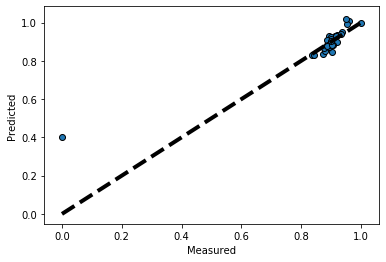

In [520]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Gaming Accessory (Multiplicative model)

In [521]:
gaming_acc_week3.isnull()

,gmv,discount,sla,product_procurement_sla,payday_flag,product_vertical_GameControlMount,mass_market_true,product_mrp,product_vertical_GamePad,product_vertical_GamingAccessoryKit,...,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
26,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [522]:
gaming_acc_week3 = gaming_acc_week3.fillna(value=0)

In [523]:
gaming_acc_week3.isnull()

,gmv,discount,sla,product_procurement_sla,payday_flag,product_vertical_GameControlMount,mass_market_true,product_mrp,product_vertical_GamePad,product_vertical_GamingAccessoryKit,...,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
26,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [524]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(gaming_acc_week3, train_size = 0.7, test_size = 0.3, random_state = 100)

In [525]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [526]:
gaming_acc_week3.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla', 'payday_flag',
       'product_vertical_GameControlMount', 'mass_market_true', 'product_mrp',
       'product_vertical_GamePad', 'product_vertical_GamingAccessoryKit',
       'product_vertical_GamingAdapter', 'holiday_flag',
       'product_vertical_GamingChargingStation',
       'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard',
       'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse',
       'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker',
       'product_vertical_JoystickGamingWheel',
       'product_vertical_MotionController',
       'product_vertical_TVOutCableAccessory', 'payd_week', 'holiday_week',
       'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5',
       'TV', 'TV_SMA_3', 'TV_SMA_5', 'Digital', 'Digital_SMA_3',
       'Digital_SMA_5', 'Sponsorship', 'Sponsorship_SMA_3',
       'Sponsorship_SMA_5', 'Content Marketing', 'Content Marketing

In [527]:
num_vars7=['gmv', 'discount', 'sla', 'product_procurement_sla', 'payday_flag',
       'product_vertical_GameControlMount', 'mass_market_true', 'product_mrp',
       'product_vertical_GamePad', 'product_vertical_GamingAccessoryKit',
       'product_vertical_GamingAdapter', 'holiday_flag',
       'product_vertical_GamingChargingStation',
       'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard',
       'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse',
       'product_vertical_GamingMousePad', 'product_vertical_GamingSpeaker',
       'product_vertical_JoystickGamingWheel',
       'product_vertical_MotionController',
       'product_vertical_TVOutCableAccessory', 'payd_week', 'holiday_week',
       'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5',
       'TV', 'TV_SMA_3', 'TV_SMA_5', 'Digital', 'Digital_SMA_3',
       'Digital_SMA_5', 'Sponsorship', 'Sponsorship_SMA_3',
       'Sponsorship_SMA_5', 'Content Marketing', 'Content Marketing_SMA_3',
       'Content Marketing_SMA_5', 'Online marketing', 'Online marketing_SMA_3',
       'Online marketing_SMA_5', 'Affiliates', 'Affiliates_SMA_3',
       'Affiliates_SMA_5', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'Radio',
       'Radio_SMA_3', 'Radio_SMA_5', 'Other', 'Other_SMA_3', 'Other_SMA_5',
       'TV_ADS', 'Digital_ADS', 'Sponsorship_ADS', 'Content_Marketing_ADS',
       'Online_Marketing_ADS', 'Affiliates_ADS', 'SEM_ADS', 'Radio_ADS',
       'Other_ADS', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index',
       'Stock Index_SMA_3', 'Stock Index_SMA_5', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']

In [528]:
df_train[num_vars7] = scaler.fit_transform(df_train[num_vars7])
df_test[num_vars7] = scaler.fit_transform(df_test[num_vars7])

In [529]:
y_train = df_train.pop('gmv')
X_train = df_train

In [530]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [531]:
col = X_train.columns[rfe.support_]
col

Index(['discount', 'sla', 'product_procurement_sla', 'mass_market_true',
       'product_mrp', 'product_vertical_GamePad',
       'product_vertical_GamingAccessoryKit', 'product_vertical_GamingAdapter',
       'product_vertical_GamingChargingStation',
       'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard',
       'product_vertical_GamingMemoryCard', 'product_vertical_GamingMouse',
       'product_vertical_GamingMousePad', 'product_vertical_MotionController',
       'product_vertical_TVOutCableAccessory', 'Max Temp', 'Mean Temp',
       'Cool Deg Days', 'Snow on Grnd (cm)'],
      dtype='object')

In [532]:
X_train.columns[~rfe.support_]

Index(['payday_flag', 'product_vertical_GameControlMount', 'holiday_flag',
       'product_vertical_GamingSpeaker',
       'product_vertical_JoystickGamingWheel', 'payd_week', 'holiday_week',
       'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5',
       'TV', 'TV_SMA_3', 'TV_SMA_5', 'Digital', 'Digital_SMA_3',
       'Digital_SMA_5', 'Sponsorship', 'Sponsorship_SMA_3',
       'Sponsorship_SMA_5', 'Content Marketing', 'Content Marketing_SMA_3',
       'Content Marketing_SMA_5', 'Online marketing', 'Online marketing_SMA_3',
       'Online marketing_SMA_5', 'Affiliates', 'Affiliates_SMA_3',
       'Affiliates_SMA_5', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'Radio',
       'Radio_SMA_3', 'Radio_SMA_5', 'Other', 'Other_SMA_3', 'Other_SMA_5',
       'TV_ADS', 'Digital_ADS', 'Sponsorship_ADS', 'Content_Marketing_ADS',
       'Online_Marketing_ADS', 'Affiliates_ADS', 'SEM_ADS', 'Radio_ADS',
       'Other_ADS', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index',
       'Stock Index

In [533]:
X_train_rfe = X_train[col]

In [534]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     831.2
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.42e-19
Time:                        21:09:51   Log-Likelihood:                 131.64
No. Observations:                  36   AIC:                            -221.3
Df Residuals:                      15   BIC:                            -188.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [535]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,mass_market_true,2510.13
6,product_vertical_GamePad,566.12
0,const,280.18
10,product_vertical_GamingHeadset,206.94
13,product_vertical_GamingMouse,170.17
7,product_vertical_GamingAccessoryKit,141.42
8,product_vertical_GamingAdapter,53.00
16,product_vertical_TVOutCableAccessory,47.16
11,product_vertical_GamingKeyboard,36.40
14,product_vertical_GamingMousePad,27.77


In [536]:
X_train_rfe.drop('mass_market_true', axis = 1, inplace = True)

In [537]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     820.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.17e-20
Time:                        21:09:51   Log-Likelihood:                 129.32
No. Observations:                  36   AIC:                            -218.6
Df Residuals:                      16   BIC:                            -187.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [538]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,277.46
6,product_vertical_GamingAccessoryKit,139.16
12,product_vertical_GamingMouse,99.85
5,product_vertical_GamePad,93.38
9,product_vertical_GamingHeadset,54.78
7,product_vertical_GamingAdapter,47.83
15,product_vertical_TVOutCableAccessory,45.70
10,product_vertical_GamingKeyboard,35.92
13,product_vertical_GamingMousePad,22.05
11,product_vertical_GamingMemoryCard,12.93


In [539]:
X_train_rfe.drop('product_vertical_GamingAccessoryKit', axis = 1, inplace = True)
X_train_rfe.drop('product_vertical_GamingMousePad', axis = 1, inplace = True)
X_train_rfe.drop('product_vertical_GamingMemoryCard', axis = 1, inplace = True)

In [540]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1151.
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           6.27e-25
Time:                        21:09:51   Log-Likelihood:                 129.23
No. Observations:                  36   AIC:                            -224.5
Df Residuals:                      19   BIC:                            -197.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [541]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,266.24
10,product_vertical_GamingMouse,73.01
5,product_vertical_GamePad,67.31
8,product_vertical_GamingHeadset,46.69
6,product_vertical_GamingAdapter,40.76
12,product_vertical_TVOutCableAccessory,38.47
9,product_vertical_GamingKeyboard,24.04
13,Max Temp,10.48
14,Mean Temp,10.30
11,product_vertical_MotionController,7.24


In [542]:
X_train_rfe.drop('product_vertical_GamingAdapter', axis = 1, inplace = True)
X_train_rfe.drop('product_vertical_GamingMouse', axis = 1, inplace = True)
X_train_rfe.drop('Cool Deg Days', axis = 1, inplace = True)

In [543]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1200.
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           3.21e-28
Time:                        21:09:51   Log-Likelihood:                 123.60
No. Observations:                  36   AIC:                            -219.2
Df Residuals:                      22   BIC:                            -197.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [544]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,172.73
5,product_vertical_GamePad,58.60
10,product_vertical_TVOutCableAccessory,35.06
7,product_vertical_GamingHeadset,24.11
8,product_vertical_GamingKeyboard,21.17
11,Max Temp,9.88
12,Mean Temp,9.45
9,product_vertical_MotionController,5.26
6,product_vertical_GamingChargingStation,4.01
1,discount,2.99


In [545]:
X_train_rfe.drop('product_vertical_MotionController', axis = 1, inplace = True)
X_train_rfe.drop('Snow on Grnd (cm)', axis = 1, inplace = True)
X_train_rfe.drop('product_vertical_GamingChargingStation', axis = 1, inplace = True)

In [546]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1368.
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.21e-31
Time:                        21:09:51   Log-Likelihood:                 118.95
No. Observations:                  36   AIC:                            -215.9
Df Residuals:                      25   BIC:                            -198.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [547]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,153.48
5,product_vertical_GamePad,46.57
8,product_vertical_TVOutCableAccessory,29.26
6,product_vertical_GamingHeadset,21.99
7,product_vertical_GamingKeyboard,13.52
10,Mean Temp,8.64
9,Max Temp,6.63
1,discount,2.55
2,sla,2.26
4,product_mrp,2.20


In [548]:
X_train_rfe.drop('product_vertical_TVOutCableAccessory', axis = 1, inplace = True)
X_train_rfe.drop('Max Temp', axis = 1, inplace = True)

In [549]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1645.
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           3.09e-34
Time:                        21:09:51   Log-Likelihood:                 116.87
No. Observations:                  36   AIC:                            -215.7
Df Residuals:                      27   BIC:                            -201.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [550]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,144.09
5,product_vertical_GamePad,30.07
6,product_vertical_GamingHeadset,19.15
7,product_vertical_GamingKeyboard,13.42
8,Mean Temp,2.31
1,discount,2.21
4,product_mrp,2.16
3,product_procurement_sla,2.11
2,sla,1.80


In [551]:
X_train_rfe.drop('product_vertical_GamePad', axis = 1, inplace = True)

In [552]:
X_train_rfe.drop('product_vertical_GamingHeadset', axis = 1, inplace = True)

In [553]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     75.76
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.17e-16
Time:                        21:09:51   Log-Likelihood:                 56.082
No. Observations:                  36   AIC:                            -98.16
Df Residuals:                      29   BIC:                            -87.08
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [554]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,126.58
5,product_vertical_GamingKeyboard,2.39
4,product_mrp,2.15
3,product_procurement_sla,1.94
2,sla,1.80
6,Mean Temp,1.75
1,discount,1.35


In [555]:
X_train_rfe.drop('sla', axis = 1, inplace = True)
X_train_rfe.drop('product_mrp', axis = 1, inplace = True)
X_train_rfe.drop('Mean Temp', axis = 1, inplace = True)

In [556]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     151.9
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           5.27e-19
Time:                        21:09:51   Log-Likelihood:                 54.468
No. Observations:                  36   AIC:                            -100.9
Df Residuals:                      32   BIC:                            -94.60
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [557]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.34
1,discount,1.14
3,product_vertical_GamingKeyboard,1.11
2,product_procurement_sla,1.06


In [558]:
X_train_rfe.columns

Index(['discount', 'product_procurement_sla',
       'product_vertical_GamingKeyboard'],
      dtype='object')

In [559]:
drop_columns_list = list(set(num_vars7) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['gmv', 'Digital_SMA_5', 'SEM_SMA_3', 'product_vertical_GamingAdapter', 'product_vertical_GamingAccessoryKit', 'product_vertical_GamingMemoryCard', 'Sponsorship_SMA_3', 'SEM', 'payday_flag', 'Sponsorship', 'Radio_ADS', 'Stock Index', 'product_vertical_GamingChargingStation', 'holiday_week', 'Sponsorship_ADS', 'product_vertical_GameControlMount', 'product_vertical_GamingSpeaker', 'product_vertical_JoystickGamingWheel', 'Content Marketing_SMA_3', 'Affiliates_SMA_5', 'product_vertical_GamingMouse', 'Online marketing_SMA_3', 'TV_SMA_5', 'Other_SMA_5', 'Content Marketing', 'Min Temp', 'product_vertical_GamingMousePad', 'Max Temp', 'Other_ADS', 'Online marketing_SMA_5', 'NPS_SMA_5', 'SEM_ADS', 'Stock Index_SMA_3', 'SEM_SMA_5', 'NPS', 'Total Precip (mm)', 'holiday_flag', 'Content Marketing_SMA_5', 'Affiliates_SMA_3', 'sla', 'Other', 'Digital_ADS', 'NPS_SMA_3', 'Radio', 'Online_Marketing_ADS', 'Online marketing', 'Heat Deg Days', 'product_vertical_MotionController', 'Snow on Grnd (cm)', 'Cool 

In [560]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([-5.26537363,  0.94070513, -3.5830427 , -9.62935149,  0.94427859,
       -4.92070978, -0.55850526, -1.41489557,  0.68686002, -0.90229589])

In [561]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [562]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print(mse) 
print(r_squared)

0.004657004802653103
0.8924327579838507


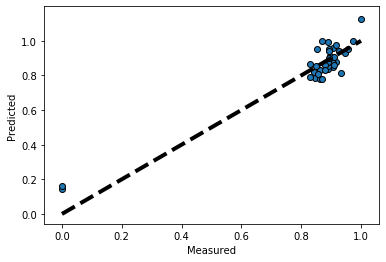

In [563]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Home Audio (Multiplicative mode)

In [564]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(Home_audio_week3, train_size = 0.7, test_size = 0.3, random_state = 100)

In [565]:
scaler = MinMaxScaler()

In [566]:
Home_audio_week3.columns

Index(['gmv', 'discount', 'holiday_flag', 'sla', 'mass_market_true',
       'payday_flag', 'product_vertical_Dock',
       'product_vertical_DockingStation', 'product_vertical_FMRadio',
       'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker',
       'product_mrp', 'product_vertical_SoundMixer',
       'product_vertical_VoiceRecorder', 'pay_week', 'holiday_week',
       'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5',
       'TV', 'TV_SMA_3', 'TV_SMA_5', 'Digital', 'Digital_SMA_3',
       'Digital_SMA_5', 'Sponsorship', 'Sponsorship_SMA_3',
       'Sponsorship_SMA_5', 'Content Marketing', 'Content Marketing_SMA_3',
       'Content Marketing_SMA_5', 'Online marketing', 'Online marketing_SMA_3',
       'Online marketing_SMA_5', 'Affiliates', 'Affiliates_SMA_3',
       'Affiliates_SMA_5', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'Radio',
       'Radio_SMA_3', 'Radio_SMA_5', 'Other', 'Other_SMA_3', 'Other_SMA_5',
       'TV_ADS', 'Digital_ADS', 'Sponsorship_

In [567]:
num_vars8=['gmv', 'discount', 'holiday_flag', 'sla', 'mass_market_true',
       'payday_flag', 'product_vertical_Dock',
       'product_vertical_DockingStation', 'product_vertical_FMRadio',
       'product_vertical_HiFiSystem', 'product_vertical_HomeAudioSpeaker',
       'product_mrp', 'product_vertical_SoundMixer',
       'product_vertical_VoiceRecorder', 'pay_week', 'holiday_week',
       'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5',
       'TV', 'TV_SMA_3', 'TV_SMA_5', 'Digital', 'Digital_SMA_3',
       'Digital_SMA_5', 'Sponsorship', 'Sponsorship_SMA_3',
       'Sponsorship_SMA_5', 'Content Marketing', 'Content Marketing_SMA_3',
       'Content Marketing_SMA_5', 'Online marketing', 'Online marketing_SMA_3',
       'Online marketing_SMA_5', 'Affiliates', 'Affiliates_SMA_3',
       'Affiliates_SMA_5', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'Radio',
       'Radio_SMA_3', 'Radio_SMA_5', 'Other', 'Other_SMA_3', 'Other_SMA_5',
       'TV_ADS', 'Digital_ADS', 'Sponsorship_ADS', 'Content_Marketing_ADS',
       'Online_Marketing_ADS', 'Affiliates_ADS', 'SEM_ADS', 'Radio_ADS',
       'Other_ADS', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index',
       'Stock Index_SMA_3', 'Stock Index_SMA_5', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']

In [568]:
df_train[num_vars8] = scaler.fit_transform(df_train[num_vars8])
df_test[num_vars8] = scaler.fit_transform(df_test[num_vars8])

In [569]:
y_train = df_train.pop('gmv')
X_train = df_train

In [570]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# rfe
rfe = RFE(lm, 20)           
rfe = rfe.fit(X_train, y_train)

In [571]:
col = X_train.columns[rfe.support_]
col

Index(['discount', 'holiday_flag', 'sla', 'mass_market_true',
       'product_vertical_Dock', 'product_vertical_DockingStation',
       'product_vertical_FMRadio', 'product_vertical_HiFiSystem',
       'product_vertical_HomeAudioSpeaker', 'product_mrp',
       'product_vertical_VoiceRecorder', 'Max Temp', 'Min Temp', 'Mean Temp',
       'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [572]:
X_train.columns[~rfe.support_]

Index(['payday_flag', 'product_vertical_SoundMixer', 'pay_week',
       'holiday_week', 'Total Investment', 'Total Investment_SMA_3',
       'Total Investment_SMA_5', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'Digital',
       'Digital_SMA_3', 'Digital_SMA_5', 'Sponsorship', 'Sponsorship_SMA_3',
       'Sponsorship_SMA_5', 'Content Marketing', 'Content Marketing_SMA_3',
       'Content Marketing_SMA_5', 'Online marketing', 'Online marketing_SMA_3',
       'Online marketing_SMA_5', 'Affiliates', 'Affiliates_SMA_3',
       'Affiliates_SMA_5', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'Radio',
       'Radio_SMA_3', 'Radio_SMA_5', 'Other', 'Other_SMA_3', 'Other_SMA_5',
       'TV_ADS', 'Digital_ADS', 'Sponsorship_ADS', 'Content_Marketing_ADS',
       'Online_Marketing_ADS', 'Affiliates_ADS', 'SEM_ADS', 'Radio_ADS',
       'Other_ADS', 'NPS', 'NPS_SMA_3', 'NPS_SMA_5', 'Stock Index',
       'Stock Index_SMA_3', 'Stock Index_SMA_5'],
      dtype='object')

In [573]:
X_train_rfe = X_train[col]

In [574]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     934.6
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.62e-18
Time:                        21:09:52   Log-Likelihood:                 134.93
No. Observations:                  34   AIC:                            -229.9
Df Residuals:                      14   BIC:                            -199.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [575]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,Snow on Grnd (cm),inf
19,Total Precip (mm),inf
18,Total Snow (cm),inf
17,Total Rain (mm),inf
9,product_vertical_HomeAudioSpeaker,918.03
4,mass_market_true,662.61
14,Mean Temp,209.23
12,Max Temp,195.09
7,product_vertical_FMRadio,163.16
1,discount,46.58


In [576]:
X_train_rfe =X_train_rfe.drop(["Snow on Grnd (cm)"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Total Precip (mm)"], axis = 1)


In [577]:
X_train_rfe =X_train_rfe.drop(["Total Snow (cm)"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Total Rain (mm)"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_HomeAudioSpeaker"], axis = 1)
X_train_rfe =X_train_rfe.drop(["mass_market_true"], axis = 1)

In [578]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     227.2
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           4.35e-18
Time:                        21:09:52   Log-Likelihood:                 100.59
No. Observations:                  34   AIC:                            -171.2
Df Residuals:                      19   BIC:                            -148.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [579]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,467.89
10,Max Temp,43.79
1,discount,36.74
12,Mean Temp,34.76
6,product_vertical_FMRadio,19.10
4,product_vertical_Dock,17.23
11,Min Temp,17.07
9,product_vertical_VoiceRecorder,15.85
3,sla,13.89
13,Heat Deg Days,12.47


In [580]:
X_train_rfe =X_train_rfe.drop(["Max Temp"], axis = 1)
X_train_rfe =X_train_rfe.drop(["discount"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Mean Temp"], axis = 1)

In [581]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     216.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           9.23e-20
Time:                        21:09:52   Log-Likelihood:                 93.200
No. Observations:                  34   AIC:                            -162.4
Df Residuals:                      22   BIC:                            -144.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [582]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,255.09
5,product_vertical_FMRadio,14.75
3,product_vertical_Dock,13.97
8,product_vertical_VoiceRecorder,13.67
2,sla,8.07
6,product_vertical_HiFiSystem,6.56
9,Min Temp,5.42
11,Cool Deg Days,5.36
7,product_mrp,4.30
4,product_vertical_DockingStation,3.34


In [583]:
X_train_rfe =X_train_rfe.drop(["product_vertical_Dock"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_VoiceRecorder"], axis = 1)

In [584]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     245.0
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.18e-21
Time:                        21:09:53   Log-Likelihood:                 90.472
No. Observations:                  34   AIC:                            -160.9
Df Residuals:                      24   BIC:                            -145.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [585]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,152.34
5,product_vertical_HiFiSystem,6.53
4,product_vertical_FMRadio,6.24
2,sla,4.49
7,Min Temp,3.52
9,Cool Deg Days,3.45
6,product_mrp,3.18
3,product_vertical_DockingStation,2.11
8,Heat Deg Days,2.01
1,holiday_flag,1.90


In [586]:
X_train_rfe =X_train_rfe.drop(["product_vertical_DockingStation"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Heat Deg Days"], axis = 1)

In [587]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     335.0
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           8.11e-24
Time:                        21:09:53   Log-Likelihood:                 90.161
No. Observations:                  34   AIC:                            -164.3
Df Residuals:                      26   BIC:                            -152.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [588]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,89.96
3,product_vertical_FMRadio,5.02
4,product_vertical_HiFiSystem,4.98
6,Min Temp,3.47
7,Cool Deg Days,2.90
2,sla,2.51
5,product_mrp,2.45
1,holiday_flag,1.78


In [589]:
X_train_rfe =X_train_rfe.drop(["Min Temp"], axis = 1)
X_train_rfe =X_train_rfe.drop(["holiday_flag"], axis = 1)

In [590]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     422.9
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.86e-25
Time:                        21:09:53   Log-Likelihood:                 87.181
No. Observations:                  34   AIC:                            -162.4
Df Residuals:                      28   BIC:                            -153.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [591]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.45
2,product_vertical_FMRadio,4.95
3,product_vertical_HiFiSystem,4.91
4,product_mrp,1.65
1,sla,1.64
5,Cool Deg Days,1.30


In [592]:
X_train_rfe.columns

Index(['sla', 'product_vertical_FMRadio', 'product_vertical_HiFiSystem',
       'product_mrp', 'Cool Deg Days'],
      dtype='object')

In [593]:
drop_columns_list = list(set(num_vars8) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['gmv', 'Digital_SMA_5', 'product_vertical_HomeAudioSpeaker', 'SEM_SMA_3', 'Sponsorship_SMA_3', 'SEM', 'payday_flag', 'Sponsorship', 'Radio_ADS', 'Stock Index', 'holiday_week', 'Sponsorship_ADS', 'product_vertical_SoundMixer', 'Content Marketing_SMA_3', 'Affiliates_SMA_5', 'Online marketing_SMA_3', 'TV_SMA_5', 'Other_SMA_5', 'Content Marketing', 'Max Temp', 'Min Temp', 'Other_ADS', 'Online marketing_SMA_5', 'NPS_SMA_5', 'SEM_ADS', 'Stock Index_SMA_3', 'SEM_SMA_5', 'NPS', 'Total Precip (mm)', 'holiday_flag', 'Content Marketing_SMA_5', 'Affiliates_SMA_3', 'Other', 'Digital_ADS', 'NPS_SMA_3', 'Radio', 'Online_Marketing_ADS', 'Online marketing', 'Heat Deg Days', 'Snow on Grnd (cm)', 'product_vertical_Dock', 'Digital', 'Total Snow (cm)', 'Total Investment_SMA_3', 'TV_SMA_3', 'Total Investment', 'TV_ADS', 'discount', 'product_vertical_VoiceRecorder', 'Mean Temp', 'Stock Index_SMA_5', 'pay_week', 'TV', 'mass_market_true', 'Affiliates', 'Sponsorship_SMA_5', 'product_vertical_DockingStation', '

In [594]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([ 0.6973174 ,  0.64382003,  0.02262668,  0.84481776,  0.71845916,
        0.50470899,  0.68717986,  0.94938406, -0.14087542,  0.8945123 ])

In [595]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [596]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print(mse) 
print(r_squared)

0.0034811366268082014
0.8689076669875969


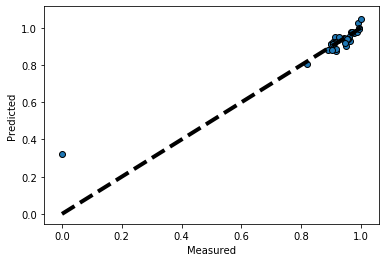

In [597]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Lag Model

In [598]:
camera_acc_week5 = camera_acc_week1.copy()
gaming_acc_week5 = gaming_acc_week1.copy()
Home_audio_week5 = Home_audio_week1.copy()

In [599]:
camera_acc_week5.shape

(51, 86)

In [600]:
camera_acc_week1.shape

(51, 86)

In [601]:
def lag_variables(df,var,n):
    for i in var:
        loc_index = df.columns.get_loc(i) + 1
        df.insert(loc=loc_index,column= i+'_lag'+np.str(n),value=df[i].shift(n))
    return df

In [602]:
GMV_Lag = ['gmv']

In [603]:
camera_acc_week5_a = camera_acc_week5.columns
gaming_acc_week5_a = gaming_acc_week5.columns
Home_audio_week5_a = Home_audio_week5.columns

In [604]:
# 3 weak lag
camera_acc_week5 = lag_variables(camera_acc_week5,camera_acc_week5_a,3)
gaming_acc_week5 = lag_variables(gaming_acc_week5,gaming_acc_week5_a,3)
Home_audio_week5 = lag_variables(Home_audio_week5,Home_audio_week5_a,3)

In [605]:
# 2 weak lag
camera_acc_week5 = lag_variables(camera_acc_week5,camera_acc_week5_a,2)
gaming_acc_week5 = lag_variables(gaming_acc_week5,gaming_acc_week5_a,2)
Home_audio_week5 = lag_variables(Home_audio_week5,Home_audio_week5_a,2)

In [606]:
# 1 weak lag
camera_acc_week5 = lag_variables(camera_acc_week5,camera_acc_week5_a,1)
gaming_acc_week5 = lag_variables(gaming_acc_week5,gaming_acc_week5_a,1)
Home_audio_week5 = lag_variables(Home_audio_week5,Home_audio_week5_a,1)

In [607]:
# Imputing all null values with 0
camera_acc_week5.fillna(value=0, inplace=True)
gaming_acc_week5.fillna(value=0, inplace=True)
Home_audio_week5.fillna(value=0, inplace=True)
camera_acc_week5.head(8)

,gmv,gmv_lag1,gmv_lag2,gmv_lag3,discount,discount_lag1,discount_lag2,discount_lag3,sla,sla_lag1,...,Total Snow (cm)_lag2,Total Snow (cm)_lag3,Total Precip (mm),Total Precip (mm)_lag1,Total Precip (mm)_lag2,Total Precip (mm)_lag3,Snow on Grnd (cm),Snow on Grnd (cm)_lag1,Snow on Grnd (cm)_lag2,Snow on Grnd (cm)_lag3
26,3714313.00,0.00,0.00,0.00,45.46,0.00,0.00,0.00,6.94,0.00,...,0.00,0.00,4.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00
27,4209375.00,3714313.00,0.00,0.00,45.81,45.46,0.00,0.00,6.36,6.94,...,0.00,0.00,1.40,4.42,0.00,0.00,0.00,0.00,0.00,0.00
28,4154406.00,4209375.00,3714313.00,0.00,45.14,45.81,45.46,0.00,6.40,6.36,...,0.00,0.00,1.08,1.40,4.42,0.00,0.00,0.00,0.00,0.00
29,2694778.00,4154406.00,4209375.00,3714313.00,44.53,45.14,45.81,45.46,6.36,6.40,...,0.00,0.00,4.63,1.08,1.40,4.42,0.00,0.00,0.00,0.00
30,699.00,2694778.00,4154406.00,4209375.00,51.79,44.53,45.14,45.81,5.00,6.36,...,0.00,0.00,0.35,4.63,1.08,1.40,0.00,0.00,0.00,0.00
31,299.00,699.00,2694778.00,4154406.00,84.97,51.79,44.53,45.14,6.00,5.00,...,0.00,0.00,2.90,0.35,4.63,1.08,0.00,0.00,0.00,0.00
32,1190.00,299.00,699.00,2694778.00,40.96,84.97,51.79,44.53,9.33,6.00,...,0.00,0.00,0.00,2.90,0.35,4.63,0.00,0.00,0.00,0.00
33,3594458.00,1190.00,299.00,699.00,45.44,40.96,84.97,51.79,6.54,9.33,...,0.00,0.00,12.12,0.00,2.90,0.35,0.00,0.00,0.00,0.00


#### Camera Accessory (Lag Additive)

In [608]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(camera_acc_week5, train_size = 0.7, test_size = 0.3, random_state = 100)

In [609]:
scaler = MinMaxScaler()

In [610]:
num_vars_a=camera_acc_week5.columns

In [611]:
df_train[num_vars_a] = scaler.fit_transform(df_train[num_vars_a])
df_test[num_vars_a] = scaler.fit_transform(df_test[num_vars_a])

In [612]:
y_train = df_train.pop('gmv')
X_train = df_train

In [613]:
# Running RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20) 
rfe = rfe.fit(X_train, y_train)

In [614]:
col = X_train.columns[rfe.support_]
col

Index(['payday_flag', 'product_mrp', 'holiday_flag_lag3',
       'product_vertical_CameraBag', 'product_vertical_CameraBag_lag2',
       'product_vertical_CameraBatteryCharger',
       'product_vertical_CameraTripod', 'product_vertical_ExtensionTube_lag3',
       'product_vertical_Filter', 'product_vertical_Filter_lag3',
       'product_vertical_Flash', 'product_vertical_Flash_lag1',
       'product_vertical_Lens', 'product_vertical_Softbox_lag3',
       'product_vertical_Strap_lag1', 'product_vertical_Strap_lag2',
       'product_vertical_Telescope', 'mass_market_true', 'Mean Temp_lag1',
       'Total Snow (cm)_lag2'],
      dtype='object')

In [615]:
X_train.columns[~rfe.support_]

Index(['gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'discount', 'discount_lag1',
       'discount_lag2', 'discount_lag3', 'sla', 'sla_lag1', 'sla_lag2',
       ...
       'Total Snow (cm)_lag1', 'Total Snow (cm)_lag3', 'Total Precip (mm)',
       'Total Precip (mm)_lag1', 'Total Precip (mm)_lag2',
       'Total Precip (mm)_lag3', 'Snow on Grnd (cm)', 'Snow on Grnd (cm)_lag1',
       'Snow on Grnd (cm)_lag2', 'Snow on Grnd (cm)_lag3'],
      dtype='object', length=323)

In [616]:
X_train_rfe = X_train[col]

In [617]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1326.
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.30e-19
Time:                        21:09:55   Log-Likelihood:                 146.90
No. Observations:                  35   AIC:                            -251.8
Df Residuals:                      14   BIC:                            -219.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [618]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,mass_market_true,320.44
0,const,118.62
11,product_vertical_Flash,66.75
13,product_vertical_Lens,57.85
9,product_vertical_Filter,52.05
4,product_vertical_CameraBag,46.23
7,product_vertical_CameraTripod,28.70
6,product_vertical_CameraBatteryCharger,21.79
17,product_vertical_Telescope,16.46
1,payday_flag,9.90


In [619]:
X_train_rfe =X_train_rfe.drop(["mass_market_true"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_Flash"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_Lens"], axis = 1)

In [620]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     158.9
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.22e-15
Time:                        21:09:55   Log-Likelihood:                 103.63
No. Observations:                  35   AIC:                            -171.3
Df Residuals:                      17   BIC:                            -143.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [621]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,94.49
4,product_vertical_CameraBag,36.42
9,product_vertical_Filter,18.37
6,product_vertical_CameraBatteryCharger,11.67
7,product_vertical_CameraTripod,10.39
15,product_vertical_Telescope,10.29
14,product_vertical_Strap_lag2,8.36
1,payday_flag,6.81
13,product_vertical_Strap_lag1,6.46
11,product_vertical_Flash_lag1,5.85


In [622]:
X_train_rfe =X_train_rfe.drop(["payday_flag"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraBag"], axis = 1)

In [623]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     170.9
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           5.11e-17
Time:                        21:09:55   Log-Likelihood:                 100.79
No. Observations:                  35   AIC:                            -169.6
Df Residuals:                      19   BIC:                            -144.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [624]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,90.18
5,product_vertical_CameraTripod,10.36
7,product_vertical_Filter,8.72
13,product_vertical_Telescope,8.14
12,product_vertical_Strap_lag2,7.90
4,product_vertical_CameraBatteryCharger,6.42
11,product_vertical_Strap_lag1,6.10
9,product_vertical_Flash_lag1,5.38
6,product_vertical_ExtensionTube_lag3,3.37
10,product_vertical_Softbox_lag3,3.18


In [625]:
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraTripod"], axis = 1)

In [626]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     162.8
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.89e-17
Time:                        21:09:55   Log-Likelihood:                 97.861
No. Observations:                  35   AIC:                            -165.7
Df Residuals:                      20   BIC:                            -142.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [627]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,90.08
11,product_vertical_Strap_lag2,7.87
12,product_vertical_Telescope,7.40
4,product_vertical_CameraBatteryCharger,5.92
10,product_vertical_Strap_lag1,5.63
8,product_vertical_Flash_lag1,5.36
9,product_vertical_Softbox_lag3,3.13
2,holiday_flag_lag3,2.63
13,Mean Temp_lag1,2.63
1,product_mrp,2.58


In [628]:
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraBag_lag2"], axis = 1)
X_train_rfe =X_train_rfe.drop(["holiday_flag_lag3"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Total Snow (cm)_lag2"], axis = 1)

In [629]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     162.7
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           4.27e-19
Time:                        21:09:55   Log-Likelihood:                 91.257
No. Observations:                  35   AIC:                            -158.5
Df Residuals:                      23   BIC:                            -139.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [630]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.89
8,product_vertical_Strap_lag1,5.62
6,product_vertical_Flash_lag1,5.04
9,product_vertical_Strap_lag2,5.02
10,product_vertical_Telescope,4.83
2,product_vertical_CameraBatteryCharger,4.18
1,product_mrp,2.45
3,product_vertical_ExtensionTube_lag3,2.34
11,Mean Temp_lag1,2.27
7,product_vertical_Softbox_lag3,2.19


In [631]:
X_train_rfe =X_train_rfe.drop(["product_vertical_Flash_lag1"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_Strap_lag1"], axis = 1)

In [632]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     163.4
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           6.12e-20
Time:                        21:09:55   Log-Likelihood:                 86.430
No. Observations:                  35   AIC:                            -152.9
Df Residuals:                      25   BIC:                            -137.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [633]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,72.75
8,product_vertical_Telescope,4.31
7,product_vertical_Strap_lag2,4.08
2,product_vertical_CameraBatteryCharger,3.96
1,product_mrp,2.41
3,product_vertical_ExtensionTube_lag3,2.30
9,Mean Temp_lag1,2.26
6,product_vertical_Softbox_lag3,2.19
4,product_vertical_Filter,1.76
5,product_vertical_Filter_lag3,1.45


In [634]:
X_train_rfe =X_train_rfe.drop(["product_vertical_ExtensionTube_lag3"], axis = 1)

In [635]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     146.0
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.31e-19
Time:                        21:09:55   Log-Likelihood:                 81.799
No. Observations:                  35   AIC:                            -145.6
Df Residuals:                      26   BIC:                            -131.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [636]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,58.82
7,product_vertical_Telescope,4.08
2,product_vertical_CameraBatteryCharger,3.78
6,product_vertical_Strap_lag2,3.68
5,product_vertical_Softbox_lag3,2.17
1,product_mrp,1.90
8,Mean Temp_lag1,1.68
3,product_vertical_Filter,1.67
4,product_vertical_Filter_lag3,1.37


In [637]:
X_train_rfe =X_train_rfe.drop(["product_vertical_Strap_lag2"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_Telescope"], axis = 1)

In [638]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.21e-19
Time:                        21:09:56   Log-Likelihood:                 75.181
No. Observations:                  35   AIC:                            -136.4
Df Residuals:                      28   BIC:                            -125.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [639]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,28.44
2,product_vertical_CameraBatteryCharger,1.75
3,product_vertical_Filter,1.62
1,product_mrp,1.28
6,Mean Temp_lag1,1.23
5,product_vertical_Softbox_lag3,1.16
4,product_vertical_Filter_lag3,1.15


In [640]:
X_train_rfe =X_train_rfe.drop(["product_vertical_Filter_lag3"], axis = 1)

In [641]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     161.9
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.93e-20
Time:                        21:09:56   Log-Likelihood:                 73.699
No. Observations:                  35   AIC:                            -135.4
Df Residuals:                      29   BIC:                            -126.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [642]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.96
2,product_vertical_CameraBatteryCharger,1.71
3,product_vertical_Filter,1.58
1,product_mrp,1.21
4,product_vertical_Softbox_lag3,1.16
5,Mean Temp_lag1,1.10


In [643]:
X_train_rfe.columns

Index(['product_mrp', 'product_vertical_CameraBatteryCharger',
       'product_vertical_Filter', 'product_vertical_Softbox_lag3',
       'Mean Temp_lag1'],
      dtype='object')

In [644]:
drop_columns_list = list(set(num_vars_a) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['Min Temp_lag1', 'gmv_lag2', 'product_vertical_Teleconverter_lag1', 'Affiliates_lag2', 'Radio_lag2', 'product_vertical_ReflectorUmbrella_lag3', 'Affiliates_ADS_lag1', 'Total Rain (mm)_lag2', 'Content Marketing_SMA_5_lag2', 'Content Marketing_lag3', 'Sponsorship_SMA_3', 'Digital_SMA_5_lag2', 'NPS_SMA_5_lag2', 'Total Investment_SMA_3_lag2', 'Digital_SMA_3_lag3', 'Stock Index_SMA_3_lag3', 'product_vertical_CameraBag_lag3', 'Digital_SMA_3_lag1', 'Total Investment_lag2', 'Content Marketing_lag1', 'Content Marketing_SMA_3', 'Affiliates_SMA_5_lag3', 'product_vertical_Telescope_lag2', 'Total Precip (mm)_lag3', 'Stock Index_SMA_3_lag1', 'Content_Marketing_ADS_lag2', 'Min Temp', 'product_vertical_CameraFilmRolls', 'NPS_SMA_5_lag3', 'Sponsorship_SMA_3_lag2', 'Online marketing_SMA_3_lag1', 'Sponsorship_lag3', 'Online marketing_SMA_5_lag2', 'product_vertical_ExtensionTube_lag3', 'pay_week_lag1', 'holiday_flag', 'Sponsorship_SMA_5_lag2', 'Digital_ADS_lag2', 'product_vertical_Filter_lag1', 'Digital_

In [645]:

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([ 0.25715445,  0.97530327,  0.80004404,  0.96071518,  0.92277834,
        0.81541204, -4.00584856,  0.85928333,  0.97481723, -1.17888776])

In [646]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [647]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print(mse) 
print(r_squared)

0.0019077576379306824
0.9239700744636963


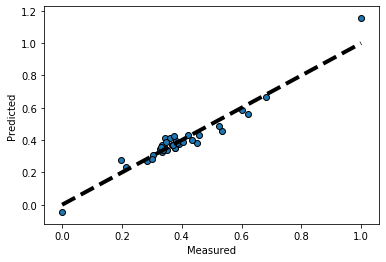

In [648]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Game Accessory (Lag Additive)

In [649]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(gaming_acc_week5, train_size = 0.7, test_size = 0.3, random_state = 100)

In [650]:
scaler = MinMaxScaler()

In [651]:
num_vars_b=gaming_acc_week5.columns

In [652]:
df_train[num_vars_b] = scaler.fit_transform(df_train[num_vars_b])
df_test[num_vars_b] = scaler.fit_transform(df_test[num_vars_b])

In [653]:
y_train = df_train.pop('gmv')
X_train = df_train

In [654]:
# Running RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)  
rfe = rfe.fit(X_train, y_train)

In [655]:
col = X_train.columns[rfe.support_]
col

Index(['product_procurement_sla', 'mass_market_true',
       'product_vertical_GamePad', 'product_vertical_GamingAccessoryKit',
       'product_vertical_GamingAdapter',
       'product_vertical_GamingChargingStation_lag1',
       'product_vertical_GamingHeadset', 'product_vertical_GamingKeyboard',
       'product_vertical_GamingMemoryCard',
       'product_vertical_GamingMemoryCard_lag2',
       'product_vertical_GamingMouse', 'product_vertical_GamingMousePad',
       'product_vertical_GamingSpeaker',
       'product_vertical_JoystickGamingWheel',
       'product_vertical_JoystickGamingWheel_lag1',
       'product_vertical_JoystickGamingWheel_lag3',
       'product_vertical_TVOutCableAccessory', 'payd_week_lag1',
       'Heat Deg Days_lag3', 'Total Precip (mm)_lag3'],
      dtype='object')

In [656]:
# delete features not selected by rfe
X_train.columns[~rfe.support_]

Index(['gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'discount', 'discount_lag1',
       'discount_lag2', 'discount_lag3', 'sla', 'sla_lag1', 'sla_lag2',
       ...
       'Total Snow (cm)_lag1', 'Total Snow (cm)_lag2', 'Total Snow (cm)_lag3',
       'Total Precip (mm)', 'Total Precip (mm)_lag1', 'Total Precip (mm)_lag2',
       'Snow on Grnd (cm)', 'Snow on Grnd (cm)_lag1', 'Snow on Grnd (cm)_lag2',
       'Snow on Grnd (cm)_lag3'],
      dtype='object', length=291)

In [657]:
X_train_rfe = X_train[col]

In [658]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     224.8
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           4.24e-15
Time:                        21:09:57   Log-Likelihood:                 112.45
No. Observations:                  36   AIC:                            -182.9
Df Residuals:                      15   BIC:                            -149.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [659]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,mass_market_true,7957.15
7,product_vertical_GamingHeadset,1384.11
11,product_vertical_GamingMouse,1114.68
3,product_vertical_GamePad,337.50
0,const,50.62
9,product_vertical_GamingMemoryCard,47.02
12,product_vertical_GamingMousePad,45.42
14,product_vertical_JoystickGamingWheel,20.87
10,product_vertical_GamingMemoryCard_lag2,15.49
15,product_vertical_JoystickGamingWheel_lag1,12.87


In [660]:
X_train_rfe =X_train_rfe.drop(["mass_market_true"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingHeadset"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingMouse"], axis = 1)

In [661]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     35.90
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.80e-10
Time:                        21:09:57   Log-Likelihood:                 73.687
No. Observations:                  36   AIC:                            -111.4
Df Residuals:                      18   BIC:                            -82.87
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [662]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.78
11,product_vertical_JoystickGamingWheel,16.48
9,product_vertical_GamingMousePad,11.93
12,product_vertical_JoystickGamingWheel_lag1,10.79
6,product_vertical_GamingKeyboard,9.69
3,product_vertical_GamingAccessoryKit,8.81
8,product_vertical_GamingMemoryCard_lag2,8.01
2,product_vertical_GamePad,6.74
13,product_vertical_JoystickGamingWheel_lag3,6.62
4,product_vertical_GamingAdapter,5.97


In [663]:
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingMousePad"], axis = 1)
X_train_rfe =X_train_rfe.drop(["payd_week_lag1"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingChargingStation_lag1"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingSpeaker"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingAdapter"], axis = 1)

In [664]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     57.44
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           3.21e-14
Time:                        21:09:57   Log-Likelihood:                 71.532
No. Observations:                  36   AIC:                            -117.1
Df Residuals:                      23   BIC:                            -96.48
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [665]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,34.15
7,product_vertical_JoystickGamingWheel,7.60
8,product_vertical_JoystickGamingWheel_lag1,7.09
2,product_vertical_GamePad,5.29
5,product_vertical_GamingMemoryCard,4.90
9,product_vertical_JoystickGamingWheel_lag3,4.38
3,product_vertical_GamingAccessoryKit,4.22
11,Heat Deg Days_lag3,3.19
4,product_vertical_GamingKeyboard,3.12
6,product_vertical_GamingMemoryCard_lag2,3.12


In [666]:
X_train_rfe =X_train_rfe.drop(["product_vertical_JoystickGamingWheel_lag3"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_procurement_sla"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_TVOutCableAccessory"], axis = 1)

In [667]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     75.28
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.51e-16
Time:                        21:09:57   Log-Likelihood:                 69.103
No. Observations:                  36   AIC:                            -118.2
Df Residuals:                      26   BIC:                            -102.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [668]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.61
6,product_vertical_JoystickGamingWheel,7.34
7,product_vertical_JoystickGamingWheel_lag1,5.30
1,product_vertical_GamePad,4.66
4,product_vertical_GamingMemoryCard,4.03
2,product_vertical_GamingAccessoryKit,3.04
8,Heat Deg Days_lag3,2.54
5,product_vertical_GamingMemoryCard_lag2,2.44
3,product_vertical_GamingKeyboard,2.22
9,Total Precip (mm)_lag3,1.39


In [669]:
X_train_rfe =X_train_rfe.drop(["product_vertical_JoystickGamingWheel_lag1"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Heat Deg Days_lag3"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Total Precip (mm)_lag3"], axis = 1)

In [670]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     106.4
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.10e-18
Time:                        21:09:57   Log-Likelihood:                 66.190
No. Observations:                  36   AIC:                            -118.4
Df Residuals:                      29   BIC:                            -107.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [671]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.46
1,product_vertical_GamePad,3.87
2,product_vertical_GamingAccessoryKit,2.87
4,product_vertical_GamingMemoryCard,2.48
3,product_vertical_GamingKeyboard,2.21
5,product_vertical_GamingMemoryCard_lag2,2.17
6,product_vertical_JoystickGamingWheel,1.49


In [672]:
X_train_rfe.columns

Index(['product_vertical_GamePad', 'product_vertical_GamingAccessoryKit',
       'product_vertical_GamingKeyboard', 'product_vertical_GamingMemoryCard',
       'product_vertical_GamingMemoryCard_lag2',
       'product_vertical_JoystickGamingWheel'],
      dtype='object')

In [673]:
drop_columns_list = list(set(num_vars_b) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['Min Temp_lag1', 'gmv_lag2', 'Affiliates_lag2', 'Radio_lag2', 'product_vertical_JoystickGamingWheel_lag1', 'Affiliates_ADS_lag1', 'Mean Temp_lag1', 'Total Rain (mm)_lag2', 'Content Marketing_SMA_5_lag2', 'Content Marketing_lag3', 'Sponsorship_SMA_3', 'Digital_SMA_5_lag2', 'NPS_SMA_5_lag2', 'Total Investment_SMA_3_lag2', 'Digital_SMA_3_lag3', 'Stock Index_SMA_3_lag3', 'Digital_SMA_3_lag1', 'Total Investment_lag2', 'Content Marketing_lag1', 'Content Marketing_SMA_3', 'Affiliates_SMA_5_lag3', 'product_vertical_GamingMouse', 'Total Precip (mm)_lag3', 'Stock Index_SMA_3_lag1', 'Content_Marketing_ADS_lag2', 'Min Temp', 'Sponsorship_SMA_3_lag2', 'NPS_SMA_5_lag3', 'Online marketing_SMA_3_lag1', 'Sponsorship_lag3', 'Online marketing_SMA_5_lag2', 'holiday_flag', 'Sponsorship_SMA_5_lag2', 'Digital_ADS_lag2', 'payd_week_lag3', 'Digital_lag3', 'Radio_SMA_5_lag1', 'Digital_lag2', 'Digital_ADS', 'TV_ADS_lag2', 'Online marketing', 'NPS_SMA_5_lag1', 'SEM_ADS_lag1', 'Total Investment_SMA_3', 'product_v

In [674]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([0.89746076, 0.96169345, 0.44390235, 0.76747498, 0.74220578,
       0.94362116, 0.40939624, 0.83100087, 0.98982336, 0.88256763])

In [675]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [676]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print(mse) 
print(r_squared)

0.0032106047031035295
0.905802824946027


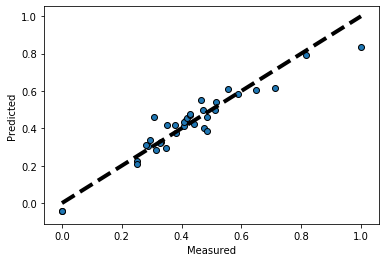

In [677]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Home Audio (Lag Additive)

In [678]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(Home_audio_week5, train_size = 0.7, test_size = 0.3, random_state = 100)

In [679]:
scaler = MinMaxScaler()

In [680]:
num_vars_c=Home_audio_week5.columns

In [681]:
df_train[num_vars_c] = scaler.fit_transform(df_train[num_vars_c])
df_test[num_vars_c] = scaler.fit_transform(df_test[num_vars_c])

In [682]:
y_train = df_train.pop('gmv')
X_train = df_train

In [683]:
# Running RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)  
rfe = rfe.fit(X_train, y_train)

In [684]:
col = X_train.columns[rfe.support_]
col

Index(['discount_lag1', 'holiday_flag_lag3', 'mass_market_true',
       'product_vertical_Dock_lag3', 'product_vertical_FMRadio',
       'product_vertical_FMRadio_lag1', 'product_vertical_HiFiSystem',
       'product_vertical_HiFiSystem_lag3', 'product_vertical_HomeAudioSpeaker',
       'product_mrp', 'product_mrp_lag1', 'product_vertical_SoundMixer',
       'holiday_week', 'Max Temp_lag1', 'Max Temp_lag2', 'Mean Temp',
       'Heat Deg Days', 'Total Rain (mm)_lag1', 'Total Snow (cm)_lag2',
       'Snow on Grnd (cm)'],
      dtype='object')

In [685]:
# delete features not selected by rfe
X_train.columns[~rfe.support_]

Index(['gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'discount', 'discount_lag2',
       'discount_lag3', 'holiday_flag', 'holiday_flag_lag1',
       'holiday_flag_lag2', 'sla',
       ...
       'Total Snow (cm)', 'Total Snow (cm)_lag1', 'Total Snow (cm)_lag3',
       'Total Precip (mm)', 'Total Precip (mm)_lag1', 'Total Precip (mm)_lag2',
       'Total Precip (mm)_lag3', 'Snow on Grnd (cm)_lag1',
       'Snow on Grnd (cm)_lag2', 'Snow on Grnd (cm)_lag3'],
      dtype='object', length=259)

In [686]:
X_train_rfe = X_train[col]

In [687]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     880.2
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           3.33e-17
Time:                        21:09:59   Log-Likelihood:                 126.91
No. Observations:                  34   AIC:                            -211.8
Df Residuals:                      13   BIC:                            -179.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [688]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,215.11
9,product_vertical_HomeAudioSpeaker,96.84
3,mass_market_true,58.03
14,Max Temp_lag1,37.36
16,Mean Temp,24.71
10,product_mrp,14.38
5,product_vertical_FMRadio,12.31
17,Heat Deg Days,11.78
8,product_vertical_HiFiSystem_lag3,8.49
4,product_vertical_Dock_lag3,8.34


In [689]:
X_train_rfe =X_train_rfe.drop(["mass_market_true"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Max Temp_lag1"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_HomeAudioSpeaker"], axis = 1)

In [690]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     43.59
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           3.17e-10
Time:                        21:09:59   Log-Likelihood:                 69.875
No. Observations:                  34   AIC:                            -103.7
Df Residuals:                      16   BIC:                            -76.27
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [691]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,91.09
3,product_vertical_Dock_lag3,7.85
7,product_vertical_HiFiSystem_lag3,6.97
13,Mean Temp,6.19
14,Heat Deg Days,5.53
12,Max Temp_lag2,5.47
1,discount_lag1,4.84
9,product_mrp_lag1,4.80
4,product_vertical_FMRadio,4.27
15,Total Rain (mm)_lag1,4.02


In [692]:
X_train_rfe =X_train_rfe.drop(["holiday_flag_lag3"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_SoundMixer"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Total Rain (mm)_lag1"], axis = 1)

In [693]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     60.28
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.02e-12
Time:                        21:09:59   Log-Likelihood:                 69.181
No. Observations:                  34   AIC:                            -108.4
Df Residuals:                      19   BIC:                            -85.47
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [694]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.39
2,product_vertical_Dock_lag3,6.50
6,product_vertical_HiFiSystem_lag3,6.05
1,discount_lag1,4.75
11,Mean Temp,4.75
8,product_mrp_lag1,3.92
10,Max Temp_lag2,3.66
3,product_vertical_FMRadio,3.22
5,product_vertical_HiFiSystem,2.60
12,Heat Deg Days,2.05


In [695]:
X_train_rfe =X_train_rfe.drop(["product_vertical_Dock_lag3"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_HiFiSystem_lag3"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Max Temp_lag2"], axis = 1)

In [696]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     75.78
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           7.25e-15
Time:                        21:09:59   Log-Likelihood:                 66.542
No. Observations:                  34   AIC:                            -109.1
Df Residuals:                      22   BIC:                            -90.77
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [697]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,37.66
1,discount_lag1,4.63
6,product_mrp_lag1,3.85
2,product_vertical_FMRadio,3.05
8,Mean Temp,2.64
4,product_vertical_HiFiSystem,2.44
9,Heat Deg Days,1.61
3,product_vertical_FMRadio_lag1,1.57
5,product_mrp,1.56
10,Total Snow (cm)_lag2,1.37


In [698]:
X_train_rfe =X_train_rfe.drop(["Heat Deg Days"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_FMRadio_lag1"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_HiFiSystem"], axis = 1)

In [699]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     67.70
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           5.10e-15
Time:                        21:09:59   Log-Likelihood:                 57.364
No. Observations:                  34   AIC:                            -96.73
Df Residuals:                      25   BIC:                            -82.99
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [700]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,34.99
1,discount_lag1,4.47
4,product_mrp_lag1,3.56
6,Mean Temp,2.13
3,product_mrp,1.46
2,product_vertical_FMRadio,1.34
7,Total Snow (cm)_lag2,1.31
5,holiday_week,1.23
8,Snow on Grnd (cm),1.05


In [701]:
X_train_rfe =X_train_rfe.drop(["product_mrp_lag1"], axis = 1)
X_train_rfe =X_train_rfe.drop(["holiday_week"], axis = 1)

In [702]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     69.24
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           4.02e-15
Time:                        21:09:59   Log-Likelihood:                 51.849
No. Observations:                  34   AIC:                            -89.70
Df Residuals:                      27   BIC:                            -79.01
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [703]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.19
4,Mean Temp,2.08
1,discount_lag1,2.02
3,product_mrp,1.36
2,product_vertical_FMRadio,1.17
5,Total Snow (cm)_lag2,1.17
6,Snow on Grnd (cm),1.04


In [704]:
X_train_rfe =X_train_rfe.drop(["discount_lag1"], axis = 1)

In [705]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     79.81
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.11e-15
Time:                        21:09:59   Log-Likelihood:                 50.629
No. Observations:                  34   AIC:                            -89.26
Df Residuals:                      28   BIC:                            -80.10
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [706]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.34
2,product_mrp,1.30
3,Mean Temp,1.30
1,product_vertical_FMRadio,1.17
4,Total Snow (cm)_lag2,1.17
5,Snow on Grnd (cm),1.02


In [707]:
X_train_rfe.columns

Index(['product_vertical_FMRadio', 'product_mrp', 'Mean Temp',
       'Total Snow (cm)_lag2', 'Snow on Grnd (cm)'],
      dtype='object')

In [708]:
drop_columns_list = list(set(num_vars_c) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['Min Temp_lag1', 'gmv_lag2', 'product_vertical_HomeAudioSpeaker', 'Affiliates_lag2', 'Radio_lag2', 'product_vertical_FMRadio_lag3', 'Affiliates_ADS_lag1', 'Mean Temp_lag1', 'Total Rain (mm)_lag2', 'Content Marketing_SMA_5_lag2', 'Content Marketing_lag3', 'Sponsorship_SMA_3', 'Digital_SMA_5_lag2', 'NPS_SMA_5_lag2', 'Total Investment_SMA_3_lag2', 'Digital_SMA_3_lag3', 'Stock Index_SMA_3_lag3', 'Digital_SMA_3_lag1', 'product_vertical_Dock_lag1', 'Total Investment_lag2', 'Content Marketing_lag1', 'Content Marketing_SMA_3', 'Affiliates_SMA_5_lag3', 'Total Precip (mm)_lag3', 'Stock Index_SMA_3_lag1', 'Content_Marketing_ADS_lag2', 'Min Temp', 'Sponsorship_SMA_3_lag2', 'NPS_SMA_5_lag3', 'Online marketing_SMA_3_lag1', 'Sponsorship_lag3', 'product_vertical_HiFiSystem_lag1', 'Online marketing_SMA_5_lag2', 'holiday_flag', 'pay_week_lag1', 'product_vertical_SoundMixer_lag3', 'Sponsorship_SMA_5_lag2', 'Digital_ADS_lag2', 'Digital_lag3', 'Radio_SMA_5_lag1', 'Digital_lag2', 'Digital_ADS', 'TV_ADS_lag

In [709]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([0.82587918, 0.64246922, 0.54785888, 0.97099072, 0.70283663,
       0.96317969, 0.01665271, 0.85411947, 0.74018269, 0.96627808])

In [710]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [711]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print(mse) 
print(r_squared)

0.007426404452987408
0.8365617646913494


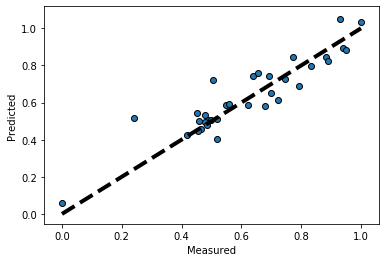

In [712]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Lag Model (Multiplicative)

In [713]:
camera_acc_week7 = camera_acc_week1.copy()
gaming_acc_week7 = gaming_acc_week1.copy()
Home_audio_week7 = Home_audio_week1.copy()

In [714]:
camera_acc_week7.shape

(51, 86)

In [715]:
camera_acc_week1.shape

(51, 86)

In [716]:
camera_acc_week7_col = camera_acc_week7.columns
gaming_acc_week7_col = gaming_acc_week7.columns
Home_audio_week7_col = Home_audio_week7.columns

In [717]:
# lag of 3 weeks
camera_acc_week7 = lag_variables(camera_acc_week7,camera_acc_week7_col,3)
gaming_acc_week7 = lag_variables(gaming_acc_week7,gaming_acc_week7_col,3)
Home_audio_week7 = lag_variables(Home_audio_week7,Home_audio_week7_col,3)

In [718]:
# lag of 2 weeks
camera_acc_week7 = lag_variables(camera_acc_week7,camera_acc_week7_col,2)
gaming_acc_week7 = lag_variables(gaming_acc_week7,gaming_acc_week7_col,2)
Home_audio_week7 = lag_variables(Home_audio_week7,Home_audio_week7_col,2)

In [719]:
# lag of 1 weeks
camera_acc_week7 = lag_variables(camera_acc_week7,camera_acc_week7_col,1)
gaming_acc_week7 = lag_variables(gaming_acc_week7,gaming_acc_week7_col,1)
Home_audio_week7 = lag_variables(Home_audio_week7,Home_audio_week7_col,1)

In [720]:
# Imput 0
camera_acc_week7.fillna(value=0, inplace=True)
gaming_acc_week7.fillna(value=0, inplace=True)
Home_audio_week7.fillna(value=0, inplace=True)
camera_acc_week7.head(8)

,gmv,gmv_lag1,gmv_lag2,gmv_lag3,discount,discount_lag1,discount_lag2,discount_lag3,sla,sla_lag1,...,Total Snow (cm)_lag2,Total Snow (cm)_lag3,Total Precip (mm),Total Precip (mm)_lag1,Total Precip (mm)_lag2,Total Precip (mm)_lag3,Snow on Grnd (cm),Snow on Grnd (cm)_lag1,Snow on Grnd (cm)_lag2,Snow on Grnd (cm)_lag3
26,3714313.00,0.00,0.00,0.00,45.46,0.00,0.00,0.00,6.94,0.00,...,0.00,0.00,4.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00
27,4209375.00,3714313.00,0.00,0.00,45.81,45.46,0.00,0.00,6.36,6.94,...,0.00,0.00,1.40,4.42,0.00,0.00,0.00,0.00,0.00,0.00
28,4154406.00,4209375.00,3714313.00,0.00,45.14,45.81,45.46,0.00,6.40,6.36,...,0.00,0.00,1.08,1.40,4.42,0.00,0.00,0.00,0.00,0.00
29,2694778.00,4154406.00,4209375.00,3714313.00,44.53,45.14,45.81,45.46,6.36,6.40,...,0.00,0.00,4.63,1.08,1.40,4.42,0.00,0.00,0.00,0.00
30,699.00,2694778.00,4154406.00,4209375.00,51.79,44.53,45.14,45.81,5.00,6.36,...,0.00,0.00,0.35,4.63,1.08,1.40,0.00,0.00,0.00,0.00
31,299.00,699.00,2694778.00,4154406.00,84.97,51.79,44.53,45.14,6.00,5.00,...,0.00,0.00,2.90,0.35,4.63,1.08,0.00,0.00,0.00,0.00
32,1190.00,299.00,699.00,2694778.00,40.96,84.97,51.79,44.53,9.33,6.00,...,0.00,0.00,0.00,2.90,0.35,4.63,0.00,0.00,0.00,0.00
33,3594458.00,1190.00,299.00,699.00,45.44,40.96,84.97,51.79,6.54,9.33,...,0.00,0.00,12.12,0.00,2.90,0.35,0.00,0.00,0.00,0.00


In [721]:
# Taking Log

camera_acc_week7 = camera_acc_week7.applymap(lambda x: np.log(x))
camera_acc_week7 = camera_acc_week7.replace([np.inf, -np.inf], 0)
camera_acc_week7 = camera_acc_week7.replace(np.nan, 0)

gaming_acc_week7 = gaming_acc_week7.applymap(lambda x: np.log(x))
gaming_acc_week7 = gaming_acc_week7.replace([np.inf, -np.inf], 0)
gaming_acc_week7 = gaming_acc_week7.replace(np.nan, 0)

Home_audio_week7 = Home_audio_week7.applymap(lambda x: np.log(x))
Home_audio_week7 = Home_audio_week7.replace([np.inf, -np.inf], 0)
Home_audio_week7 = Home_audio_week7.replace(np.nan, 0)

 #### Camera Accessory (Lag Multiplicative)

In [722]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(camera_acc_week7, train_size = 0.7, test_size = 0.3, random_state = 100)

In [723]:
scaler = MinMaxScaler()

In [724]:
num_vars_x =camera_acc_week7.columns

In [725]:
df_train[num_vars_x] = scaler.fit_transform(df_train[num_vars_x])
df_test[num_vars_x] = scaler.fit_transform(df_test[num_vars_x])

In [726]:
y_train = df_train.pop('gmv')
X_train = df_train

In [727]:
# Run RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)  
rfe = rfe.fit(X_train, y_train)

In [728]:
col = X_train.columns[rfe.support_]
col

Index(['sla', 'product_mrp', 'product_mrp_lag2',
       'product_vertical_CameraAccessory', 'product_vertical_CameraBag',
       'product_vertical_CameraBattery',
       'product_vertical_CameraBatteryCharger',
       'product_vertical_CameraBatteryGrip',
       'product_vertical_CameraBatteryGrip_lag3',
       'product_vertical_CameraFilmRolls_lag3',
       'product_vertical_CameraMicrophone_lag2',
       'product_vertical_CameraMount', 'product_vertical_CameraMount_lag3',
       'product_vertical_Filter', 'product_vertical_Flash',
       'product_vertical_Telescope_lag1', 'mass_market_true', 'Cool Deg Days',
       'Total Snow (cm)_lag2', 'Total Precip (mm)_lag3'],
      dtype='object')

In [729]:
X_train.columns[~rfe.support_]

Index(['gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'discount', 'discount_lag1',
       'discount_lag2', 'discount_lag3', 'sla_lag1', 'sla_lag2', 'sla_lag3',
       ...
       'Total Snow (cm)', 'Total Snow (cm)_lag1', 'Total Snow (cm)_lag3',
       'Total Precip (mm)', 'Total Precip (mm)_lag1', 'Total Precip (mm)_lag2',
       'Snow on Grnd (cm)', 'Snow on Grnd (cm)_lag1', 'Snow on Grnd (cm)_lag2',
       'Snow on Grnd (cm)_lag3'],
      dtype='object', length=323)

In [730]:
X_train_rfe = X_train[col]

In [731]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.102e+04
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           4.78e-26
Time:                        21:10:02   Log-Likelihood:                 185.02
No. Observations:                  35   AIC:                            -328.0
Df Residuals:                      14   BIC:                            -295.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [732]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,577.63
17,mass_market_true,521.78
6,product_vertical_CameraBattery,244.34
5,product_vertical_CameraBag,155.98
7,product_vertical_CameraBatteryCharger,91.30
14,product_vertical_Filter,63.48
15,product_vertical_Flash,29.43
13,product_vertical_CameraMount_lag3,19.06
10,product_vertical_CameraFilmRolls_lag3,15.47
4,product_vertical_CameraAccessory,14.72


In [733]:
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraBag"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraBatteryCharger"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraBattery"], axis = 1)

In [734]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3827.
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           4.37e-27
Time:                        21:10:02   Log-Likelihood:                 160.29
No. Observations:                  35   AIC:                            -284.6
Df Residuals:                      17   BIC:                            -256.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [735]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,264.11
14,mass_market_true,54.35
11,product_vertical_Filter,47.57
12,product_vertical_Flash,16.01
10,product_vertical_CameraMount_lag3,15.53
4,product_vertical_CameraAccessory,13.17
7,product_vertical_CameraFilmRolls_lag3,13.15
6,product_vertical_CameraBatteryGrip_lag3,6.74
8,product_vertical_CameraMicrophone_lag2,5.60
2,product_mrp,5.07


In [736]:
X_train_rfe =X_train_rfe.drop(["mass_market_true"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_Filter"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraBatteryGrip"], axis = 1)

In [737]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     45.15
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           4.98e-12
Time:                        21:10:02   Log-Likelihood:                 76.886
No. Observations:                  35   AIC:                            -123.8
Df Residuals:                      20   BIC:                            -100.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [738]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,216.22
9,product_vertical_CameraMount_lag3,12.61
6,product_vertical_CameraFilmRolls_lag3,12.03
10,product_vertical_Flash,8.33
4,product_vertical_CameraAccessory,5.88
5,product_vertical_CameraBatteryGrip_lag3,5.07
1,sla,4.57
7,product_vertical_CameraMicrophone_lag2,4.45
8,product_vertical_CameraMount,3.91
2,product_mrp,3.35


In [739]:
X_train_rfe =X_train_rfe.drop(["Total Snow (cm)_lag2"], axis = 1)
X_train_rfe =X_train_rfe.drop(["sla"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraMount"], axis = 1)

In [740]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     65.83
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.06e-14
Time:                        21:10:02   Log-Likelihood:                 76.822
No. Observations:                  35   AIC:                            -129.6
Df Residuals:                      23   BIC:                            -111.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [741]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,158.57
5,product_vertical_CameraFilmRolls_lag3,9.94
7,product_vertical_CameraMount_lag3,9.28
8,product_vertical_Flash,7.48
3,product_vertical_CameraAccessory,4.22
4,product_vertical_CameraBatteryGrip_lag3,4.04
1,product_mrp,3.09
6,product_vertical_CameraMicrophone_lag2,2.47
10,Cool Deg Days,1.92
11,Total Precip (mm)_lag3,1.81


In [742]:
X_train_rfe =X_train_rfe.drop(["product_vertical_Telescope_lag1"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Total Precip (mm)_lag3"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_CameraFilmRolls_lag3"], axis = 1)

In [743]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     91.25
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           4.78e-17
Time:                        21:10:02   Log-Likelihood:                 74.883
No. Observations:                  35   AIC:                            -131.8
Df Residuals:                      26   BIC:                            -117.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [744]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,122.27
6,product_vertical_CameraMount_lag3,4.59
7,product_vertical_Flash,4.53
3,product_vertical_CameraAccessory,3.92
4,product_vertical_CameraBatteryGrip_lag3,3.26
1,product_mrp,2.32
8,Cool Deg Days,1.74
5,product_vertical_CameraMicrophone_lag2,1.62
2,product_mrp_lag2,1.28


In [745]:
X_train_rfe =X_train_rfe.drop(["Cool Deg Days"], axis = 1)

In [746]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     97.57
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.69e-17
Time:                        21:10:02   Log-Likelihood:                 73.123
No. Observations:                  35   AIC:                            -130.2
Df Residuals:                      27   BIC:                            -117.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [747]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,65.93
6,product_vertical_CameraMount_lag3,4.56
7,product_vertical_Flash,4.18
3,product_vertical_CameraAccessory,3.85
4,product_vertical_CameraBatteryGrip_lag3,2.94
1,product_mrp,2.18
5,product_vertical_CameraMicrophone_lag2,1.38
2,product_mrp_lag2,1.28


In [748]:
X_train_rfe.columns

Index(['product_mrp', 'product_mrp_lag2', 'product_vertical_CameraAccessory',
       'product_vertical_CameraBatteryGrip_lag3',
       'product_vertical_CameraMicrophone_lag2',
       'product_vertical_CameraMount_lag3', 'product_vertical_Flash'],
      dtype='object')

In [749]:
drop_columns_list = list(set(num_vars_x) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['Min Temp_lag1', 'gmv_lag2', 'product_vertical_Teleconverter_lag1', 'Affiliates_lag2', 'Radio_lag2', 'product_vertical_ReflectorUmbrella_lag3', 'Affiliates_ADS_lag1', 'Mean Temp_lag1', 'Total Rain (mm)_lag2', 'Content Marketing_SMA_5_lag2', 'Content Marketing_lag3', 'Sponsorship_SMA_3', 'Digital_SMA_5_lag2', 'NPS_SMA_5_lag2', 'Total Investment_SMA_3_lag2', 'Digital_SMA_3_lag3', 'Stock Index_SMA_3_lag3', 'product_vertical_CameraBag_lag3', 'Digital_SMA_3_lag1', 'Total Investment_lag2', 'Content Marketing_lag1', 'Content Marketing_SMA_3', 'Affiliates_SMA_5_lag3', 'product_vertical_Telescope_lag2', 'Total Precip (mm)_lag3', 'Stock Index_SMA_3_lag1', 'Content_Marketing_ADS_lag2', 'Min Temp', 'product_vertical_CameraFilmRolls', 'NPS_SMA_5_lag3', 'Sponsorship_SMA_3_lag2', 'Online marketing_SMA_3_lag1', 'Sponsorship_lag3', 'Online marketing_SMA_5_lag2', 'product_vertical_ExtensionTube_lag3', 'pay_week_lag1', 'holiday_flag', 'Sponsorship_SMA_5_lag2', 'Digital_ADS_lag2', 'product_vertical_Filte

In [750]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([ -13.91444096,   -2.88965196,   -2.76932896,    0.57149784,
         -0.35789261,   -0.13356268, -106.93530144,    0.51014553,
          0.4525556 ,  -64.0029462 ])

In [751]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [752]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print(mse) 
print(r_squared)

0.008876596747468872
0.6237138168903293


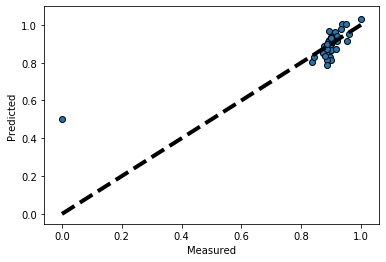

In [753]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

 #### Game Accessory (Lag Multiplicative)

In [754]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(gaming_acc_week7, train_size = 0.7, test_size = 0.3, random_state = 100)

In [755]:
scaler = MinMaxScaler()

In [756]:
num_vars_y =gaming_acc_week7.columns

In [757]:
df_train[num_vars_y] = scaler.fit_transform(df_train[num_vars_y])
df_test[num_vars_y] = scaler.fit_transform(df_test[num_vars_y])

In [758]:
y_train = df_train.pop('gmv')
X_train = df_train

In [759]:
# Run RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)  
rfe = rfe.fit(X_train, y_train)

In [760]:
col = X_train.columns[rfe.support_]
col

Index(['gmv_lag3', 'sla', 'product_procurement_sla', 'mass_market_true',
       'product_vertical_GamingAdapter', 'product_vertical_GamingHeadset',
       'product_vertical_GamingHeadset_lag2',
       'product_vertical_GamingHeadset_lag3',
       'product_vertical_GamingKeyboard_lag3', 'product_vertical_GamingMouse',
       'product_vertical_GamingMouse_lag3', 'product_vertical_GamingMousePad',
       'product_vertical_GamingSpeaker_lag1',
       'product_vertical_MotionController', 'Max Temp_lag1', 'Max Temp_lag2',
       'Min Temp_lag3', 'Heat Deg Days_lag1', 'Heat Deg Days_lag2',
       'Total Snow (cm)_lag2'],
      dtype='object')

In [761]:
X_train.columns[~rfe.support_]

Index(['gmv_lag1', 'gmv_lag2', 'discount', 'discount_lag1', 'discount_lag2',
       'discount_lag3', 'sla_lag1', 'sla_lag2', 'sla_lag3',
       'product_procurement_sla_lag1',
       ...
       'Total Snow (cm)_lag1', 'Total Snow (cm)_lag3', 'Total Precip (mm)',
       'Total Precip (mm)_lag1', 'Total Precip (mm)_lag2',
       'Total Precip (mm)_lag3', 'Snow on Grnd (cm)', 'Snow on Grnd (cm)_lag1',
       'Snow on Grnd (cm)_lag2', 'Snow on Grnd (cm)_lag3'],
      dtype='object', length=291)

In [762]:
X_train_rfe = X_train[col]

In [763]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     645.9
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.60e-18
Time:                        21:10:04   Log-Likelihood:                 127.10
No. Observations:                  36   AIC:                            -212.2
Df Residuals:                      15   BIC:                            -179.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [764]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,mass_market_true,406.16
0,const,232.17
11,product_vertical_GamingMouse_lag3,210.38
10,product_vertical_GamingMouse,156.74
8,product_vertical_GamingHeadset_lag3,137.16
6,product_vertical_GamingHeadset,121.27
9,product_vertical_GamingKeyboard_lag3,89.07
1,gmv_lag3,39.92
5,product_vertical_GamingAdapter,32.72
17,Min Temp_lag3,25.38


In [765]:
X_train_rfe =X_train_rfe.drop(["mass_market_true"], axis = 1)

In [766]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     94.54
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           6.15e-13
Time:                        21:10:04   Log-Likelihood:                 90.569
No. Observations:                  36   AIC:                            -141.1
Df Residuals:                      16   BIC:                            -109.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [767]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,208.02
10,product_vertical_GamingMouse_lag3,203.67
7,product_vertical_GamingHeadset_lag3,123.11
8,product_vertical_GamingKeyboard_lag3,88.56
5,product_vertical_GamingHeadset,67.71
9,product_vertical_GamingMouse,47.83
1,gmv_lag3,39.69
4,product_vertical_GamingAdapter,25.69
16,Min Temp_lag3,25.32
11,product_vertical_GamingMousePad,21.83


In [768]:
X_train_rfe =X_train_rfe.drop(["product_procurement_sla"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingHeadset_lag2"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingSpeaker_lag1"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Max Temp_lag2"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingKeyboard_lag3"], axis = 1)

In [769]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     164.2
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           3.34e-18
Time:                        21:10:04   Log-Likelihood:                 90.119
No. Observations:                  36   AIC:                            -150.2
Df Residuals:                      21   BIC:                            -126.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [770]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,148.48
5,product_vertical_GamingHeadset_lag3,68.56
4,product_vertical_GamingHeadset,53.50
6,product_vertical_GamingMouse,44.43
7,product_vertical_GamingMouse_lag3,37.51
1,gmv_lag3,25.04
3,product_vertical_GamingAdapter,24.05
8,product_vertical_GamingMousePad,13.29
11,Min Temp_lag3,11.26
10,Max Temp_lag1,5.78


In [771]:
X_train_rfe =X_train_rfe.drop(["product_vertical_MotionController"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingMouse_lag3"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Max Temp_lag1"], axis = 1)

In [772]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     186.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.89e-20
Time:                        21:10:04   Log-Likelihood:                 85.688
No. Observations:                  36   AIC:                            -147.4
Df Residuals:                      24   BIC:                            -128.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [773]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,101.37
6,product_vertical_GamingMouse,42.78
4,product_vertical_GamingHeadset,38.62
5,product_vertical_GamingHeadset_lag3,20.15
1,gmv_lag3,19.55
3,product_vertical_GamingAdapter,14.55
7,product_vertical_GamingMousePad,12.61
8,Min Temp_lag3,4.37
2,sla,3.03
9,Heat Deg Days_lag1,2.92


In [774]:
X_train_rfe =X_train_rfe.drop(["Heat Deg Days_lag1"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Heat Deg Days_lag2"], axis = 1)
X_train_rfe =X_train_rfe.drop(["gmv_lag3"], axis = 1)

In [775]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     258.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.87e-23
Time:                        21:10:04   Log-Likelihood:                 83.730
No. Observations:                  36   AIC:                            -149.5
Df Residuals:                      27   BIC:                            -135.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [776]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,72.36
5,product_vertical_GamingMouse,35.52
3,product_vertical_GamingHeadset,30.99
2,product_vertical_GamingAdapter,13.28
6,product_vertical_GamingMousePad,12.15
1,sla,2.98
4,product_vertical_GamingHeadset_lag3,2.69
7,Min Temp_lag3,1.50
8,Total Snow (cm)_lag2,1.20


In [777]:
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingMouse"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingHeadset"], axis = 1)

In [778]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     133.4
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           9.09e-20
Time:                        21:10:04   Log-Likelihood:                 65.801
No. Observations:                  36   AIC:                            -117.6
Df Residuals:                      29   BIC:                            -106.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [779]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.61
2,product_vertical_GamingAdapter,6.00
4,product_vertical_GamingMousePad,4.91
3,product_vertical_GamingHeadset_lag3,1.77
1,sla,1.45
5,Min Temp_lag3,1.32
6,Total Snow (cm)_lag2,1.15


In [780]:
X_train_rfe =X_train_rfe.drop(["Min Temp_lag3"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_GamingHeadset_lag3"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Total Snow (cm)_lag2"], axis = 1)

In [781]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     273.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           7.12e-23
Time:                        21:10:04   Log-Likelihood:                 64.505
No. Observations:                  36   AIC:                            -121.0
Df Residuals:                      32   BIC:                            -114.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [782]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,35.82
3,product_vertical_GamingMousePad,4.34
2,product_vertical_GamingAdapter,4.30
1,sla,1.12


In [783]:
X_train_rfe.columns

Index(['sla', 'product_vertical_GamingAdapter',
       'product_vertical_GamingMousePad'],
      dtype='object')

In [784]:
drop_columns_list = list(set(num_vars_y) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['Min Temp_lag1', 'gmv_lag2', 'Affiliates_lag2', 'Radio_lag2', 'product_vertical_JoystickGamingWheel_lag1', 'Affiliates_ADS_lag1', 'Mean Temp_lag1', 'Total Rain (mm)_lag2', 'Content Marketing_SMA_5_lag2', 'Content Marketing_lag3', 'Sponsorship_SMA_3', 'Digital_SMA_5_lag2', 'NPS_SMA_5_lag2', 'Total Investment_SMA_3_lag2', 'Digital_SMA_3_lag3', 'Stock Index_SMA_3_lag3', 'Digital_SMA_3_lag1', 'Total Investment_lag2', 'Content Marketing_lag1', 'product_vertical_JoystickGamingWheel', 'Content Marketing_SMA_3', 'Affiliates_SMA_5_lag3', 'product_vertical_GamingMouse', 'Total Precip (mm)_lag3', 'Stock Index_SMA_3_lag1', 'Content_Marketing_ADS_lag2', 'Min Temp', 'Sponsorship_SMA_3_lag2', 'NPS_SMA_5_lag3', 'Online marketing_SMA_3_lag1', 'Sponsorship_lag3', 'Online marketing_SMA_5_lag2', 'holiday_flag', 'Sponsorship_SMA_5_lag2', 'Digital_ADS_lag2', 'payd_week_lag3', 'Digital_lag3', 'Radio_SMA_5_lag1', 'Digital_lag2', 'Digital_ADS', 'TV_ADS_lag2', 'Online marketing', 'NPS_SMA_5_lag1', 'SEM_ADS_lag

In [785]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([ -0.94148317,   0.98266432, -11.20267533,  -0.15904767,
         0.9621297 ,   0.87700402,  -3.88250711,   0.12404689,
         0.92467392,  -0.23232851])

In [786]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [787]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print(mse) 
print(r_squared)

0.0023726428078595964
0.9451968262979864


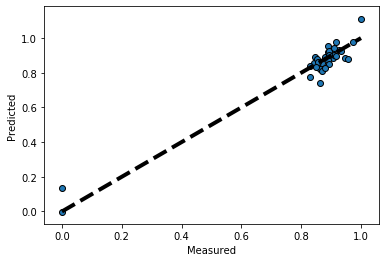

In [788]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

 #### Home audio (Lag Multiplicative)

In [789]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(Home_audio_week7, train_size = 0.7, test_size = 0.3, random_state = 100)

In [790]:
scaler = MinMaxScaler()

In [791]:
num_vars_z =Home_audio_week7.columns

In [792]:
df_train[num_vars_z] = scaler.fit_transform(df_train[num_vars_z])
df_test[num_vars_z] = scaler.fit_transform(df_test[num_vars_z])

In [793]:
y_train = df_train.pop('gmv')
X_train = df_train

In [794]:
# Run RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)  
rfe = rfe.fit(X_train, y_train)

In [795]:
col = X_train.columns[rfe.support_]
col

Index(['discount', 'discount_lag1', 'sla_lag3', 'mass_market_true',
       'mass_market_true_lag2', 'product_vertical_Dock_lag2',
       'product_vertical_FMRadio', 'product_vertical_FMRadio_lag1',
       'product_vertical_HomeAudioSpeaker', 'product_mrp_lag3',
       'Max Temp_lag1', 'Max Temp_lag3', 'Min Temp', 'Min Temp_lag1',
       'Mean Temp', 'Cool Deg Days_lag2', 'Total Rain (mm)_lag3',
       'Total Snow (cm)', 'Total Snow (cm)_lag3', 'Total Precip (mm)'],
      dtype='object')

In [796]:
X_train.columns[~rfe.support_]

Index(['gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'discount_lag2', 'discount_lag3',
       'holiday_flag', 'holiday_flag_lag1', 'holiday_flag_lag2',
       'holiday_flag_lag3', 'sla',
       ...
       'Total Rain (mm)_lag2', 'Total Snow (cm)_lag1', 'Total Snow (cm)_lag2',
       'Total Precip (mm)_lag1', 'Total Precip (mm)_lag2',
       'Total Precip (mm)_lag3', 'Snow on Grnd (cm)', 'Snow on Grnd (cm)_lag1',
       'Snow on Grnd (cm)_lag2', 'Snow on Grnd (cm)_lag3'],
      dtype='object', length=259)

In [797]:
X_train_rfe = X_train[col]

In [798]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1854.
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.64e-19
Time:                        21:10:05   Log-Likelihood:                 148.70
No. Observations:                  34   AIC:                            -255.4
Df Residuals:                      13   BIC:                            -223.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [799]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,mass_market_true,504.81
9,product_vertical_HomeAudioSpeaker,295.89
0,const,282.72
7,product_vertical_FMRadio,73.59
1,discount,36.76
10,product_mrp_lag3,23.50
3,sla_lag3,23.16
15,Mean Temp,21.05
13,Min Temp,18.29
11,Max Temp_lag1,12.34


In [800]:
X_train_rfe =X_train_rfe.drop(["mass_market_true"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_HomeAudioSpeaker"], axis = 1)

In [801]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     56.81
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.31e-10
Time:                        21:10:06   Log-Likelihood:                 85.465
No. Observations:                  34   AIC:                            -132.9
Df Residuals:                      15   BIC:                            -103.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [802]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,267.33
1,discount,21.42
8,product_mrp_lag3,21.37
3,sla_lag3,20.18
11,Min Temp,17.20
6,product_vertical_FMRadio,16.95
13,Mean Temp,16.78
9,Max Temp_lag1,11.59
12,Min Temp_lag1,10.24
5,product_vertical_Dock_lag2,9.03


In [803]:
X_train_rfe =X_train_rfe.drop(["discount_lag1"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Min Temp_lag1"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Cool Deg Days_lag2"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Total Snow (cm)"], axis = 1)

In [804]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     91.05
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.26e-14
Time:                        21:10:06   Log-Likelihood:                 85.196
No. Observations:                  34   AIC:                            -140.4
Df Residuals:                      19   BIC:                            -117.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [805]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,149.23
7,product_mrp_lag3,15.16
2,sla_lag3,13.37
1,discount,9.62
11,Mean Temp,9.36
10,Min Temp,7.91
8,Max Temp_lag1,7.83
5,product_vertical_FMRadio,7.78
4,product_vertical_Dock_lag2,4.71
9,Max Temp_lag3,4.16


In [806]:
X_train_rfe =X_train_rfe.drop(["Max Temp_lag1"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Total Rain (mm)_lag3"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Min Temp"], axis = 1)

In [807]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     131.6
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.98e-17
Time:                        21:10:06   Log-Likelihood:                 84.869
No. Observations:                  34   AIC:                            -145.7
Df Residuals:                      22   BIC:                            -127.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [808]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,102.68
7,product_mrp_lag3,13.57
2,sla_lag3,12.44
1,discount,5.40
5,product_vertical_FMRadio,5.21
4,product_vertical_Dock_lag2,3.74
3,mass_market_true_lag2,3.22
9,Mean Temp,3.15
8,Max Temp_lag3,3.08
6,product_vertical_FMRadio_lag1,2.38


In [809]:
X_train_rfe =X_train_rfe.drop(["Max Temp_lag3"], axis = 1)

In [810]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     150.2
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.69e-18
Time:                        21:10:06   Log-Likelihood:                 84.744
No. Observations:                  34   AIC:                            -147.5
Df Residuals:                      23   BIC:                            -130.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [811]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,95.72
7,product_mrp_lag3,12.63
2,sla_lag3,12.37
1,discount,5.26
5,product_vertical_FMRadio,5.11
4,product_vertical_Dock_lag2,3.74
3,mass_market_true_lag2,3.22
6,product_vertical_FMRadio_lag1,2.38
8,Mean Temp,1.93
9,Total Snow (cm)_lag3,1.58


In [812]:
X_train_rfe =X_train_rfe.drop(["product_mrp_lag3"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Mean Temp"], axis = 1)
X_train_rfe =X_train_rfe.drop(["Total Precip (mm)"], axis = 1)

In [813]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     203.8
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           4.67e-21
Time:                        21:10:06   Log-Likelihood:                 81.829
No. Observations:                  34   AIC:                            -147.7
Df Residuals:                      26   BIC:                            -135.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [814]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.18
5,product_vertical_FMRadio,3.59
1,discount,3.52
4,product_vertical_Dock_lag2,3.04
3,mass_market_true_lag2,2.88
6,product_vertical_FMRadio_lag1,2.30
2,sla_lag3,1.89
7,Total Snow (cm)_lag3,1.41


In [815]:
X_train_rfe =X_train_rfe.drop(["Total Snow (cm)_lag3"], axis = 1)
X_train_rfe =X_train_rfe.drop(["product_vertical_FMRadio_lag1"], axis = 1)

In [816]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     277.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           6.25e-23
Time:                        21:10:06   Log-Likelihood:                 80.106
No. Observations:                  34   AIC:                            -148.2
Df Residuals:                      28   BIC:                            -139.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [817]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,65.18
5,product_vertical_FMRadio,3.12
1,discount,3.07
3,mass_market_true_lag2,2.50
2,sla_lag3,1.88
4,product_vertical_Dock_lag2,1.85


In [818]:
X_train_rfe =X_train_rfe.drop(["mass_market_true_lag2"], axis = 1)

In [819]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     333.9
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           8.51e-24
Time:                        21:10:06   Log-Likelihood:                 78.911
No. Observations:                  34   AIC:                            -147.8
Df Residuals:                      29   BIC:                            -140.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [820]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.79
4,product_vertical_FMRadio,3.08
1,discount,3.00
2,sla_lag3,1.45
3,product_vertical_Dock_lag2,1.31


In [821]:
X_train_rfe =X_train_rfe.drop(["sla_lag3"], axis = 1)

In [822]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     433.5
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           8.76e-25
Time:                        21:10:06   Log-Likelihood:                 77.908
No. Observations:                  34   AIC:                            -147.8
Df Residuals:                      30   BIC:                            -141.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [823]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,39.16
1,discount,2.69
3,product_vertical_FMRadio,2.69
2,product_vertical_Dock_lag2,1.00


In [824]:
X_train_rfe.columns

Index(['discount', 'product_vertical_Dock_lag2', 'product_vertical_FMRadio'], dtype='object')

In [825]:
drop_columns_list = list(set(num_vars_y) - set(list(X_train_rfe.columns)))
print(drop_columns_list)

['Min Temp_lag1', 'gmv_lag2', 'Affiliates_lag2', 'Radio_lag2', 'product_vertical_JoystickGamingWheel_lag1', 'Affiliates_ADS_lag1', 'Mean Temp_lag1', 'Total Rain (mm)_lag2', 'Content Marketing_SMA_5_lag2', 'Content Marketing_lag3', 'Sponsorship_SMA_3', 'Digital_SMA_5_lag2', 'NPS_SMA_5_lag2', 'Total Investment_SMA_3_lag2', 'Digital_SMA_3_lag3', 'Stock Index_SMA_3_lag3', 'Digital_SMA_3_lag1', 'Total Investment_lag2', 'Content Marketing_lag1', 'product_vertical_JoystickGamingWheel', 'Content Marketing_SMA_3', 'Affiliates_SMA_5_lag3', 'product_vertical_GamingMouse', 'Total Precip (mm)_lag3', 'Stock Index_SMA_3_lag1', 'Content_Marketing_ADS_lag2', 'Min Temp', 'Sponsorship_SMA_3_lag2', 'NPS_SMA_5_lag3', 'Online marketing_SMA_3_lag1', 'Sponsorship_lag3', 'Online marketing_SMA_5_lag2', 'holiday_flag', 'Sponsorship_SMA_5_lag2', 'Digital_ADS_lag2', 'payd_week_lag3', 'Digital_lag3', 'Radio_SMA_5_lag1', 'Digital_lag2', 'Digital_ADS', 'TV_ADS_lag2', 'Online marketing', 'NPS_SMA_5_lag1', 'SEM_ADS_lag

In [826]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_rfe, y_train, scoring='r2', cv=folds)
scores

array([-0.10705071,  0.66215996, -0.42829253,  0.83209507,  0.00328897,
        0.87205884,  0.81512296,  0.03492203, -0.39153711,  0.54914192])

In [827]:
y_pred = cross_val_predict(lm, X_train_rfe, y_train, cv=folds)

In [828]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print(mse) 
print(r_squared)

0.003938246922828761
0.8516938481768517


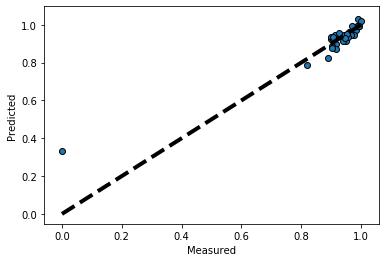

In [829]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()